In [1]:
import tensorflow as tf

Segments shape:  (52, 28, 28, 1)


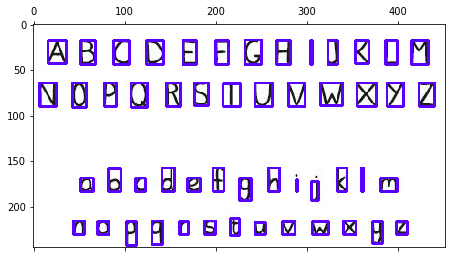

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.transform import resize
from tensorflow.keras.optimizers import SGD

np.random.seed(42)

import warnings
warnings.filterwarnings("ignore")

#read image
img = cv2.imread('handwritten_alphabet2.jpg')

#grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#binarize 
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

#find contours
ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, 
cv2.CHAIN_APPROX_SIMPLE)

#sort contours
def sort_contours(contour, cols):
    tolerance_factor = 10
    origin = cv2.boundingRect(contour)
    return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]

sorted_ctrs = sorted(ctrs, key=lambda x:sort_contours(x, img.shape[1]))

segments = []
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    
    area = cv2.contourArea(ctr)
    if h>10 and w>1:
        # Getting ROI
        roi = img[y:y+h, x:x+w]

        # show ROI
        roi = resize(roi, (28, 28, 1))
        #roi = np.reshape(roi, (28,28))
        segments.append(roi)
        #cv2.imshow('charachter'+str(i), roi)
        cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
        #print(roi.shape)

train = np.array(segments)
print('Segments shape: ', train.shape)

plt.matshow(img)

In [3]:
train_letter_map = dict(zip(['A','a','B','b','C','c','D','d','E','e','F','f','G','g','H','h','I','i','J', 'j','K','k','L', 'l', 'M', 'm','N', 'n','O', 'o','P', 'p', 'Q', 'q', 'R', 'r', 'S', 's', 'T', 't', 'U', 'u', 'V', 'v', 'W', 'w', 'X', 'x', 'Y', 'y', 'Z', 'z'], range(0,52)))

In [4]:
unique_target = list('ABCDEFGHIJKLMNOPQRSTUVWXYZbdfhkiacegmljnopqrstuvwxyz')

train_target = []
for i in unique_target:
    train_target.append(train_letter_map[i])
    
train_target = np.array(train_target)

print('Target shape:', train_target.shape)

Target shape: (52,)


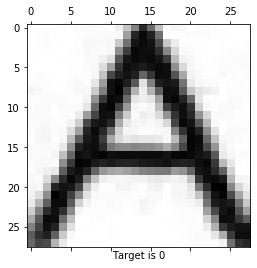

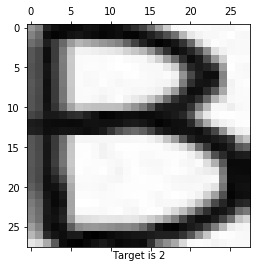

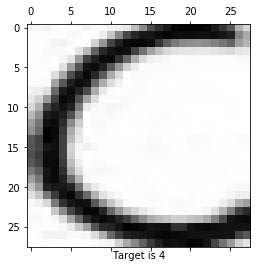

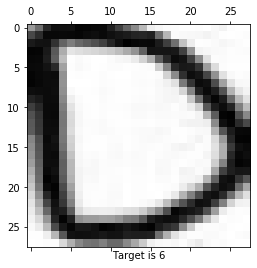

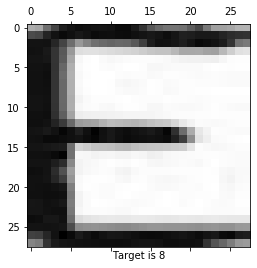

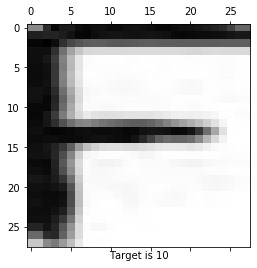

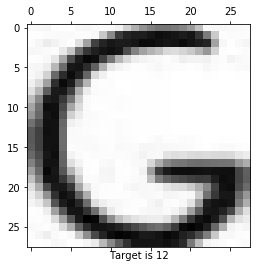

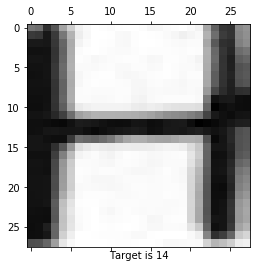

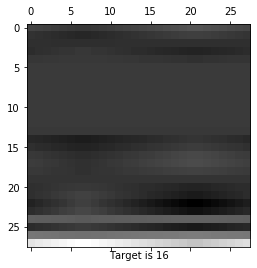

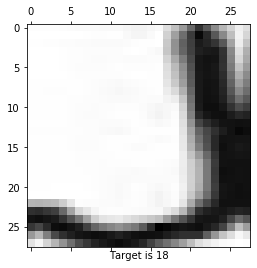

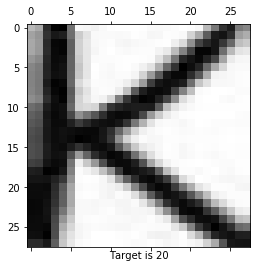

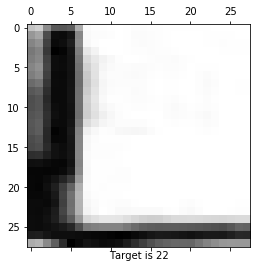

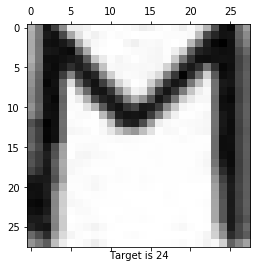

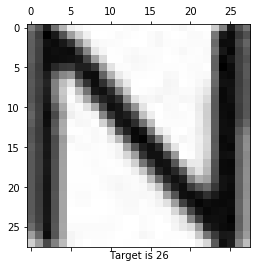

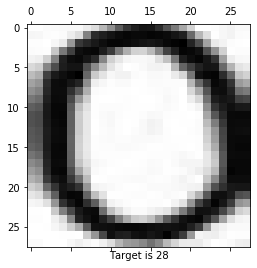

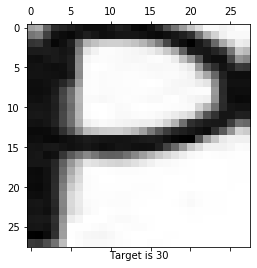

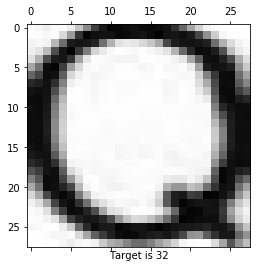

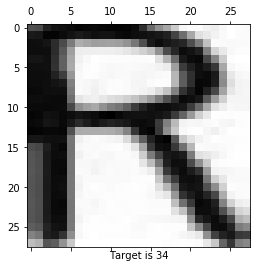

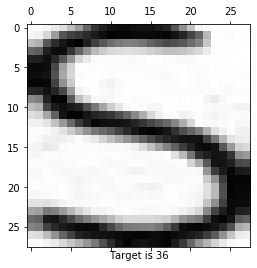

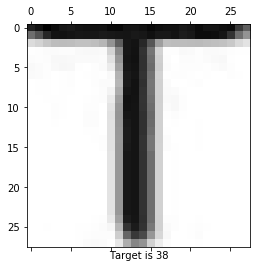

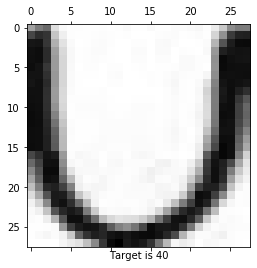

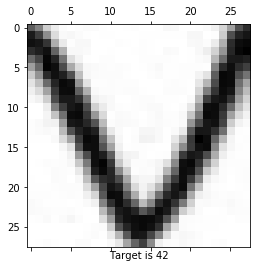

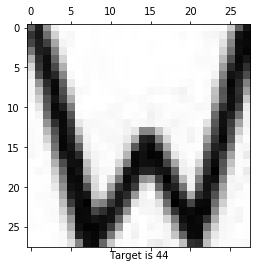

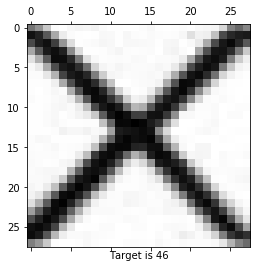

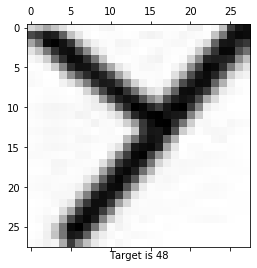

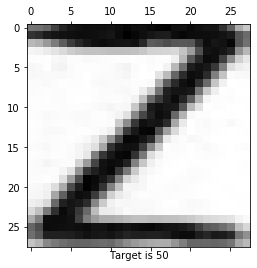

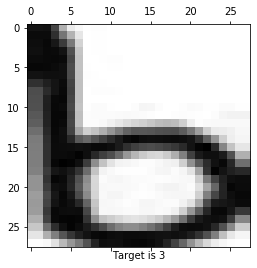

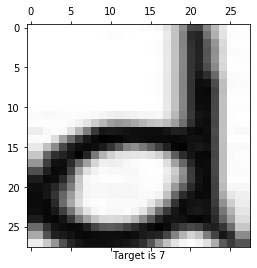

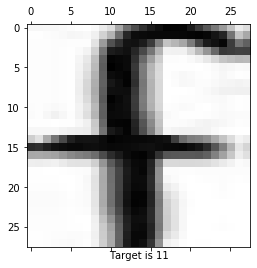

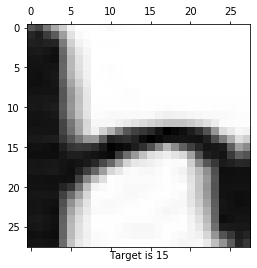

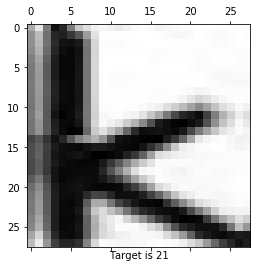

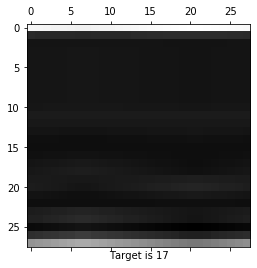

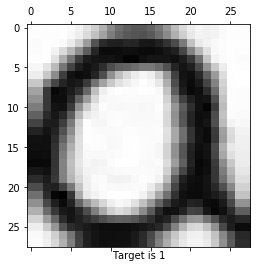

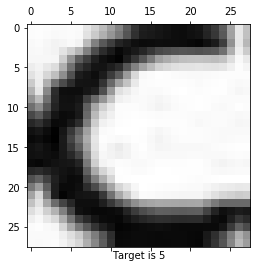

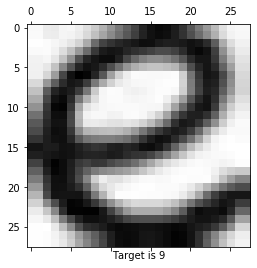

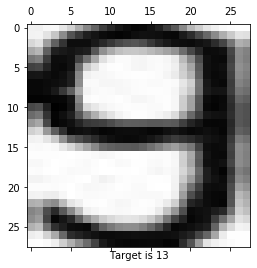

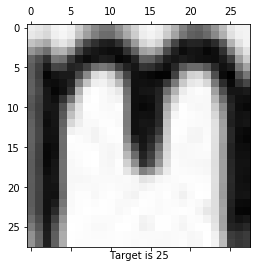

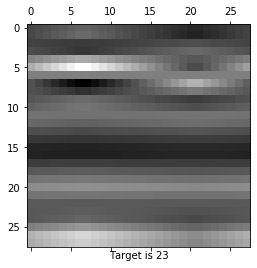

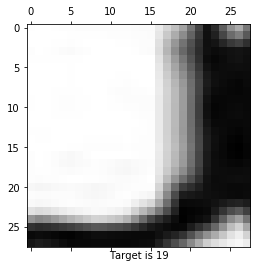

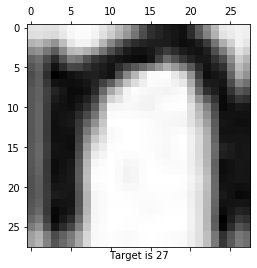

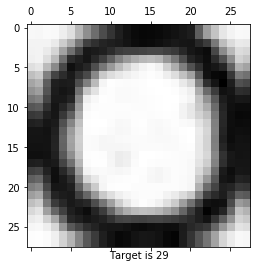

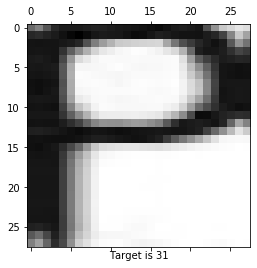

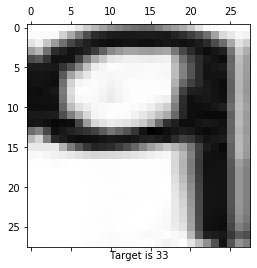

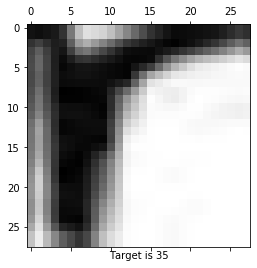

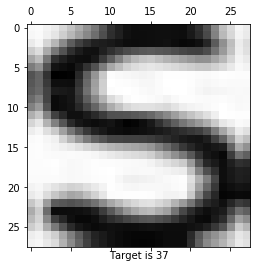

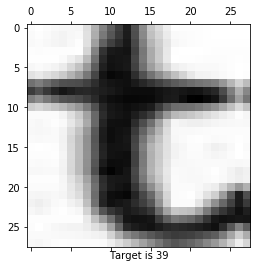

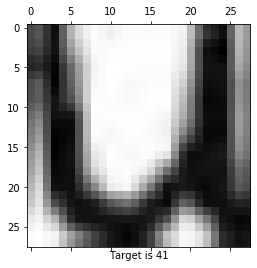

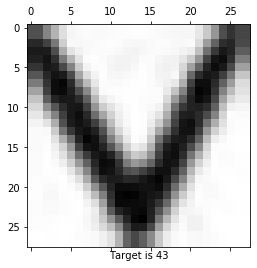

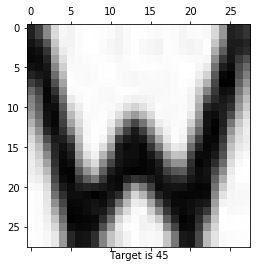

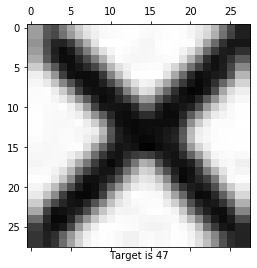

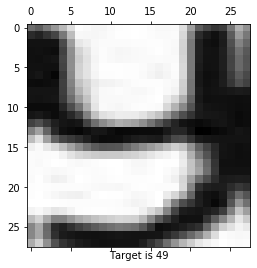

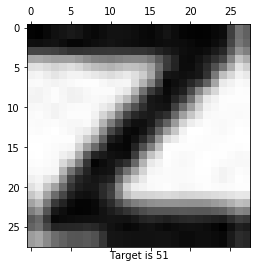

In [5]:
for i in range(0, train.reshape(52,28,28).shape[0]):
    plt.matshow(train.reshape(52,28,28)[i], cmap = 'gray')
    plt.xlabel('Target is ' + str(train_target[i]))

Segments shape:  (508, 28, 28)


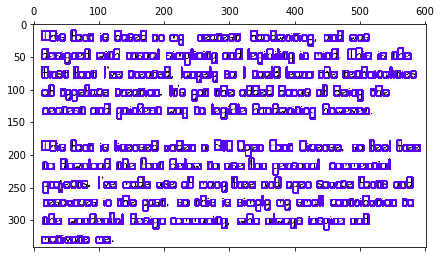

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import History
from tensorflow.keras.callbacks import LearningRateScheduler
from skimage.transform import resize

#read image
img = cv2.imread('handwritten_extract2.jpg')

#grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#binarize 
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

#find contours
ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, 
cv2.CHAIN_APPROX_SIMPLE)

#sort contours
def sort_contours(contour, cols):
    tolerance_factor = 10
    origin = cv2.boundingRect(contour)
    return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]

sorted_ctrs = sorted(ctrs, key=lambda x:sort_contours(x, img.shape[1]))

segments = []
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    
    area = cv2.contourArea(ctr)
    if h>5:
        # Getting ROI
        roi = img[y:y+h, x:x+w]

        # show ROI
        roi = resize(roi, (28, 28, 1))
        roi = np.reshape(roi, (28,28))
        segments.append(roi)
        #cv2.imshow('charachter'+str(i), roi)
        cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
        #print(roi.shape)

test = np.array(segments)
print('Segments shape: ', test.shape)

plt.matshow(img)

In [7]:
test_letter_map = dict(zip(['A','a','B','b','C','c','D','d','E','e','F','f','G','g','H','h','I','i','J', 'j','K','k','L', 'l', 'M', 'm','N', 'n','O', 'o','P', 'p', 'Q', 'q', 'R', 'r', 'S', 's', 'T', 't', 'U', 'u', 'V', 'v', 'W', 'w', 'X', 'x', 'Y', 'y', 'Z', 'z'], range(0,52)))

In [8]:
unique_target = list('ThisfontisbasedonmyneatesthandwritingandwasddhiidibidThhesIgnewItcasuasImpIcItyanegIIityInmInisIsteffIdiiiidIhhIIrstontvecreateargeysocouearntetecnIcaitiesffIhdddbfbhotypeacecreatIontsgotteaeonusoeingtetstdcksttibihdthneaeanguiewayoegIeanwriingoweMerThfIddsILoFLfifisontislcenseunerapenontIcensesoeereedidhfbIfiitoownoateonteowtouseorpersonacommercTaidffdfdprouectsvemaeuseomanyreeanoPensourceontsanscsthststhsssiSIIctbttreoureinePaoIIimPymymaonrIuIonotheWonderfuIdesIgncomuunltyWhoaiwaysInsPireandmotivateme')

test_target = []
for i in unique_target:
    test_target.append(test_letter_map[i])
    
test_target = np.array(test_target)

In [9]:
test_target.shape

(508,)

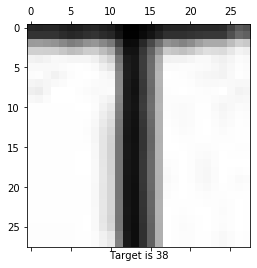

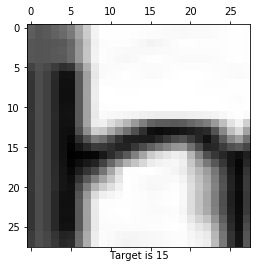

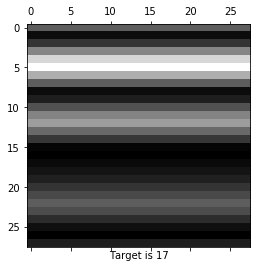

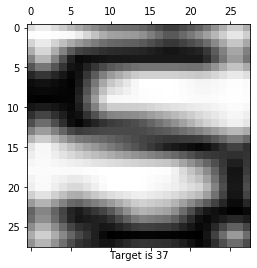

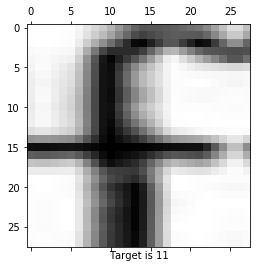

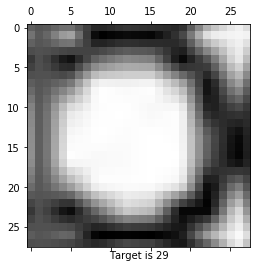

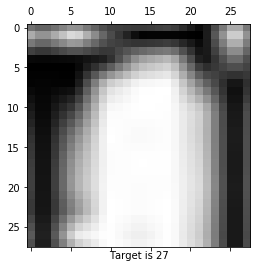

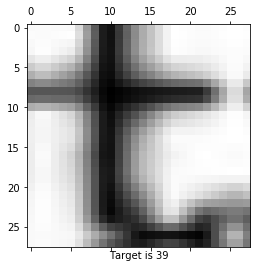

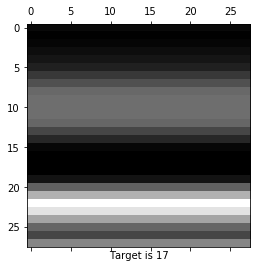

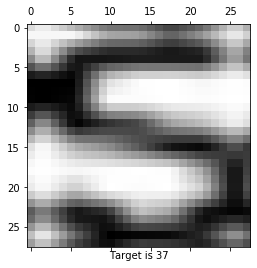

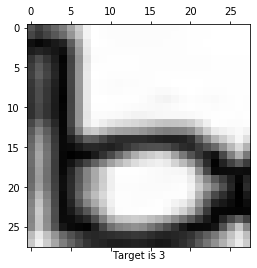

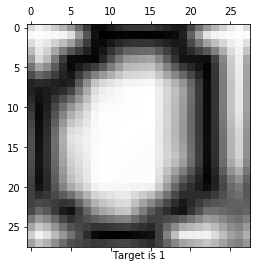

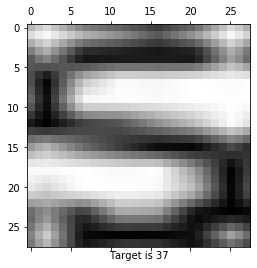

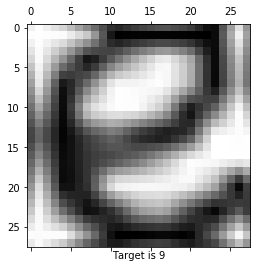

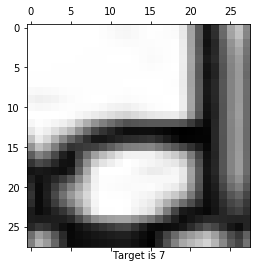

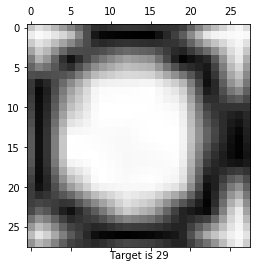

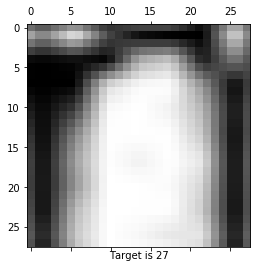

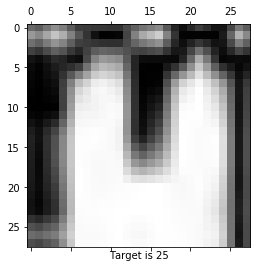

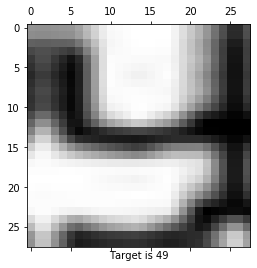

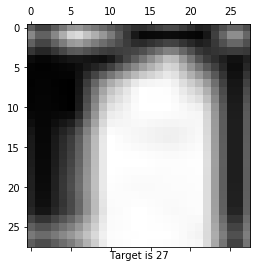

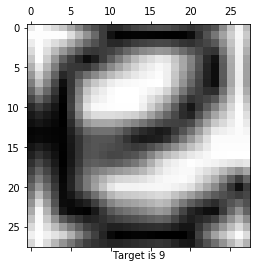

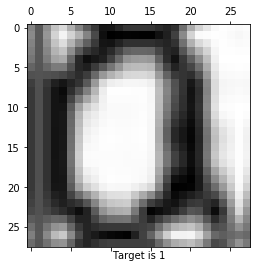

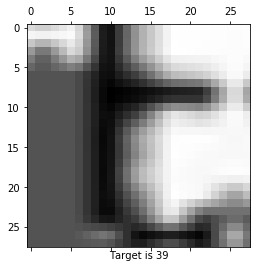

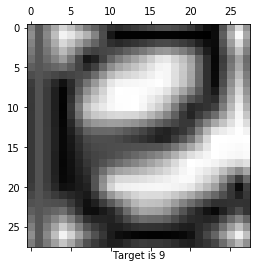

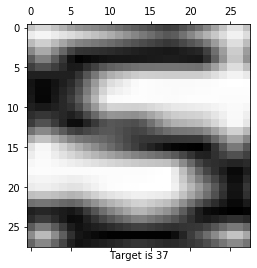

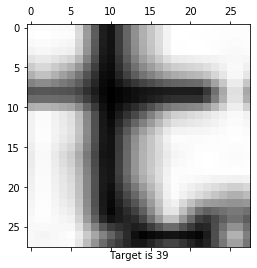

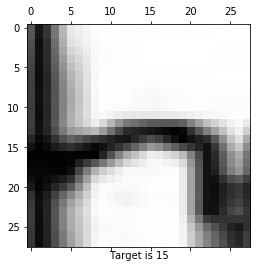

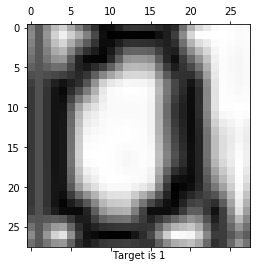

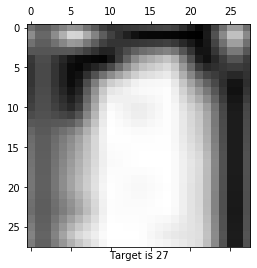

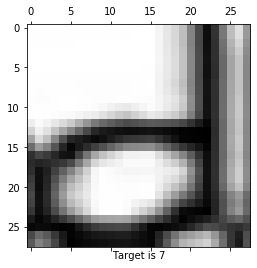

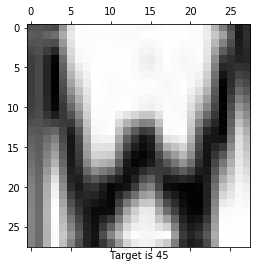

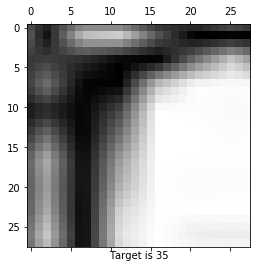

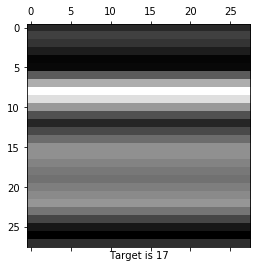

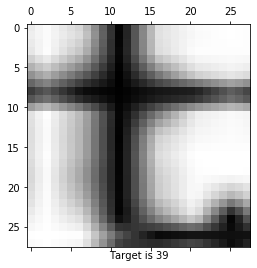

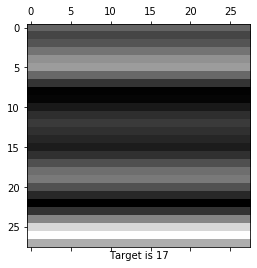

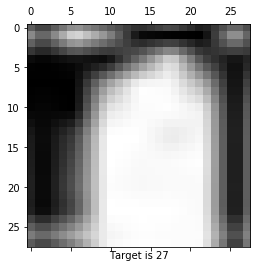

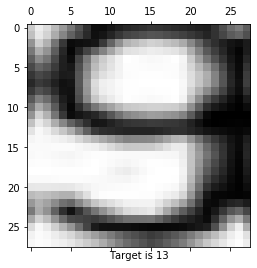

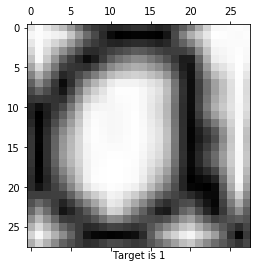

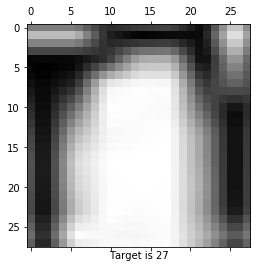

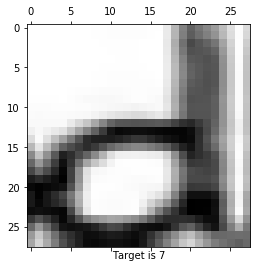

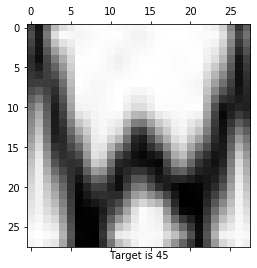

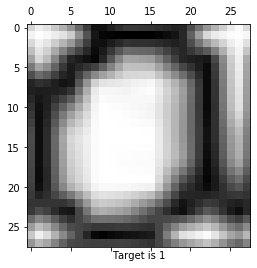

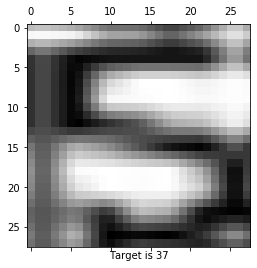

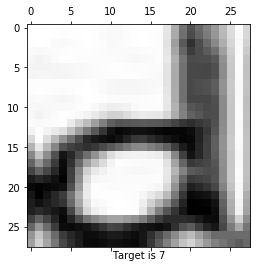

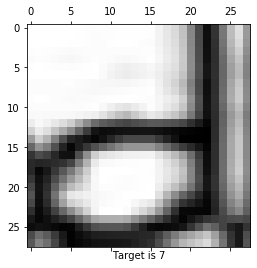

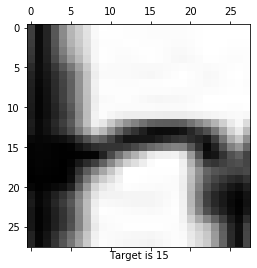

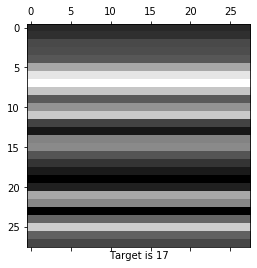

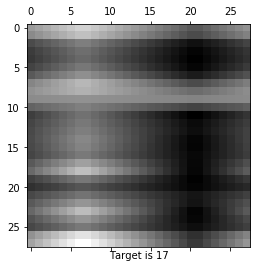

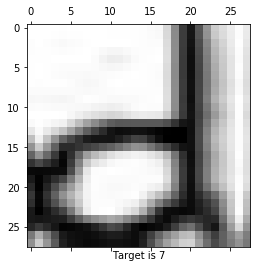

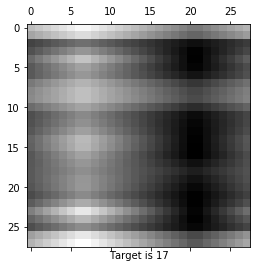

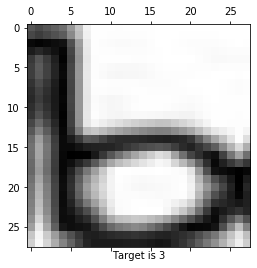

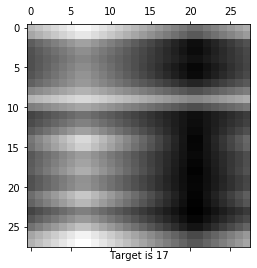

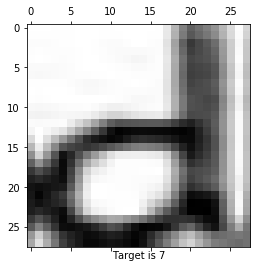

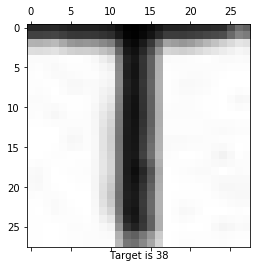

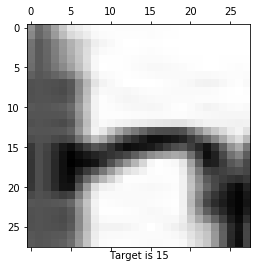

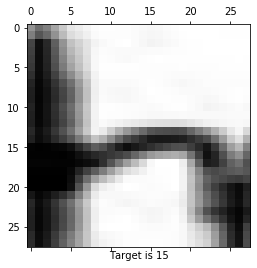

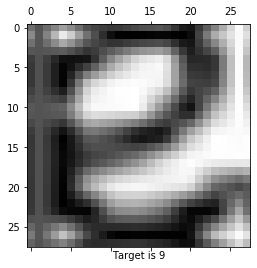

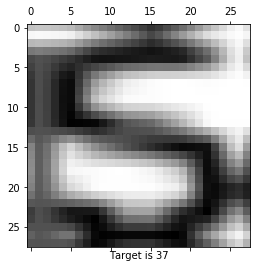

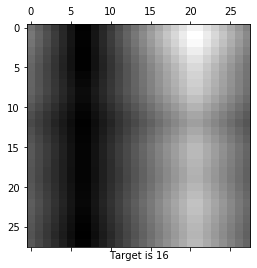

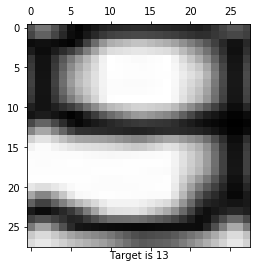

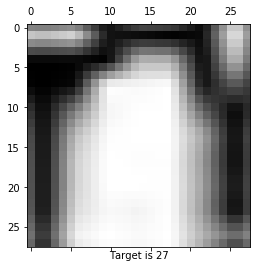

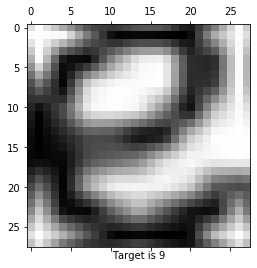

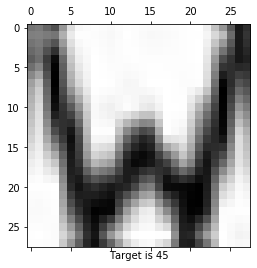

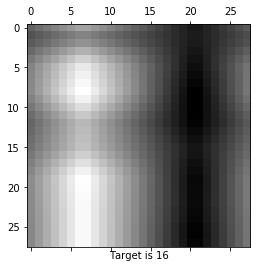

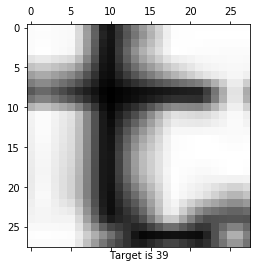

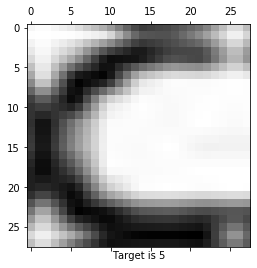

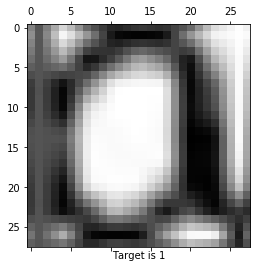

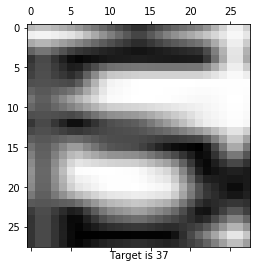

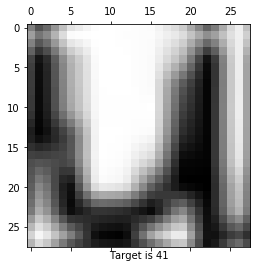

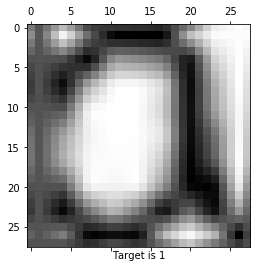

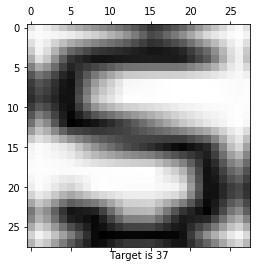

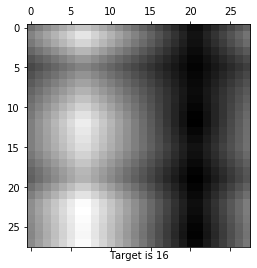

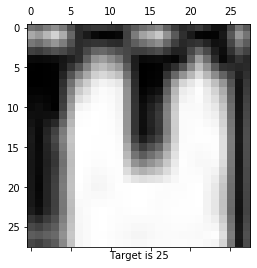

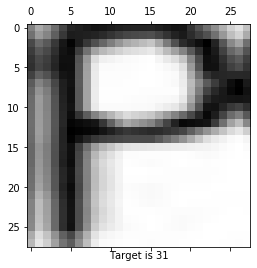

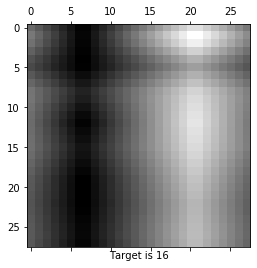

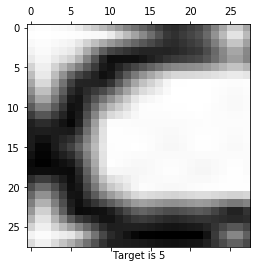

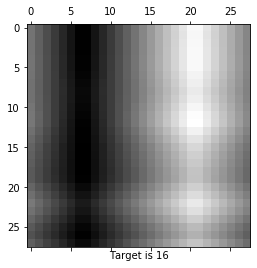

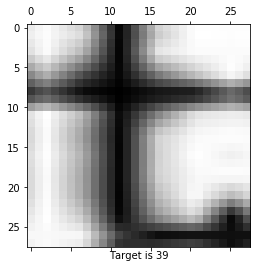

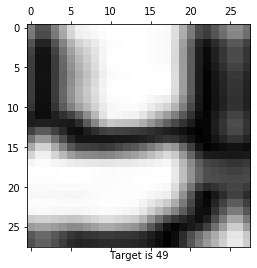

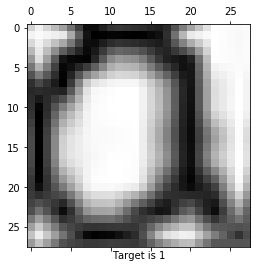

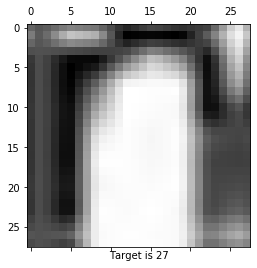

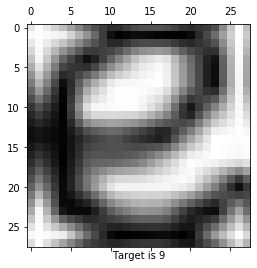

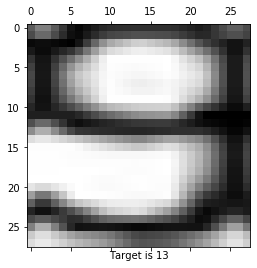

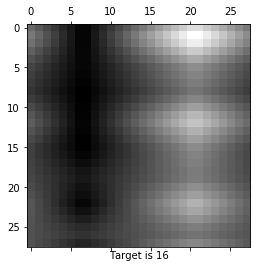

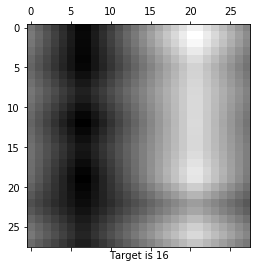

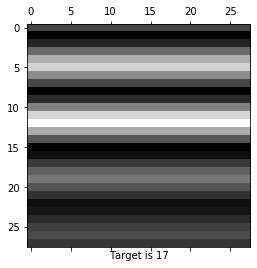

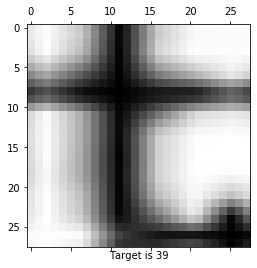

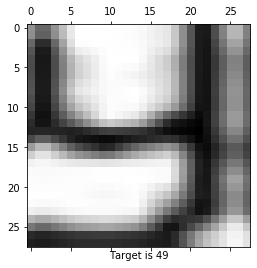

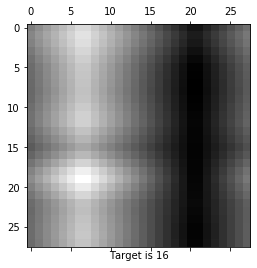

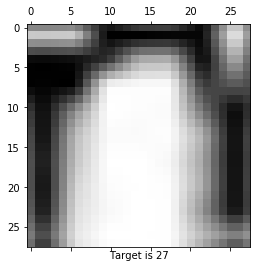

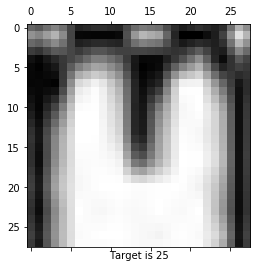

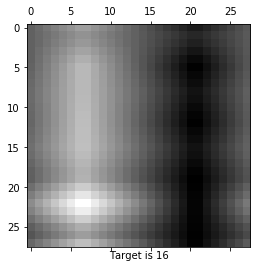

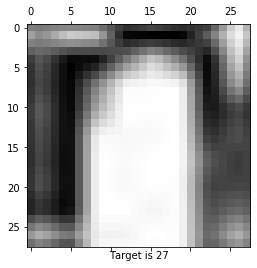

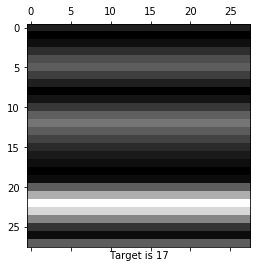

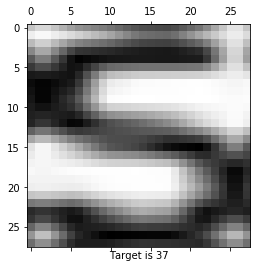

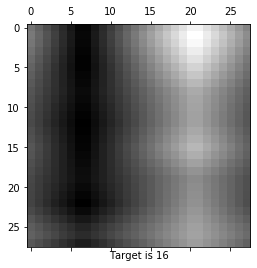

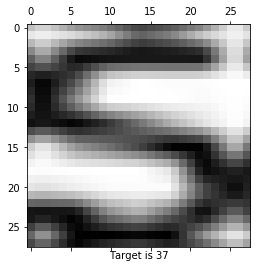

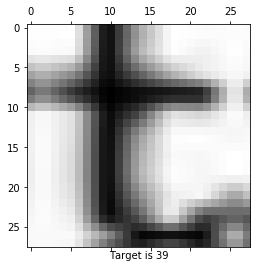

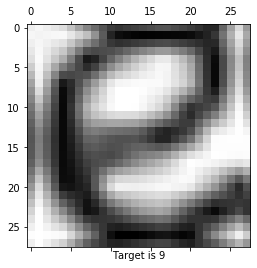

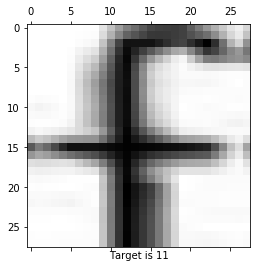

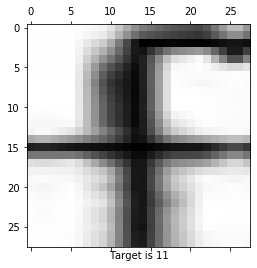

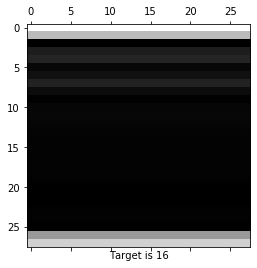

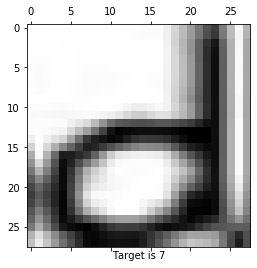

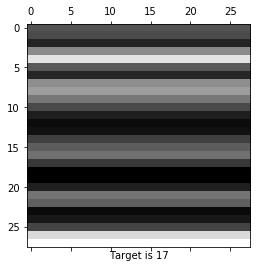

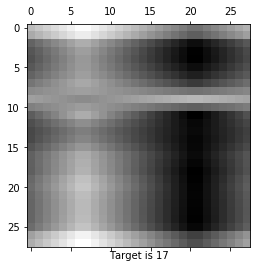

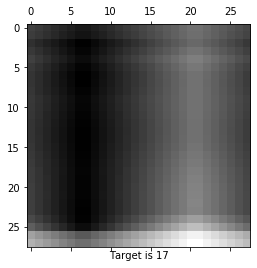

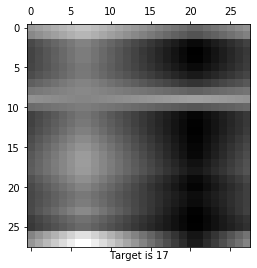

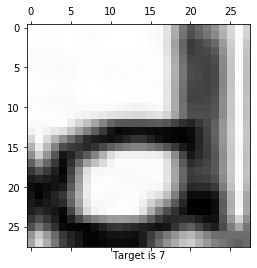

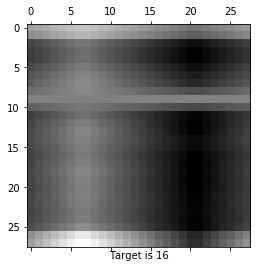

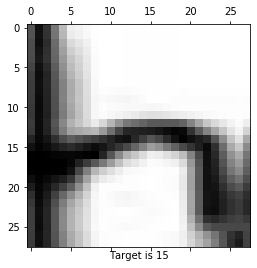

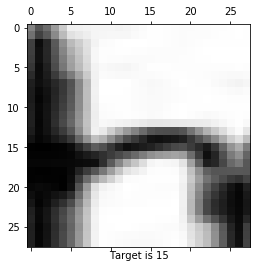

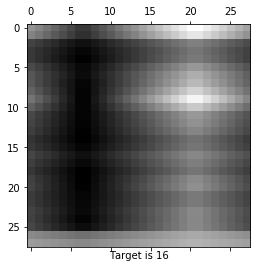

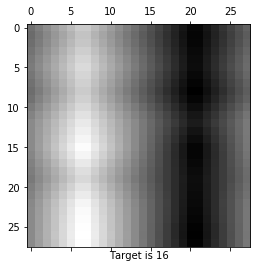

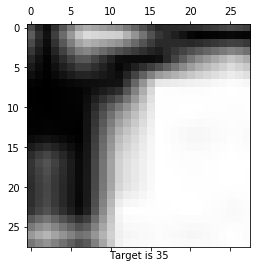

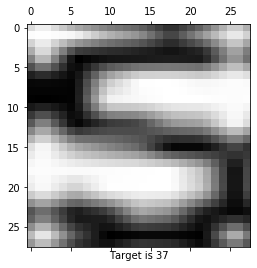

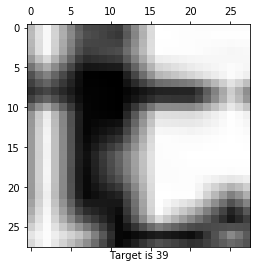

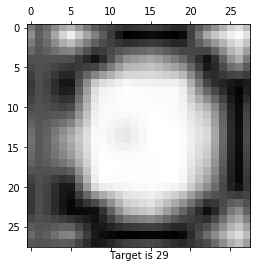

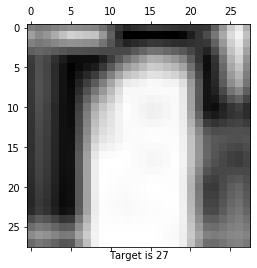

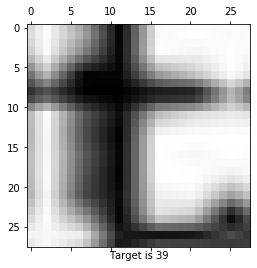

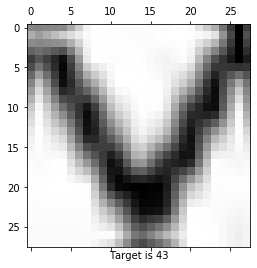

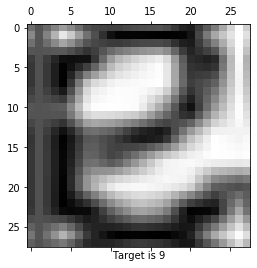

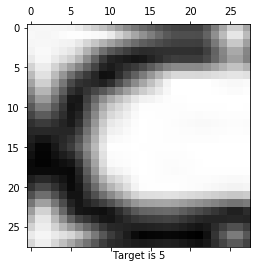

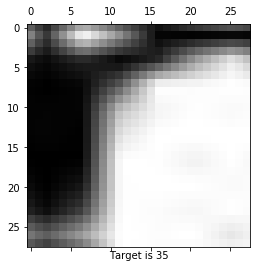

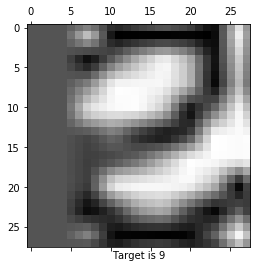

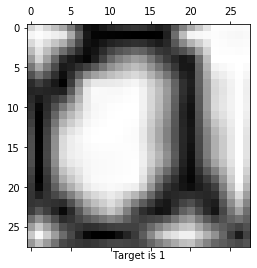

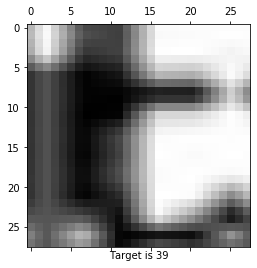

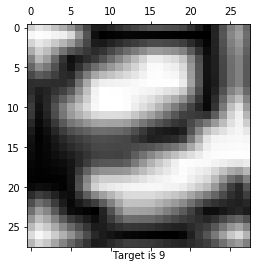

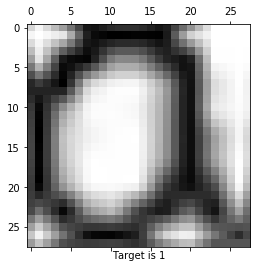

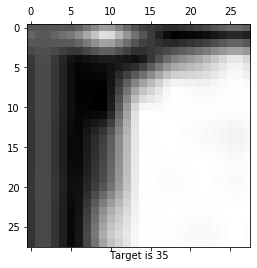

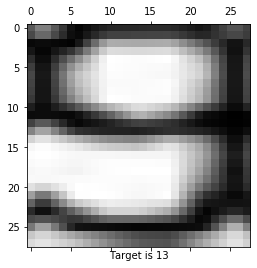

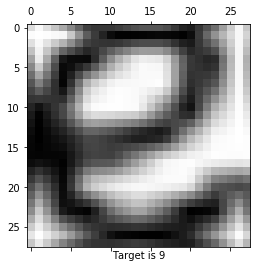

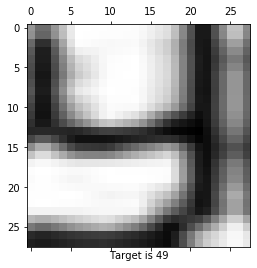

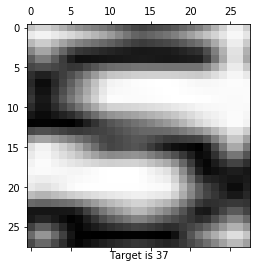

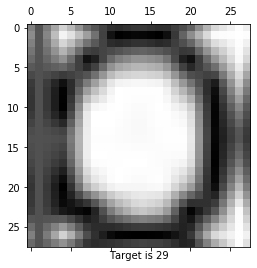

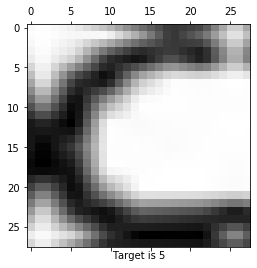

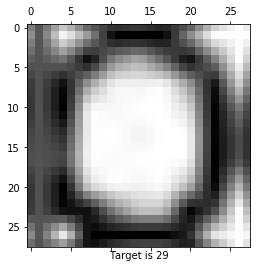

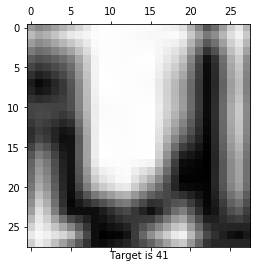

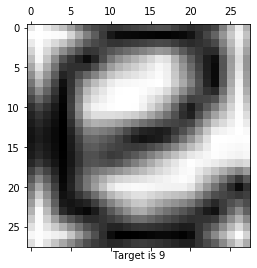

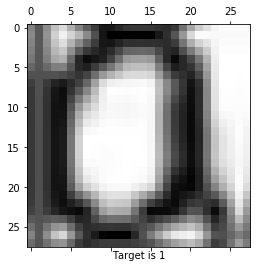

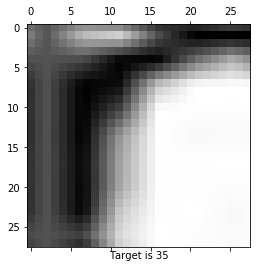

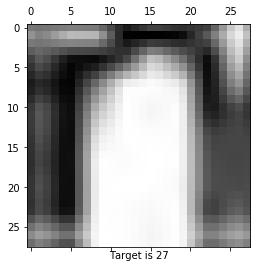

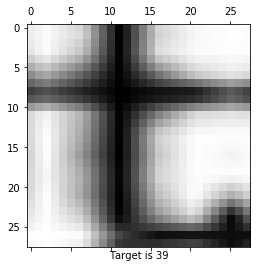

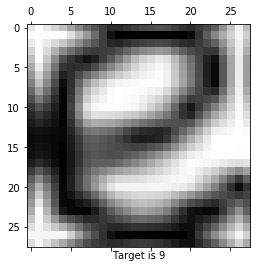

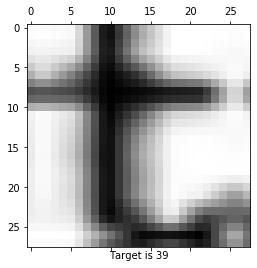

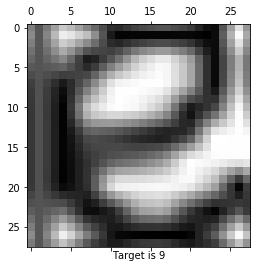

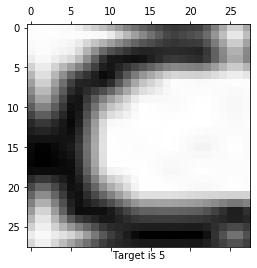

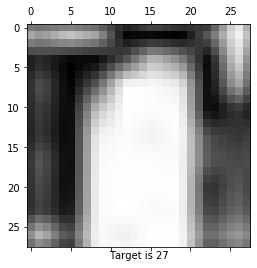

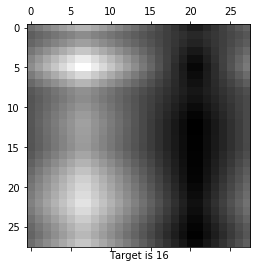

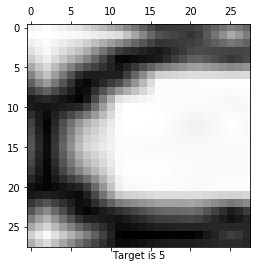

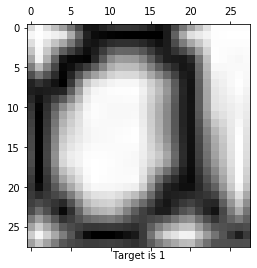

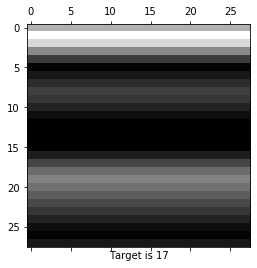

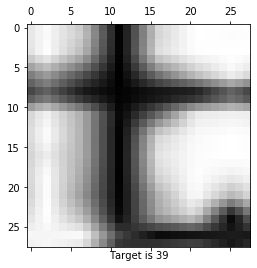

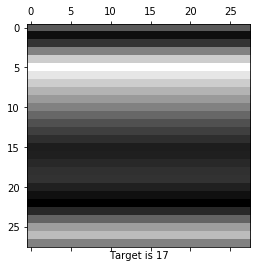

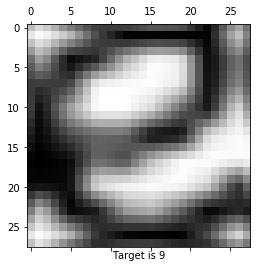

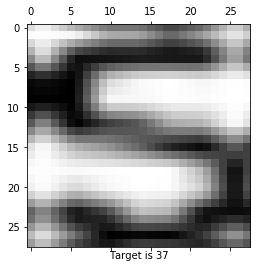

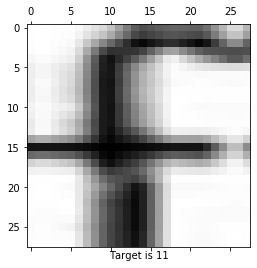

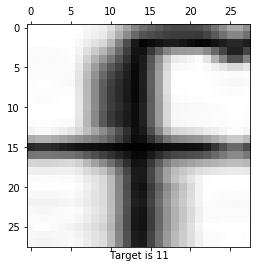

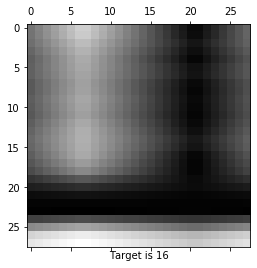

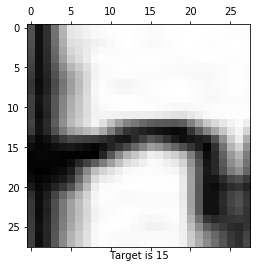

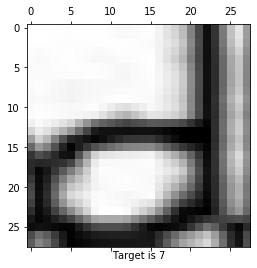

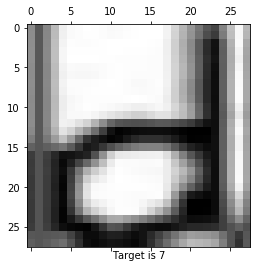

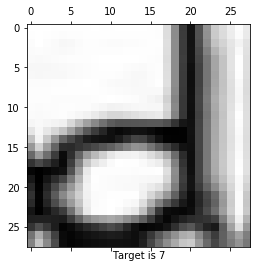

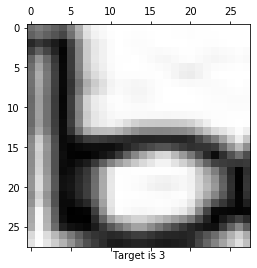

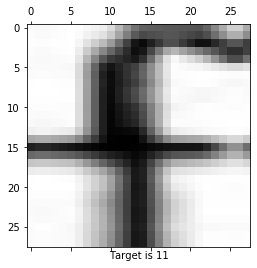

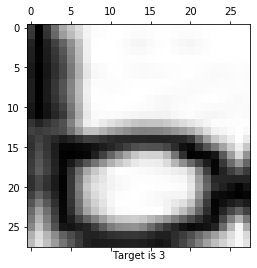

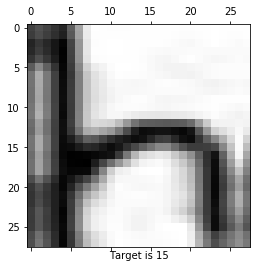

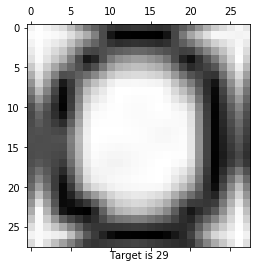

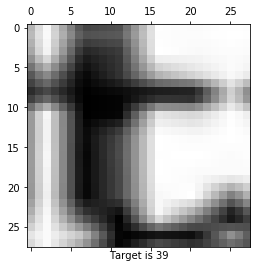

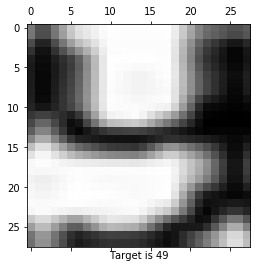

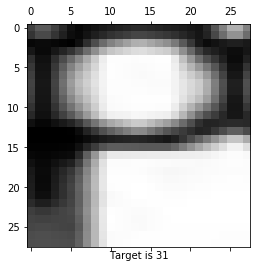

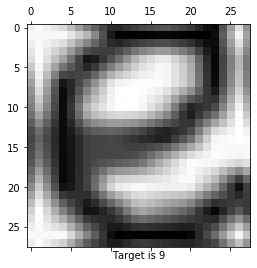

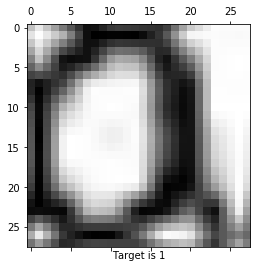

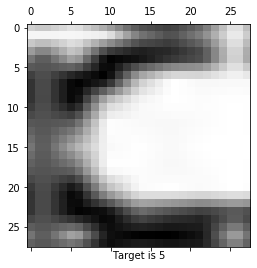

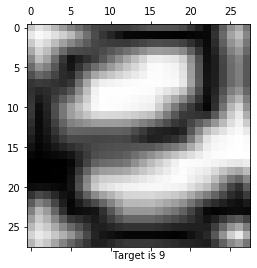

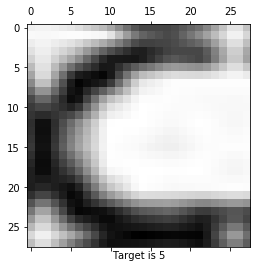

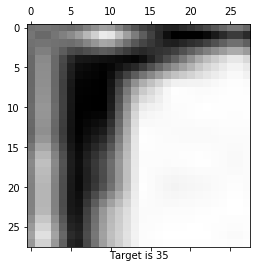

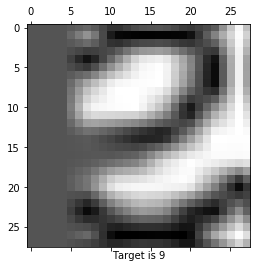

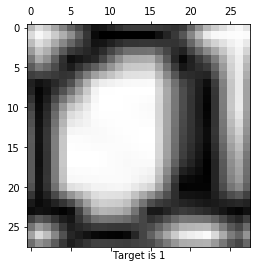

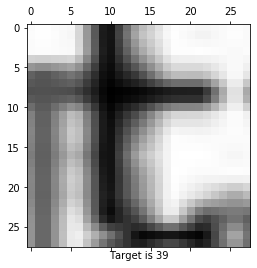

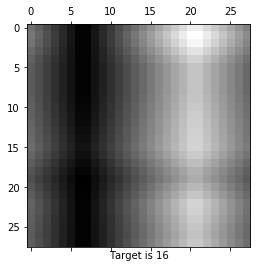

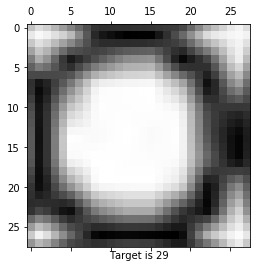

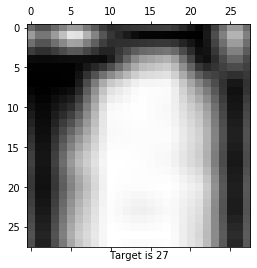

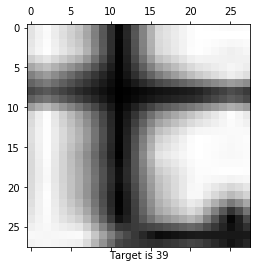

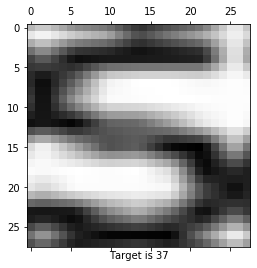

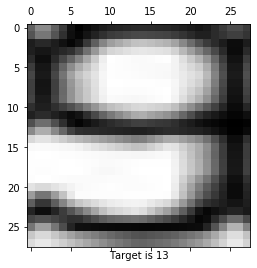

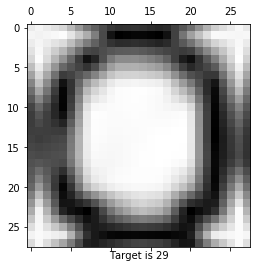

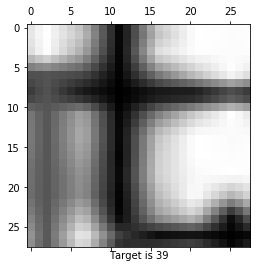

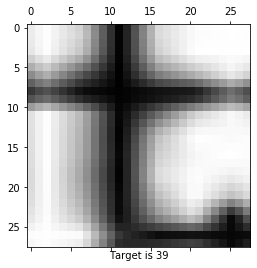

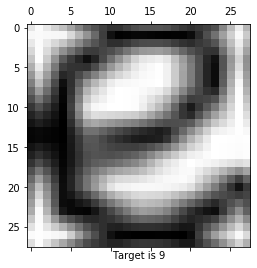

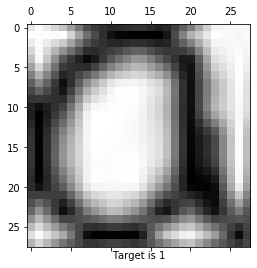

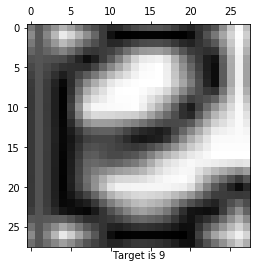

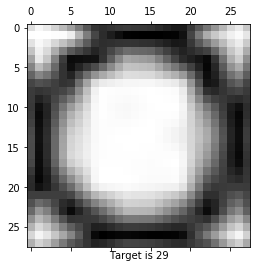

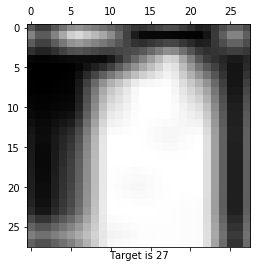

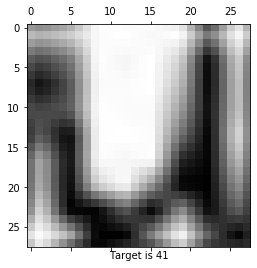

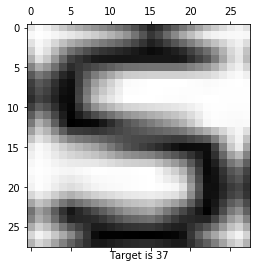

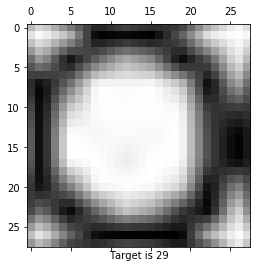

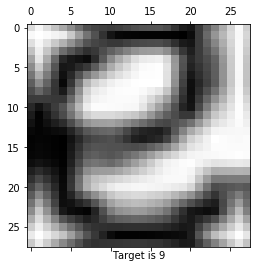

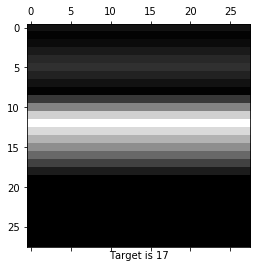

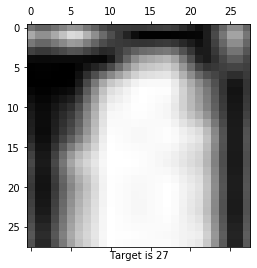

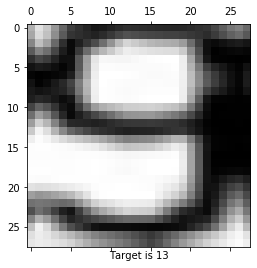

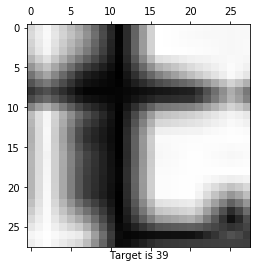

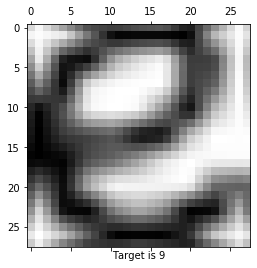

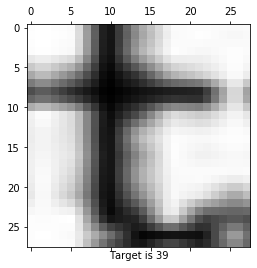

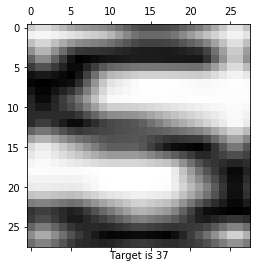

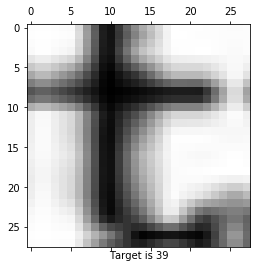

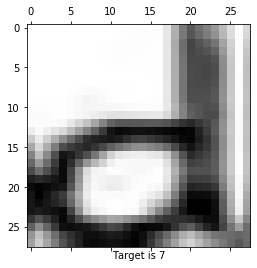

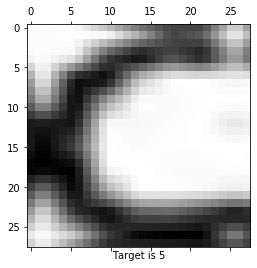

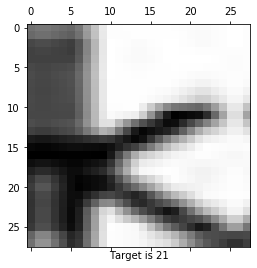

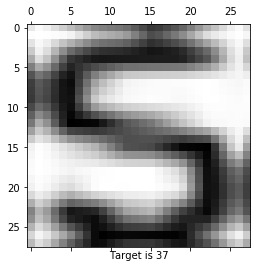

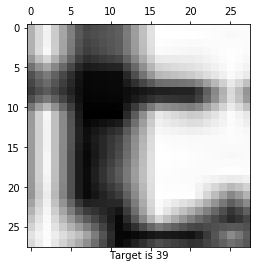

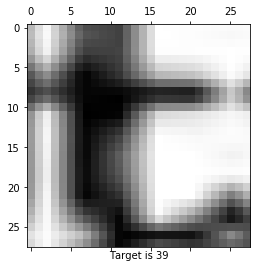

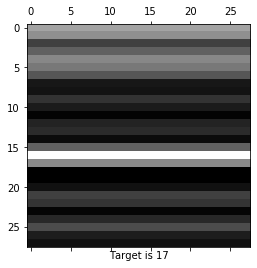

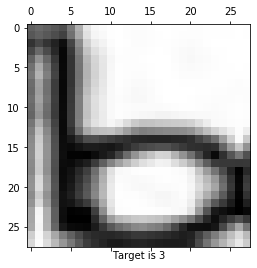

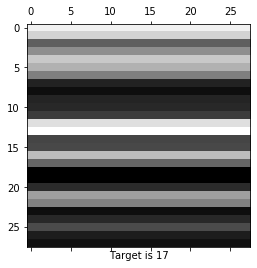

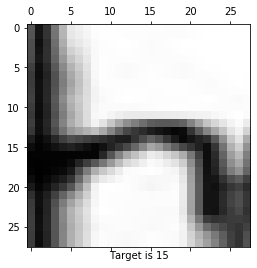

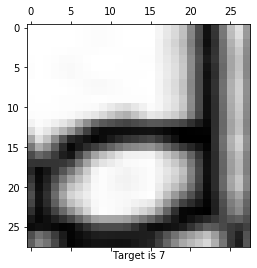

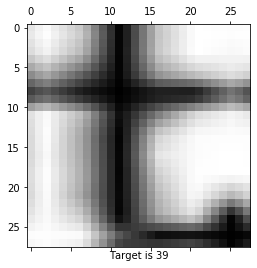

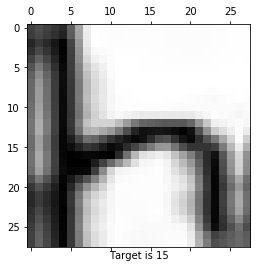

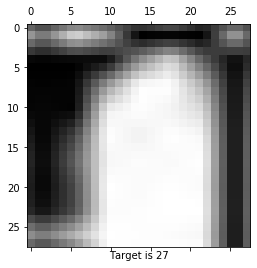

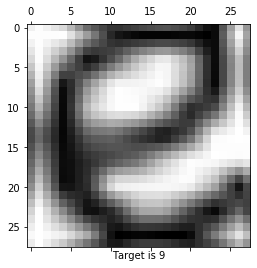

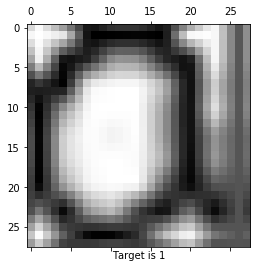

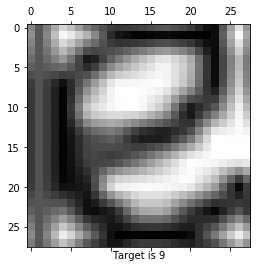

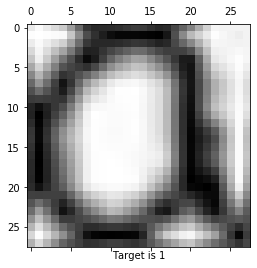

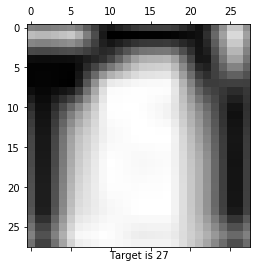

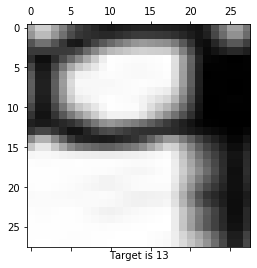

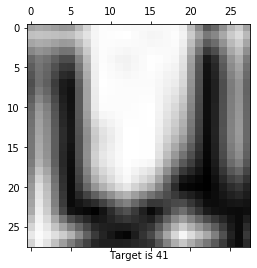

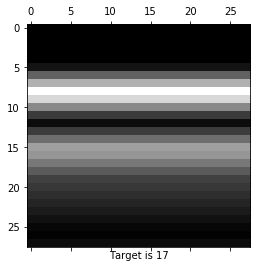

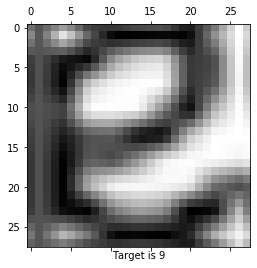

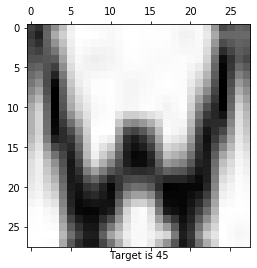

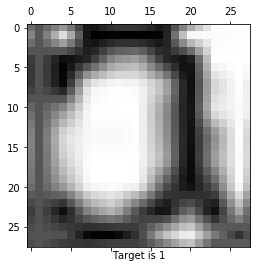

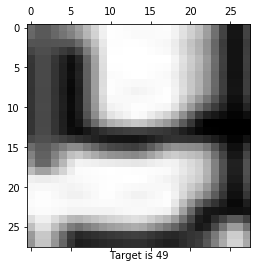

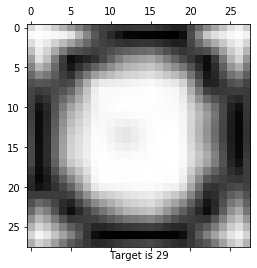

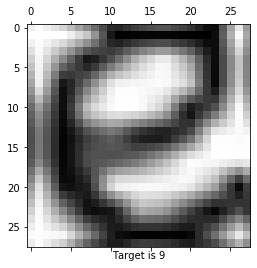

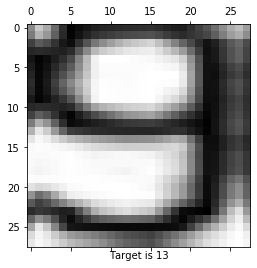

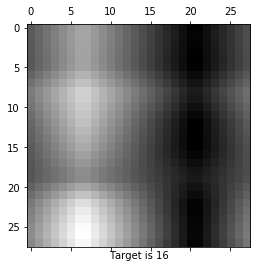

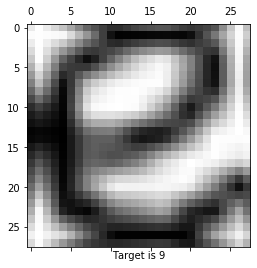

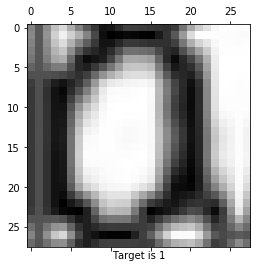

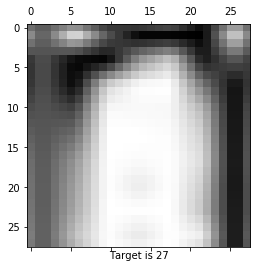

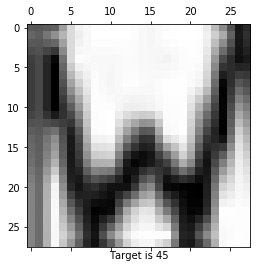

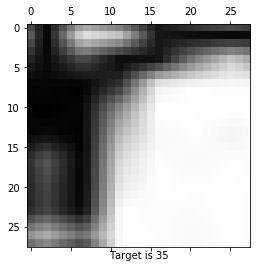

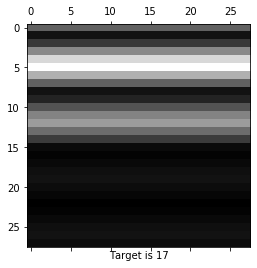

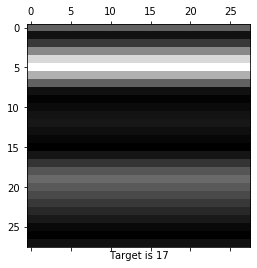

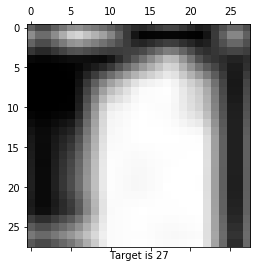

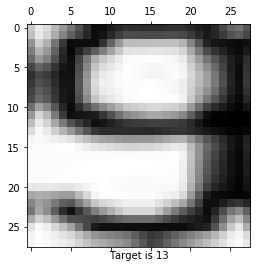

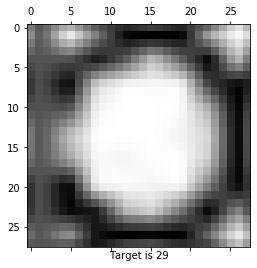

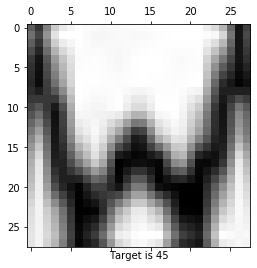

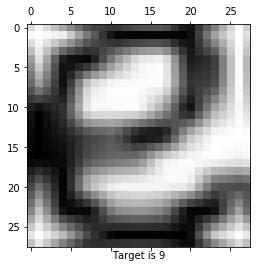

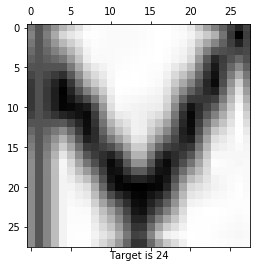

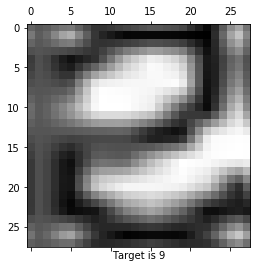

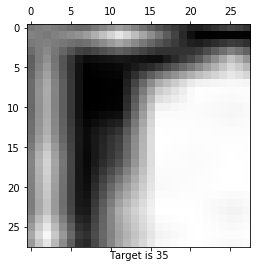

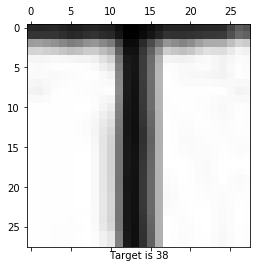

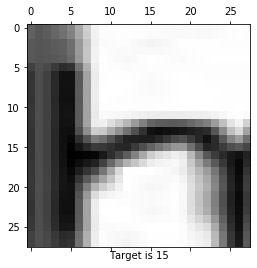

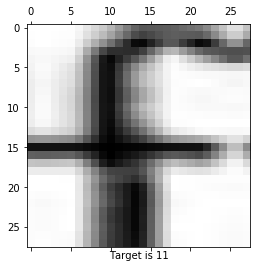

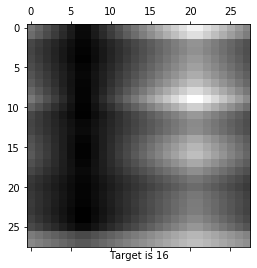

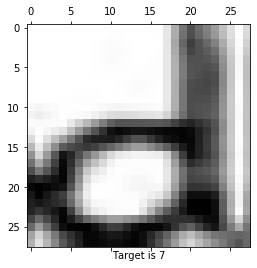

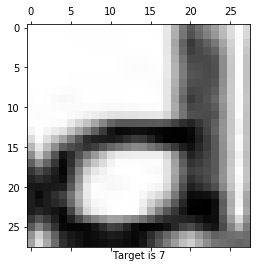

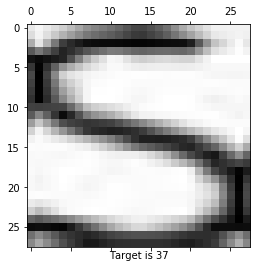

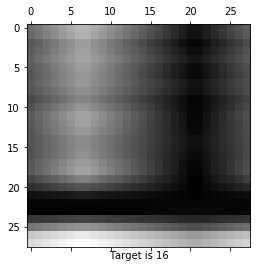

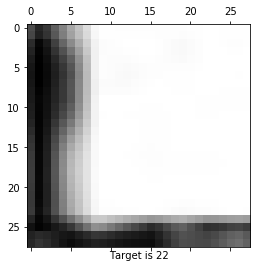

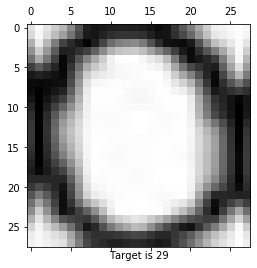

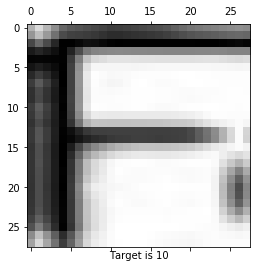

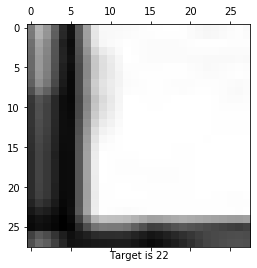

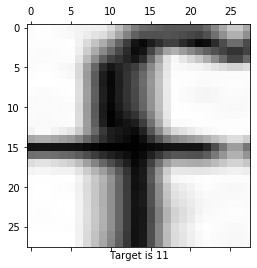

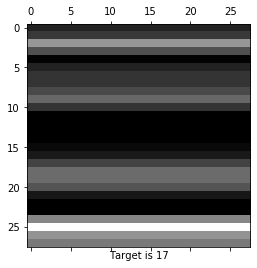

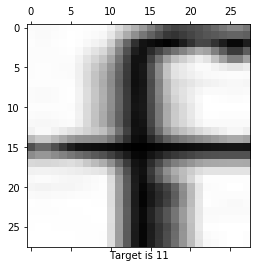

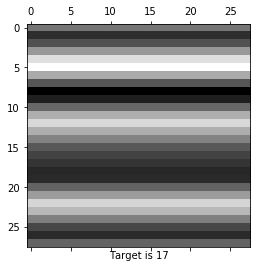

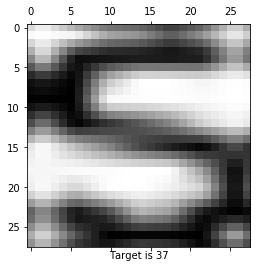

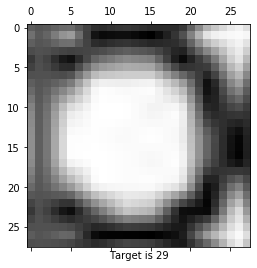

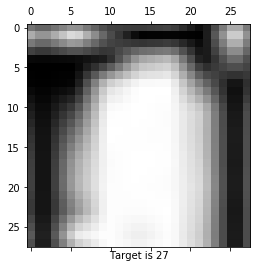

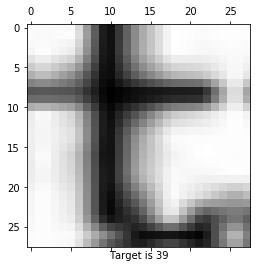

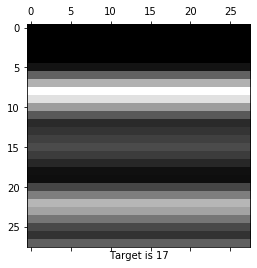

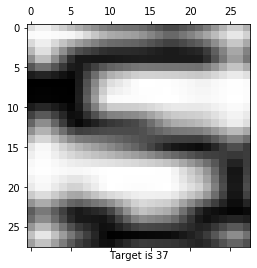

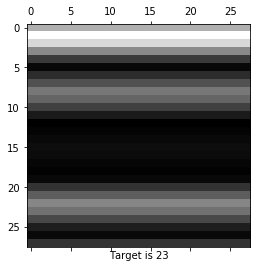

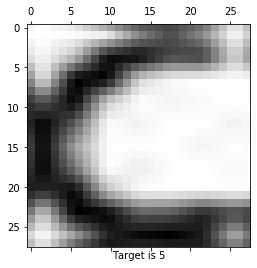

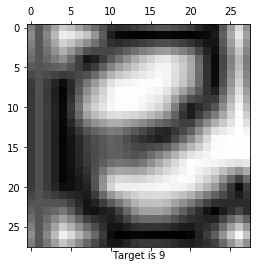

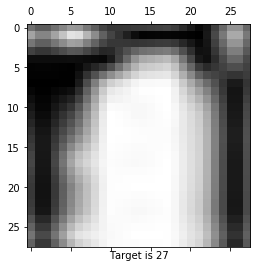

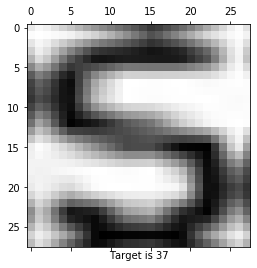

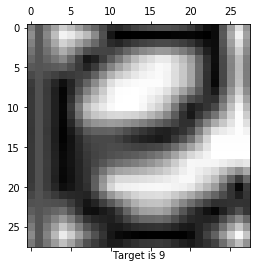

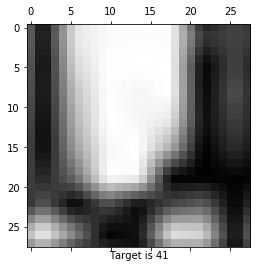

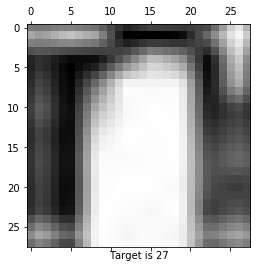

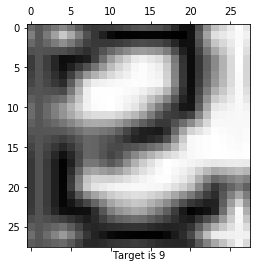

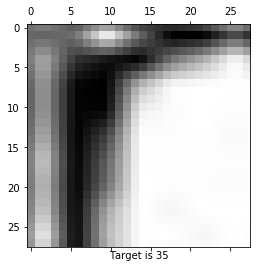

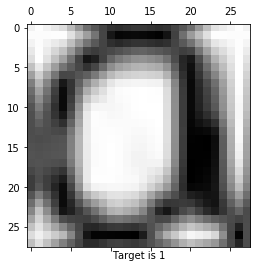

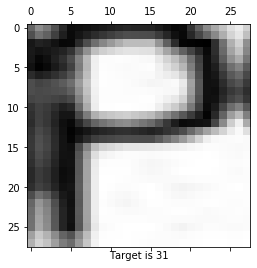

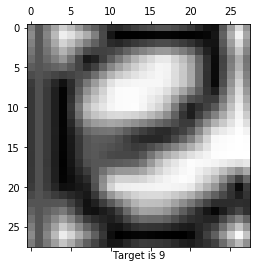

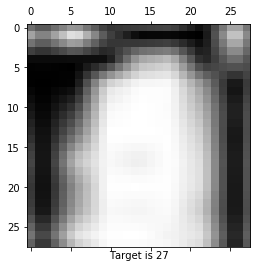

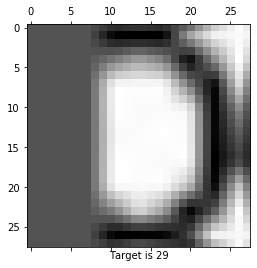

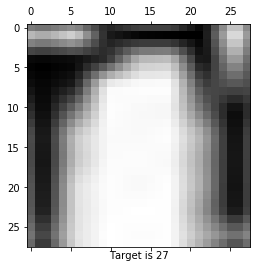

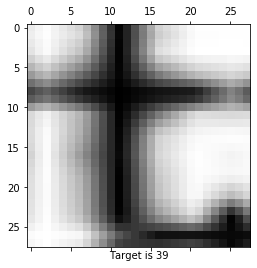

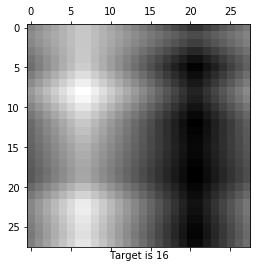

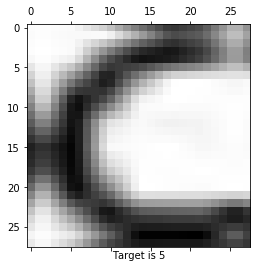

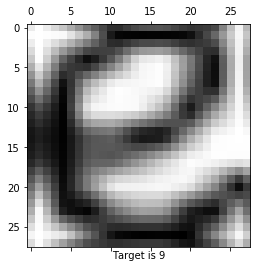

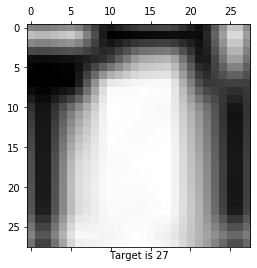

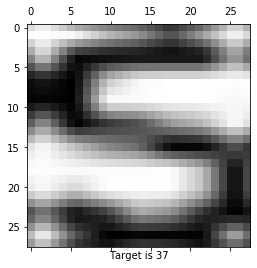

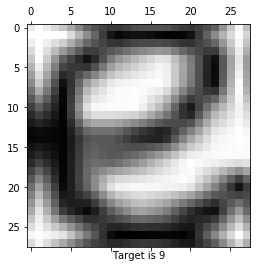

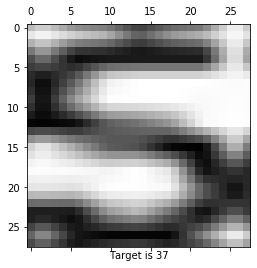

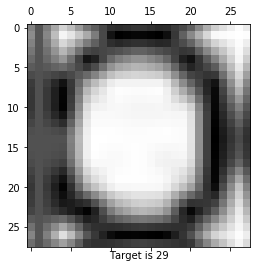

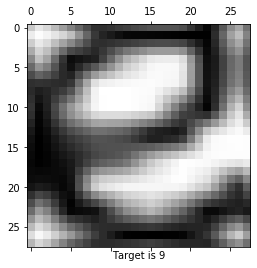

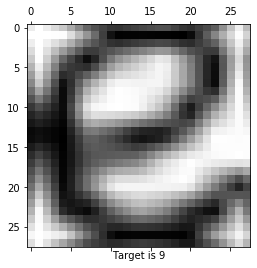

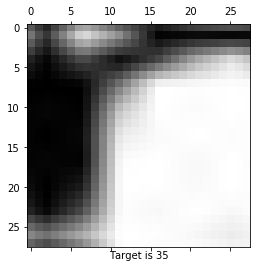

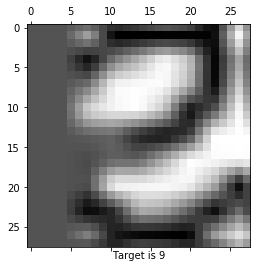

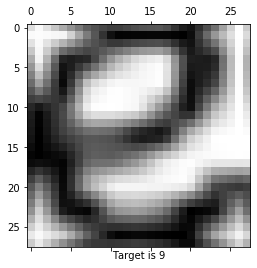

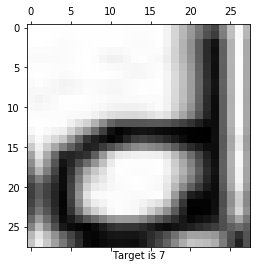

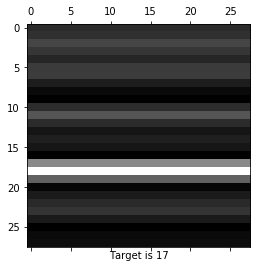

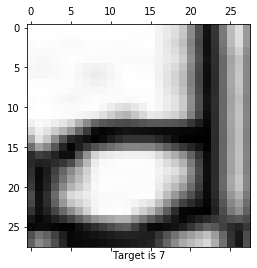

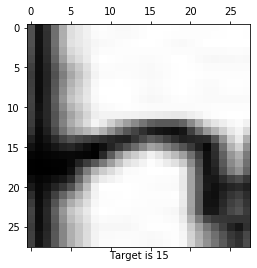

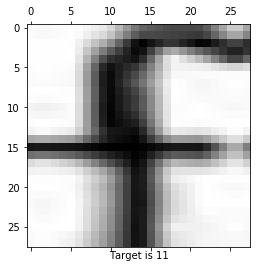

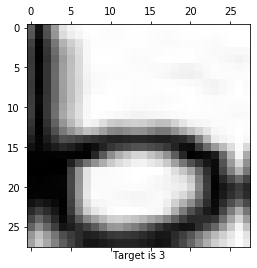

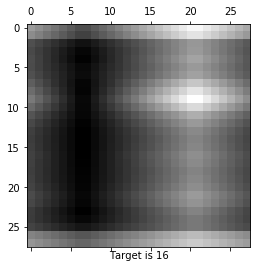

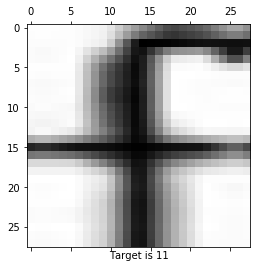

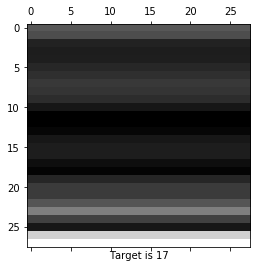

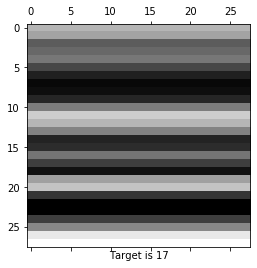

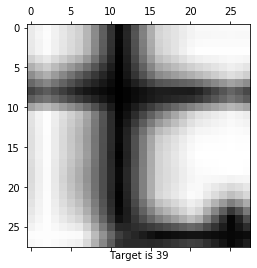

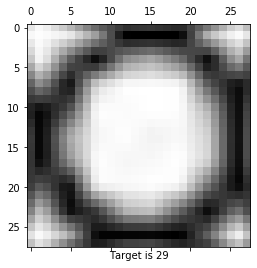

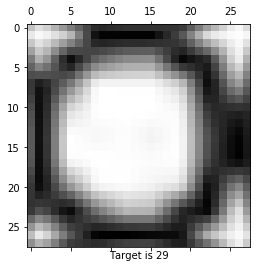

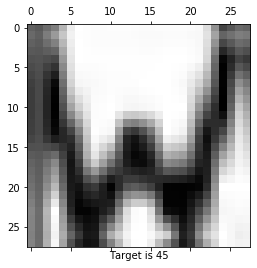

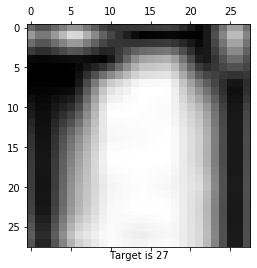

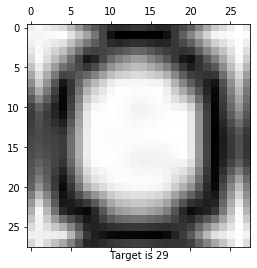

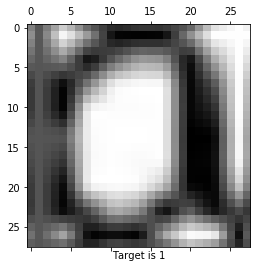

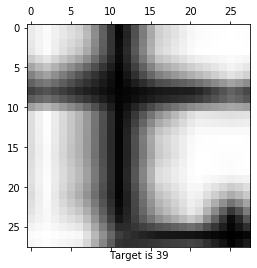

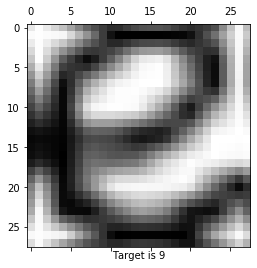

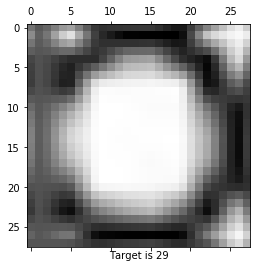

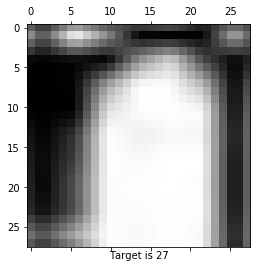

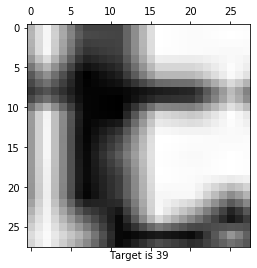

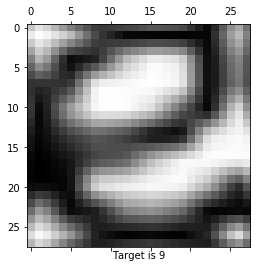

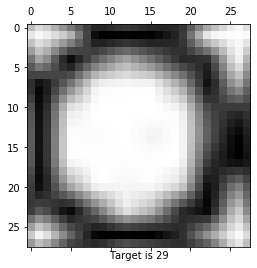

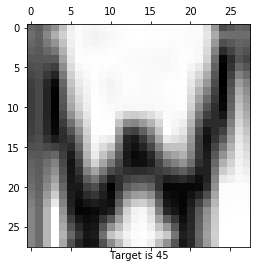

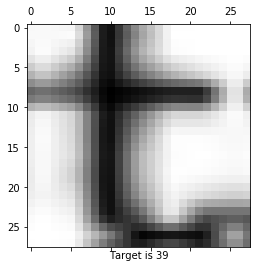

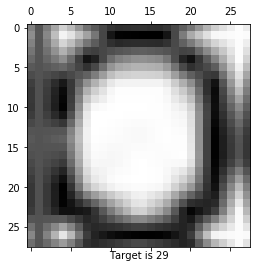

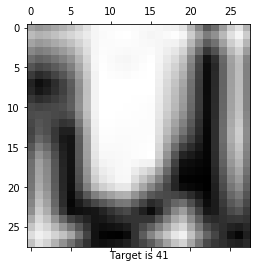

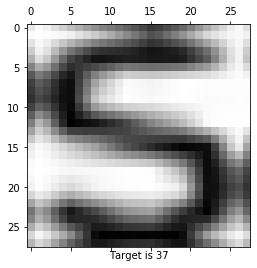

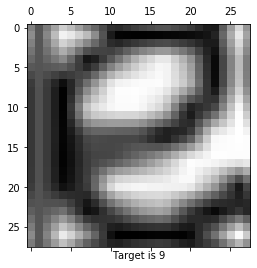

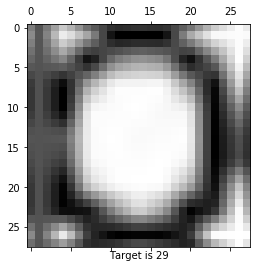

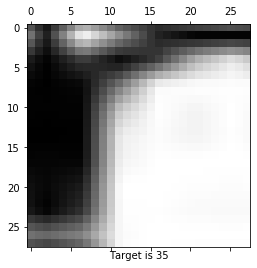

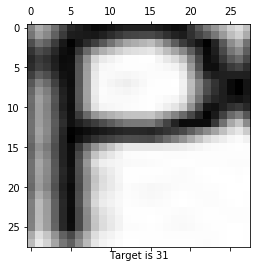

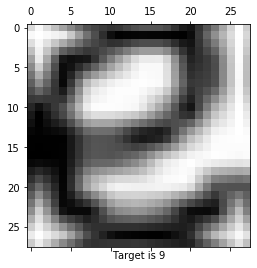

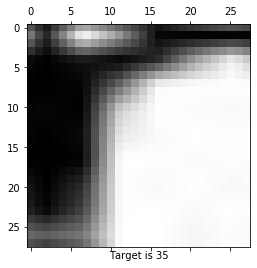

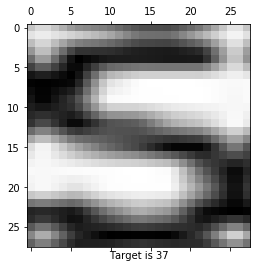

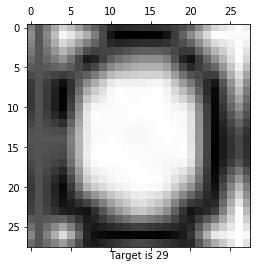

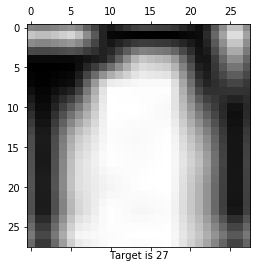

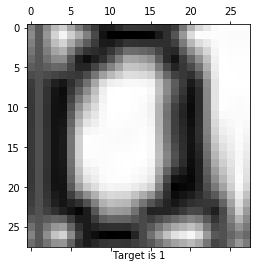

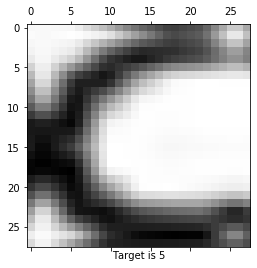

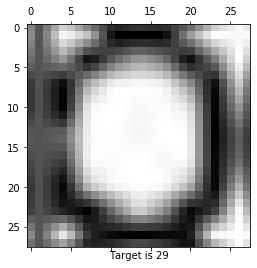

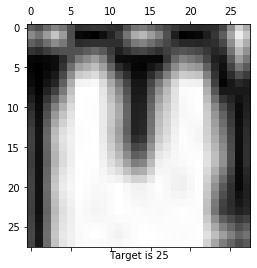

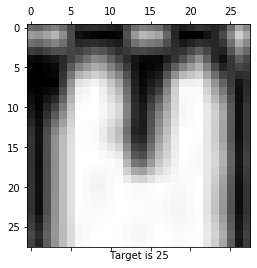

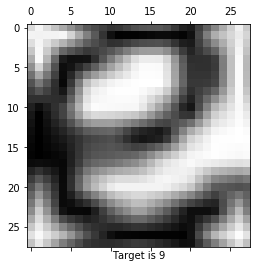

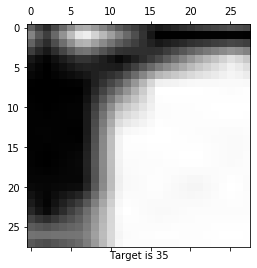

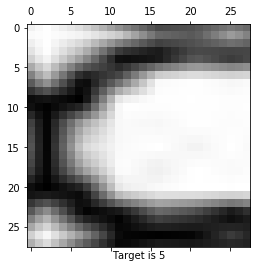

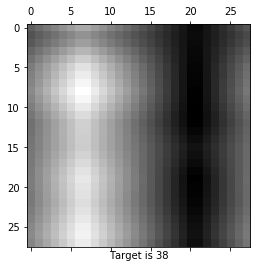

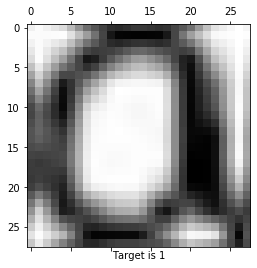

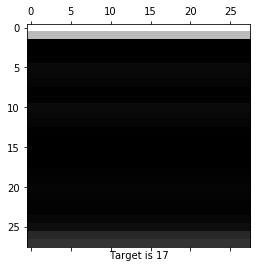

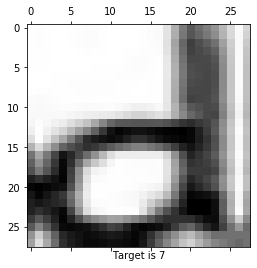

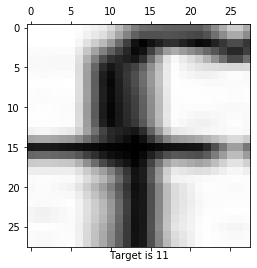

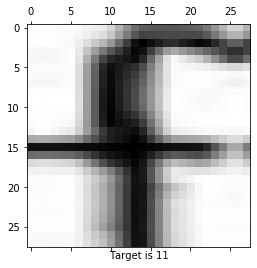

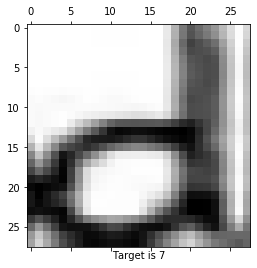

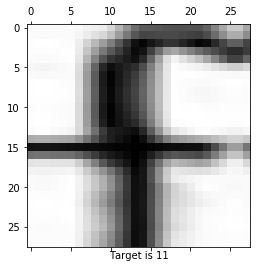

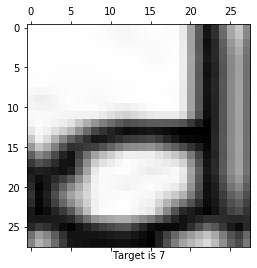

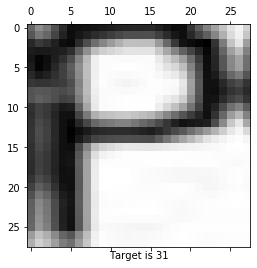

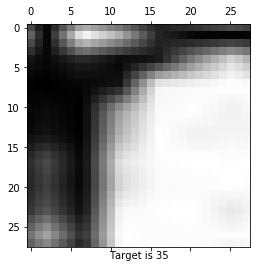

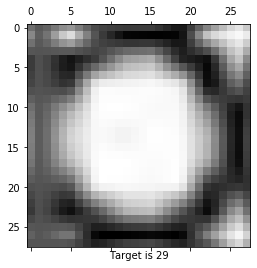

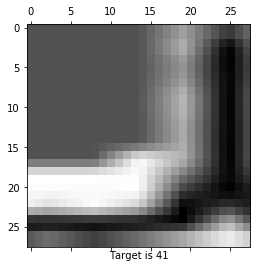

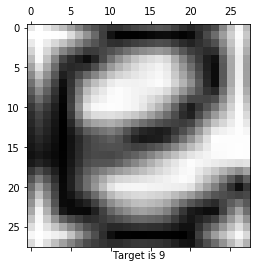

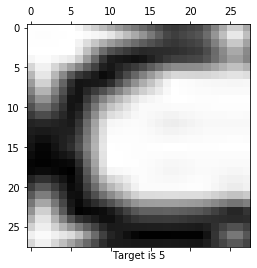

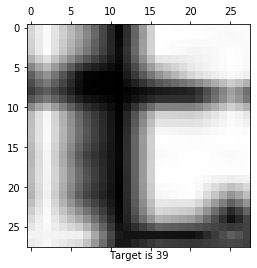

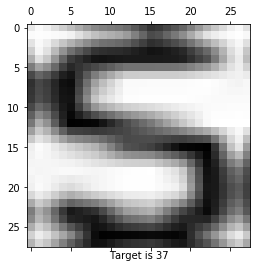

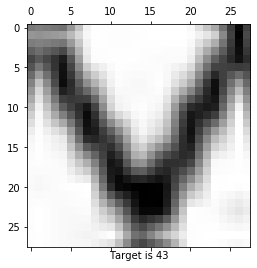

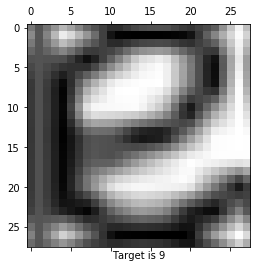

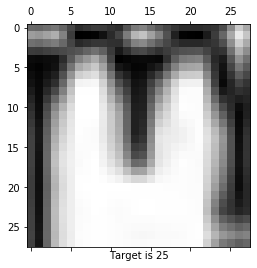

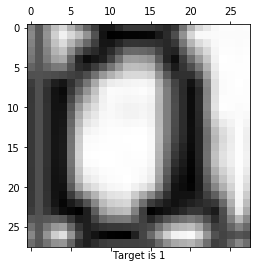

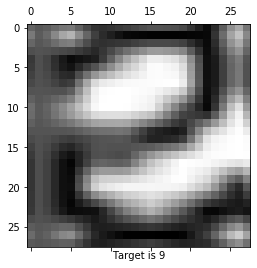

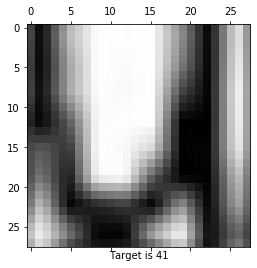

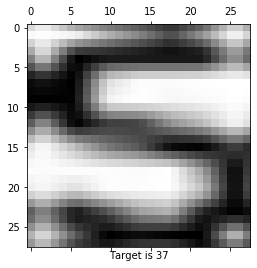

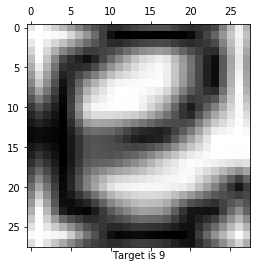

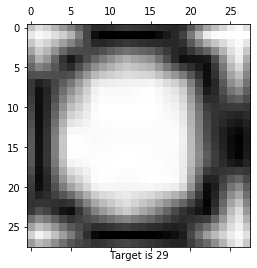

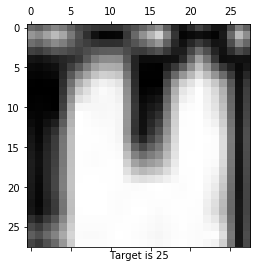

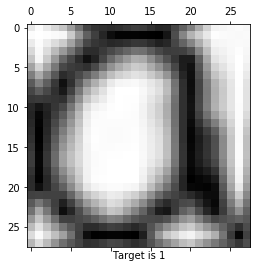

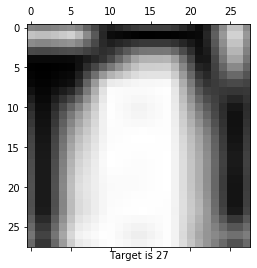

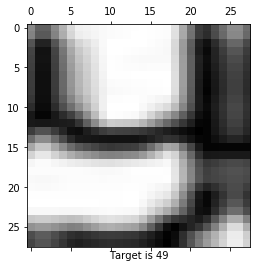

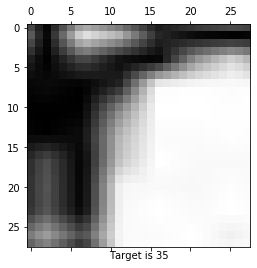

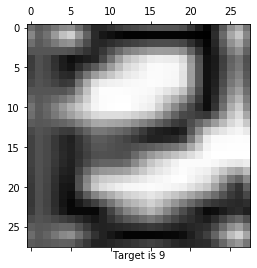

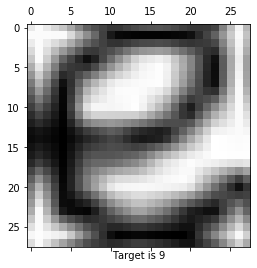

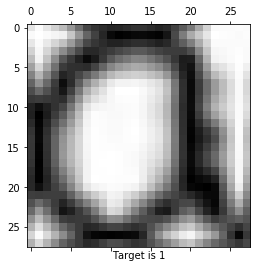

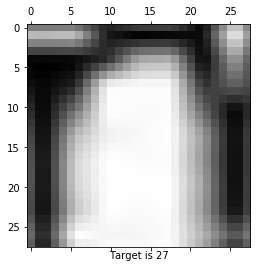

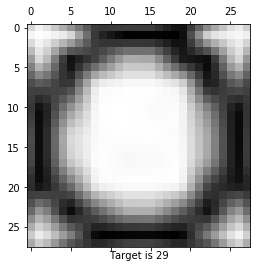

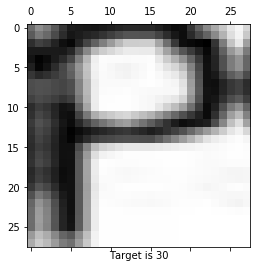

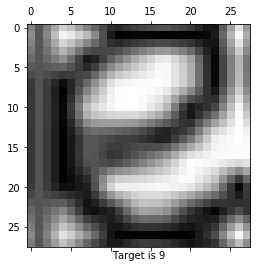

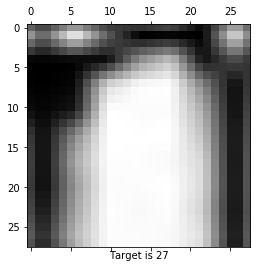

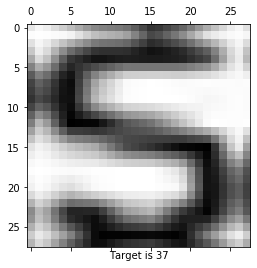

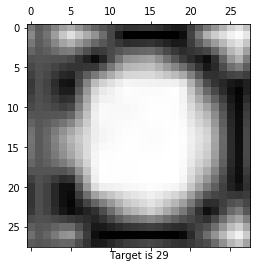

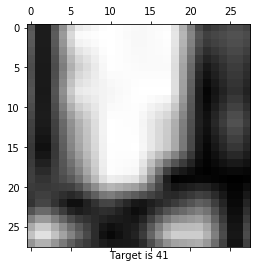

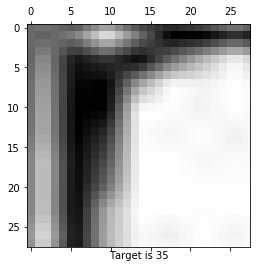

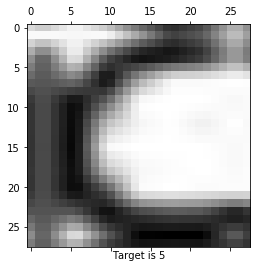

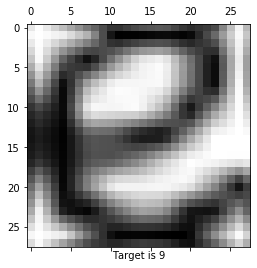

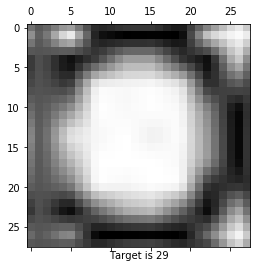

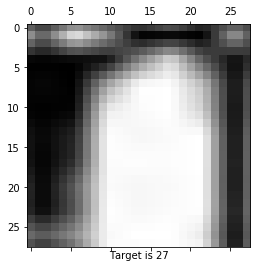

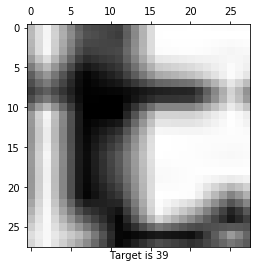

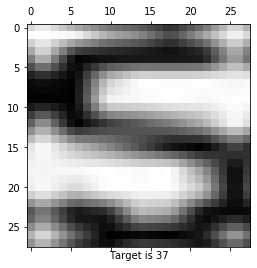

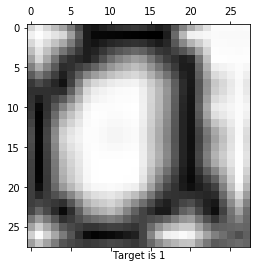

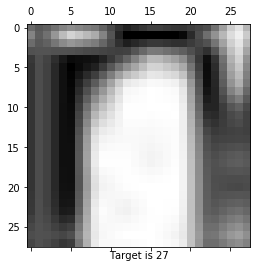

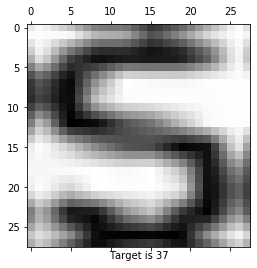

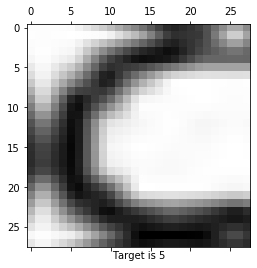

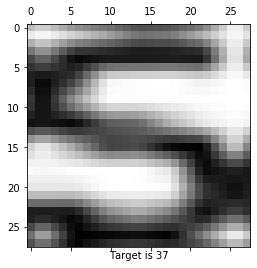

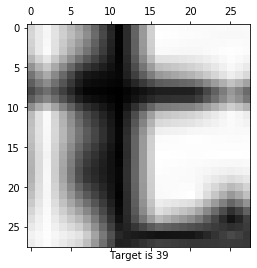

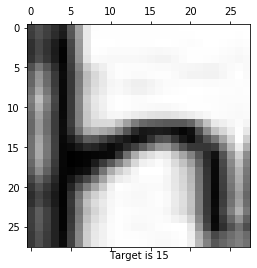

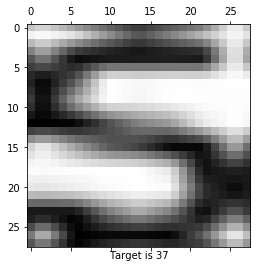

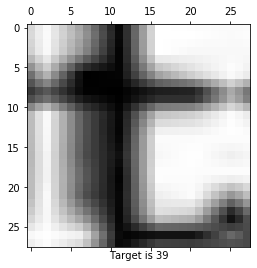

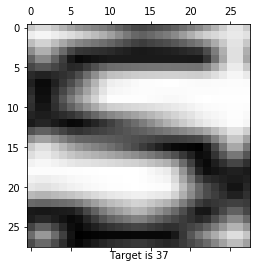

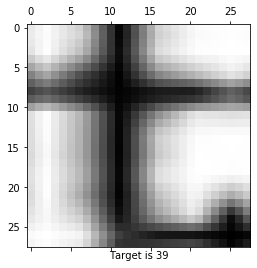

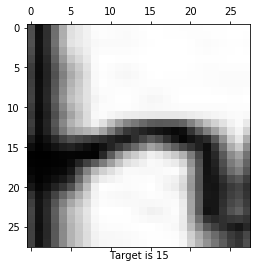

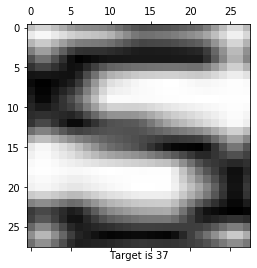

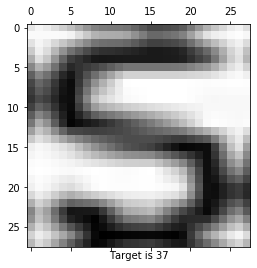

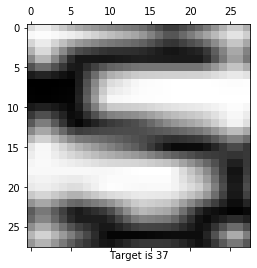

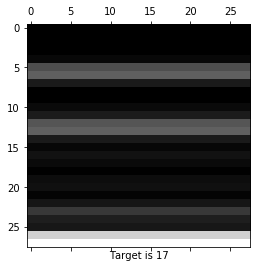

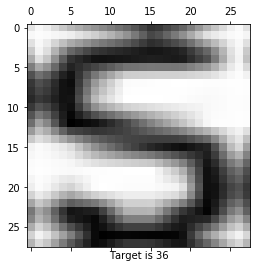

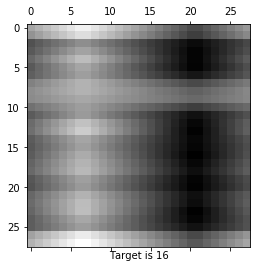

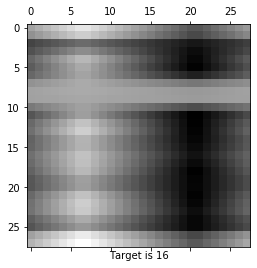

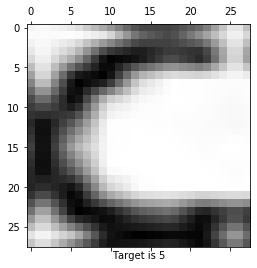

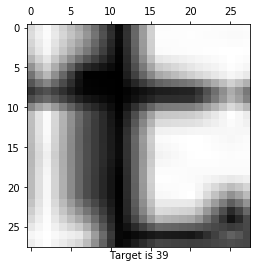

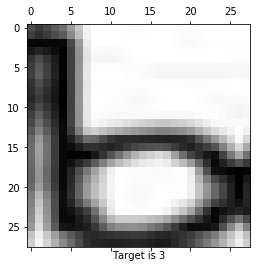

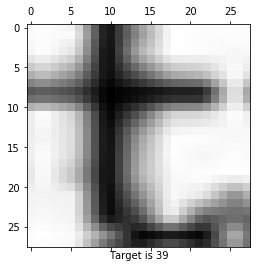

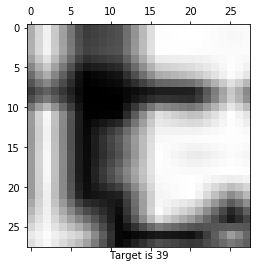

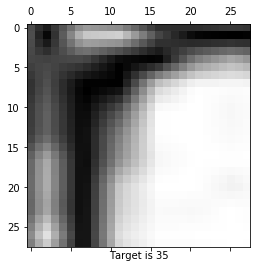

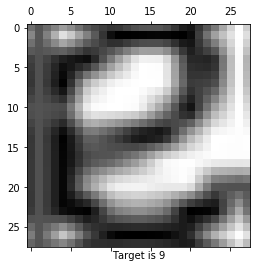

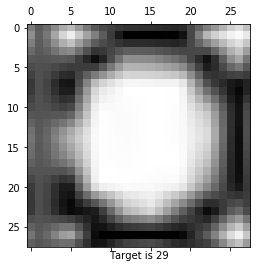

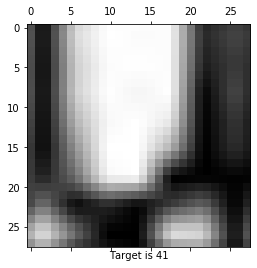

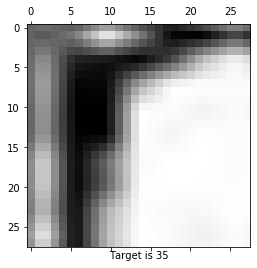

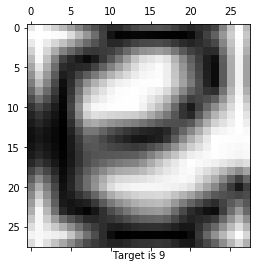

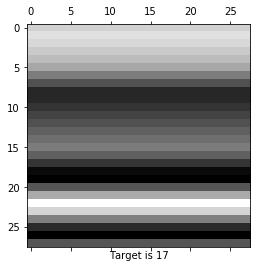

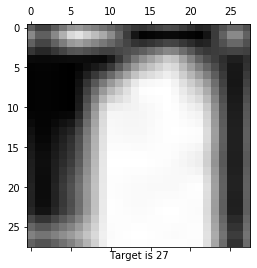

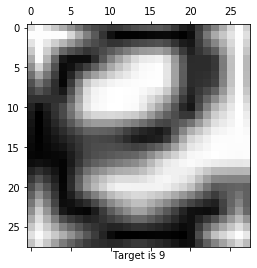

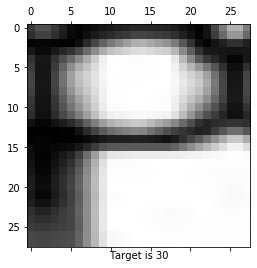

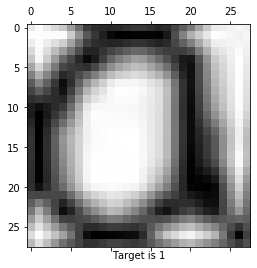

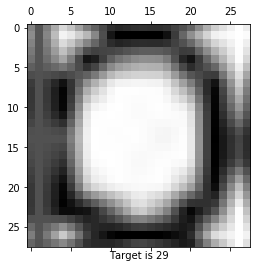

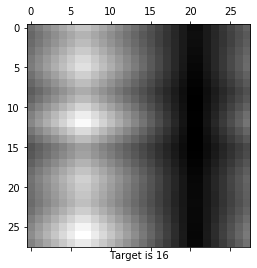

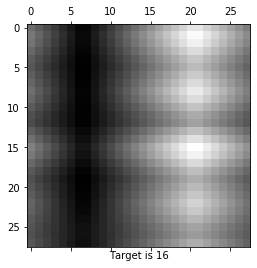

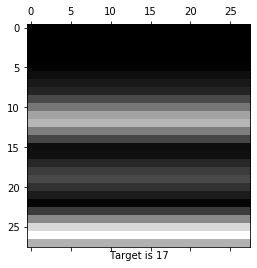

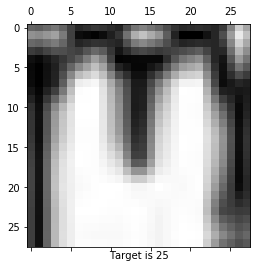

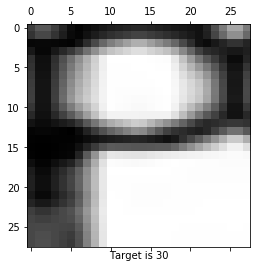

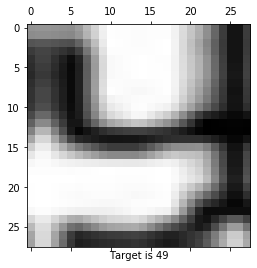

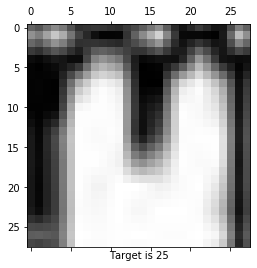

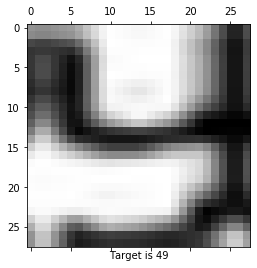

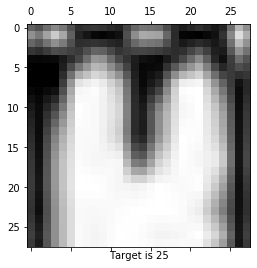

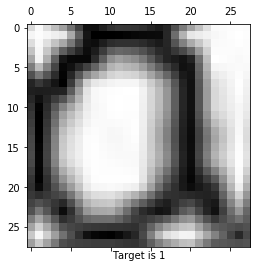

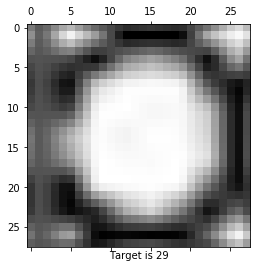

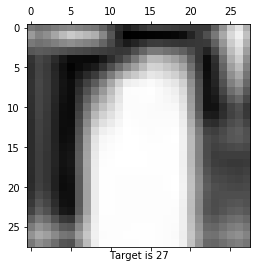

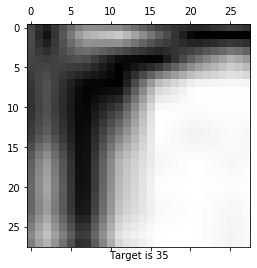

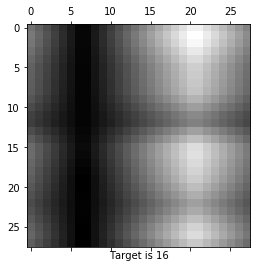

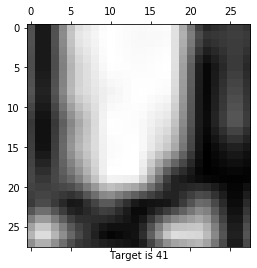

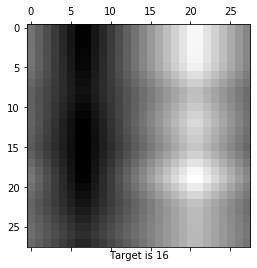

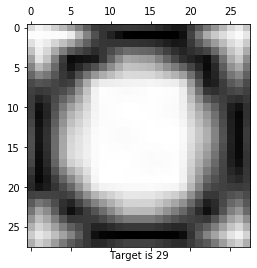

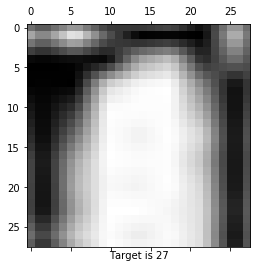

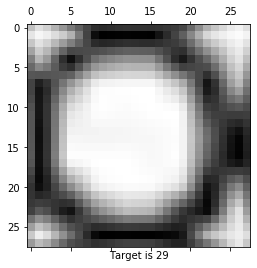

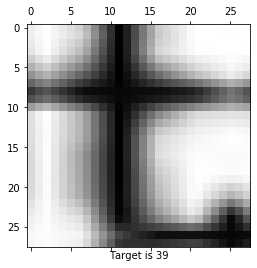

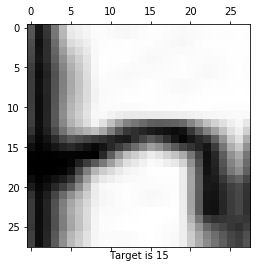

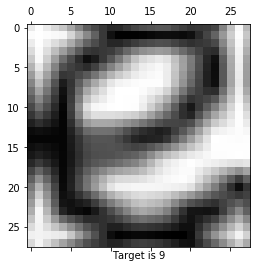

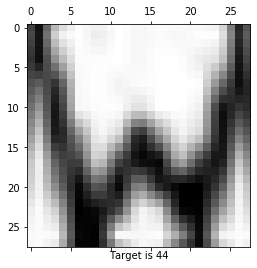

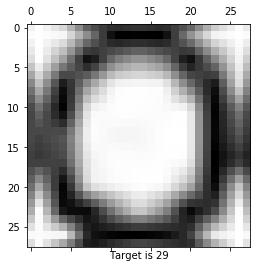

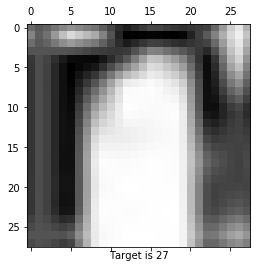

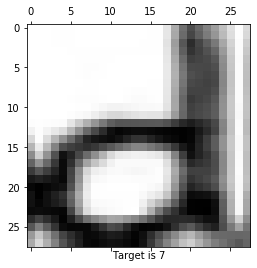

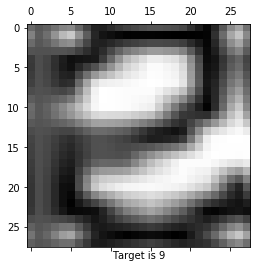

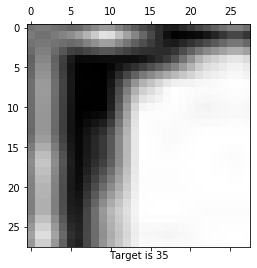

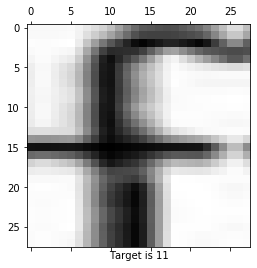

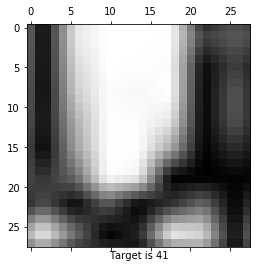

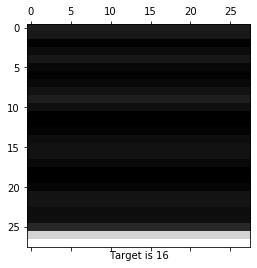

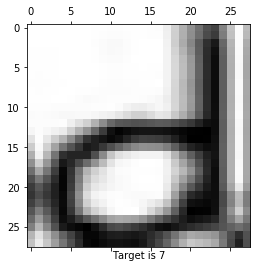

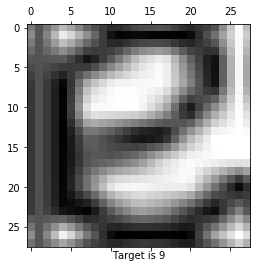

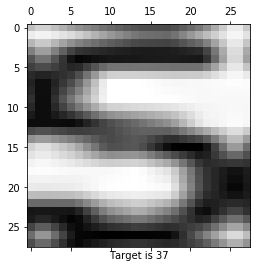

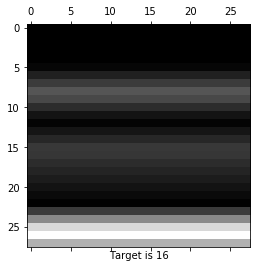

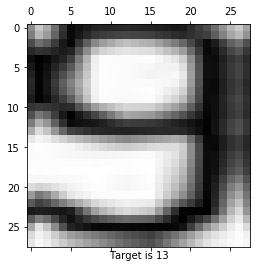

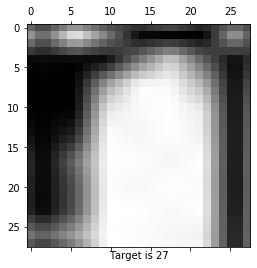

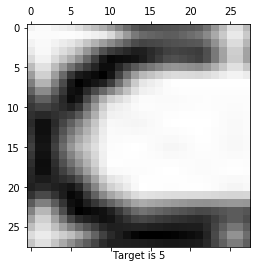

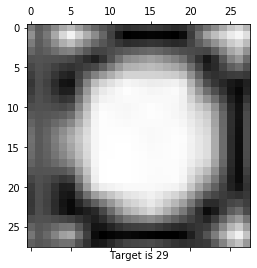

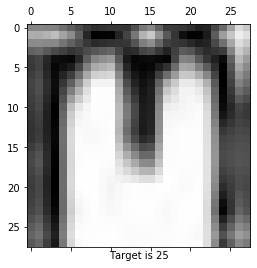

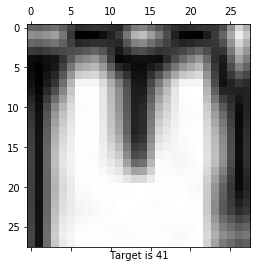

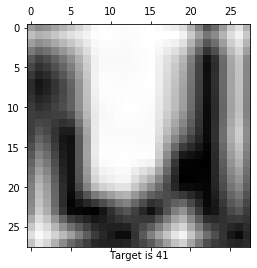

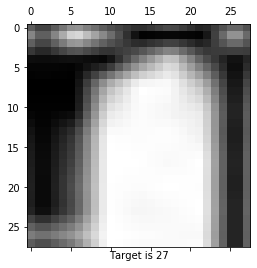

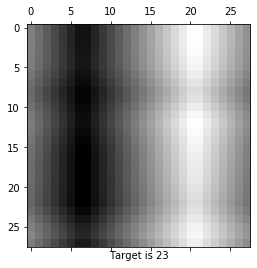

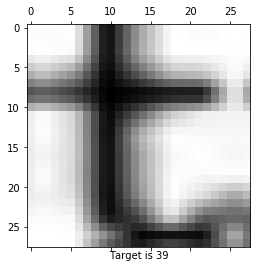

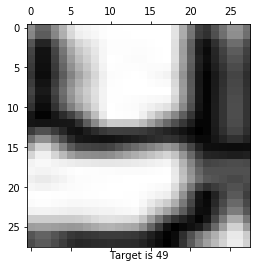

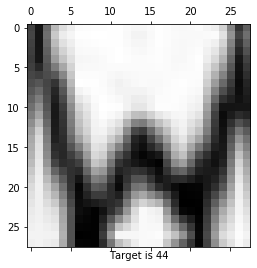

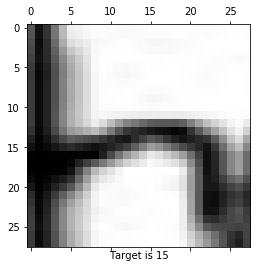

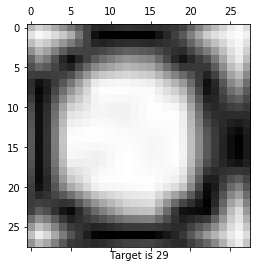

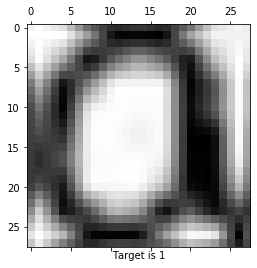

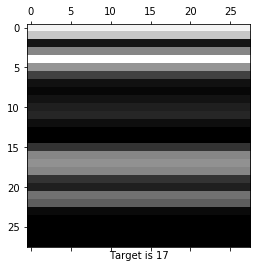

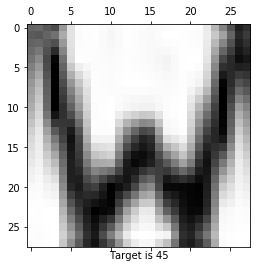

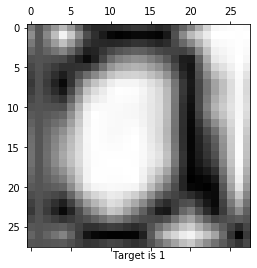

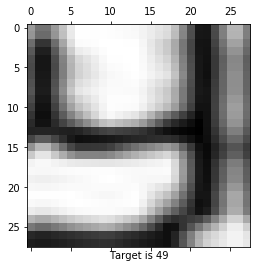

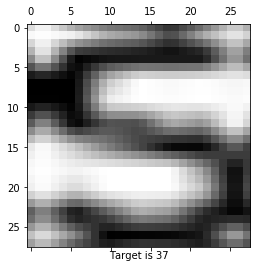

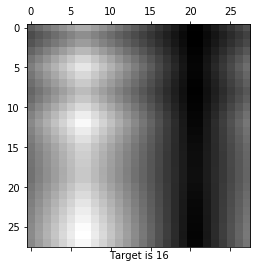

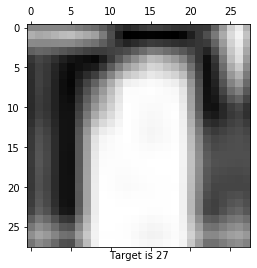

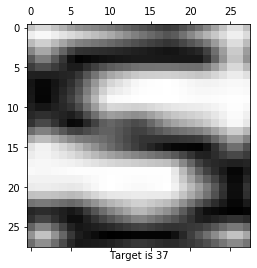

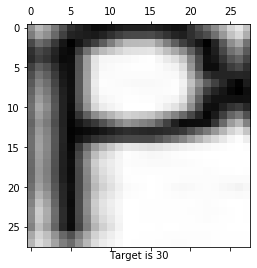

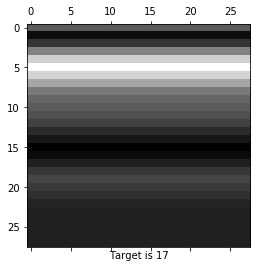

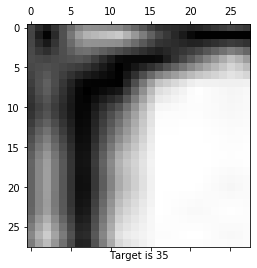

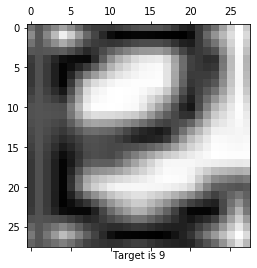

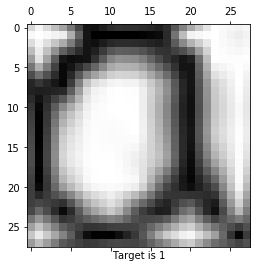

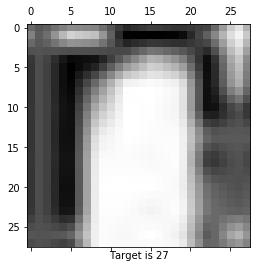

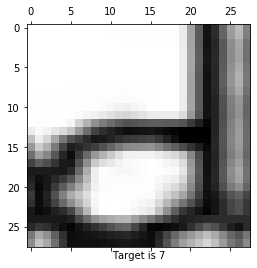

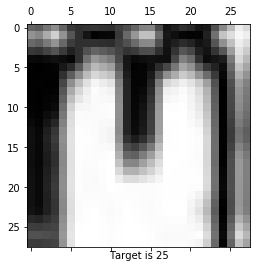

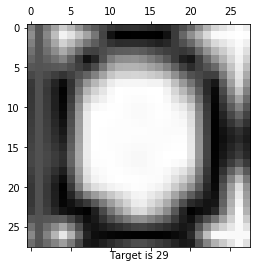

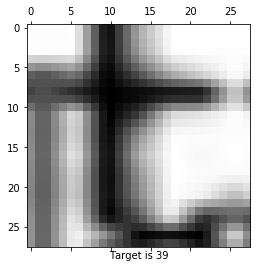

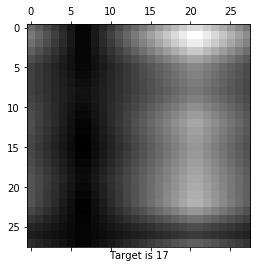

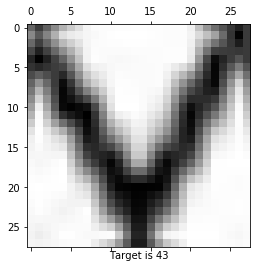

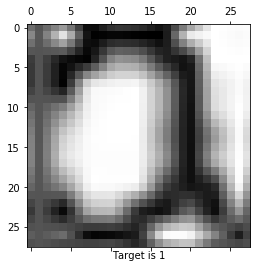

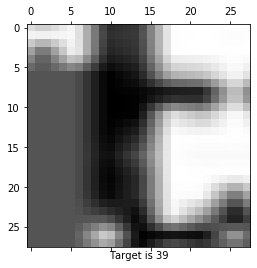

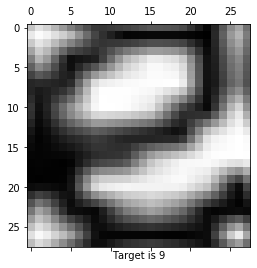

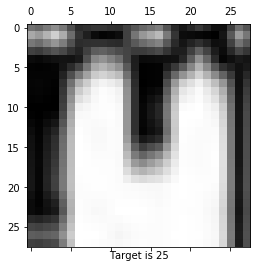

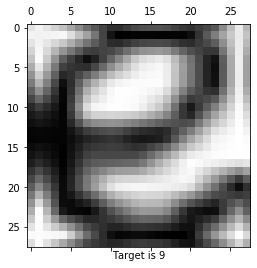

In [10]:
for i in range(0, test.reshape(508,28,28).shape[0]):
    plt.matshow(test.reshape(508,28,28)[i], cmap = 'gray')
    plt.xlabel('Target is ' + str(test_target[i]))

In [11]:
n_samples = len(test)

In [12]:
X_train = train
y_train = train_target
X_val = test[:round(.3 * n_samples)]
y_val = test_target[:round(.3 * n_samples)]
X_test = test[round(.3 * n_samples):]
y_test = test_target[round(.3 * n_samples):]

In [13]:
X_train.shape

(52, 28, 28, 1)

In [14]:
y_train.shape

(52,)

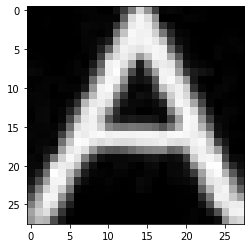

In [15]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0, :, :, 0],cmap=plt.cm.binary)
plt.show()

In [16]:
print(list(train_letter_map.keys())[list(train_letter_map.values()).index(train_target[0])])

A


In [17]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_val = tf.keras.utils.normalize(X_val, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

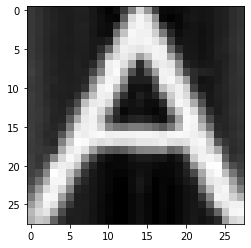

In [18]:
plt.imshow(X_train[0, :, :, 0],cmap=plt.cm.binary)
plt.show()

In [19]:
model = tf.keras.models.Sequential()

In [20]:
model.add(tf.keras.layers.Flatten())

In [21]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [22]:
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))

In [23]:
logits = model.add(tf.keras.layers.Dense(max(train_target) + 1, activation=tf.nn.softmax))

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model_fit = model.fit(X_train, y_train, epochs=20, batch_size = 30, validation_data=(X_val, y_val))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 52 samples, validate on 152 samples
Epoch 1/20
52/52 [==============================] - 0s 4ms/sample - loss: 3.9924 - acc: 0.0192 - val_loss: 3.9104 - val_acc: 0.0921
Epoch 2/20
52/52 [==============================] - 0s 167us/sample - loss: 3.9193 - acc: 0.0385 - val_loss: 3.8951 - val_acc: 0.0921
Epoch 3/20
52/52 [==============================] - 0s 300us/sample - loss: 3.8829 - acc: 0.0577 - val_loss: 3.8761 - val_acc: 0.0921
Epoch 4/20
52/52 [==============================] - 0s 601us/sample - loss: 3.8527 - acc: 0.0577 - val_loss: 3.8352 - val_acc: 0.1053
Epoch 5/20
52/52 [==============================] - 0s 300us/sample - loss: 3.8170 - acc: 0.0962 - val_loss: 3.7998 - val_acc: 0.0395
Epoch 6/20
52/52 [==============================] - 0s 571us/sample - loss: 3.7767 - acc: 0.1154 - val_loss: 3.7663 - val_acc: 0.0724
Epoch 7/20
52/52 [==============================] - 0s 271us/sample - lo

In [26]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print('Loss: ' + str(val_loss))
print('Accuracy: ' + str(val_acc))

152/152 [==============================] - 0s 176us/sample - loss: 3.1884 - acc: 0.4868
Loss: 3.1884006324567293
Accuracy: 0.4868421


In [27]:
from sklearn.metrics import confusion_matrix
y_val_pred = model.predict_classes(X_val)
c_matrix = confusion_matrix(y_val, y_val_pred)

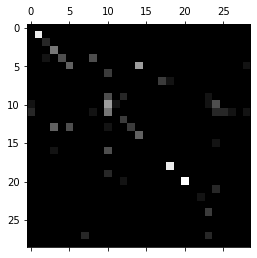

In [28]:
plt.matshow(c_matrix, cmap=plt.cm.gray)
plt.show()

## Loss and accuracy curves

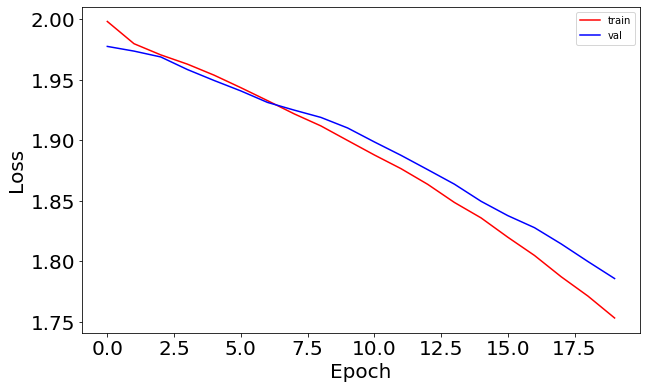

In [29]:
# plot loss
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_fit.history['loss']), 'r', label='train')
ax.plot(np.sqrt(model_fit.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

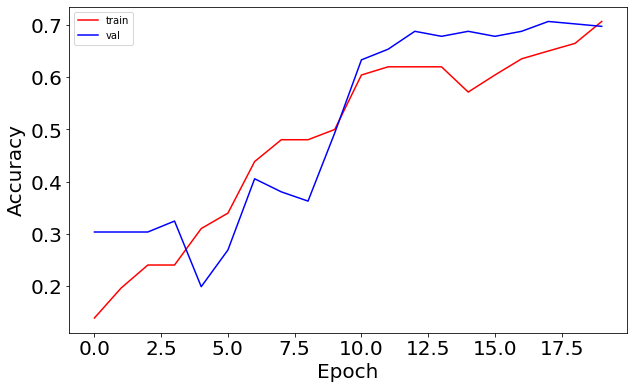

In [30]:
# Plot accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_fit.history['acc']), 'r', label='train')
ax.plot(np.sqrt(model_fit.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [31]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    
    model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    
    logits = model.add(tf.keras.layers.Dense(max(train_target) + 1, activation=tf.nn.softmax))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

## Hyper-parameter tuning

In [32]:
#from create_model import create_model
from sklearn.model_selection import GridSearchCV
new_model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=new_model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best using %s" % (grid_result.best_params_))

Best using {'batch_size': 10, 'epochs': 50}


## Final Predict

#### Applying the best parameters

In [33]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))

logits = model.add(tf.keras.layers.Dense(max(train_target) + 1, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size = 10)

Train on 52 samples
Epoch 1/50
52/52 [==============================] - 0s 8ms/sample - loss: 4.0061 - acc: 0.0000e+00
Epoch 2/50
52/52 [==============================] - 0s 691us/sample - loss: 3.9370 - acc: 0.0385
Epoch 3/50
52/52 [==============================] - 0s 691us/sample - loss: 3.9119 - acc: 0.0769
Epoch 4/50
52/52 [==============================] - 0s 595us/sample - loss: 3.8988 - acc: 0.0577
Epoch 5/50
52/52 [==============================] - 0s 614us/sample - loss: 3.8600 - acc: 0.0769
Epoch 6/50
52/52 [==============================] - 0s 556us/sample - loss: 3.8306 - acc: 0.0962
Epoch 7/50
52/52 [==============================] - 0s 882us/sample - loss: 3.8152 - acc: 0.0962
Epoch 8/50
52/52 [==============================] - 0s 940us/sample - loss: 3.7714 - acc: 0.1154
Epoch 9/50
52/52 [==============================] - 0s 786us/sample - loss: 3.7393 - acc: 0.1154
Epoch 10/50
52/52 [==============================] - 0s 1ms/sample - loss: 3.6969 - acc: 0.1346
Epoch 11/

In [34]:
y_pred = model.predict_classes(test)

In [35]:
target = []
for i in range(0, len(test_target)):
    target.append(list(test_letter_map.keys())[list(test_letter_map.values()).index(test_target[i])])

In [36]:
prediction = []
for i in range(0, len(y_pred)):
    prediction.append(list(test_letter_map.keys())[list(test_letter_map.values()).index(y_pred[i])])

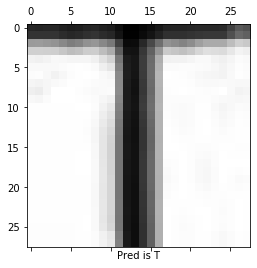

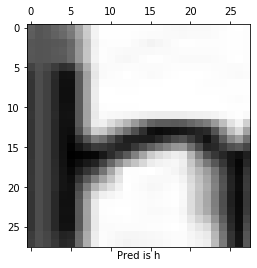

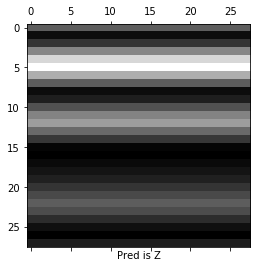

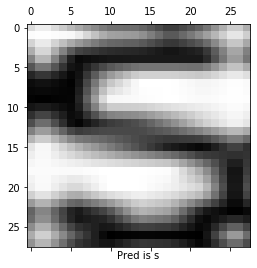

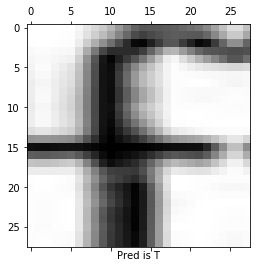

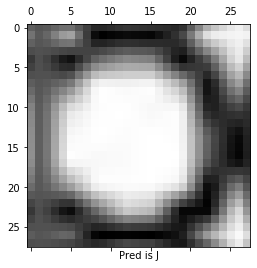

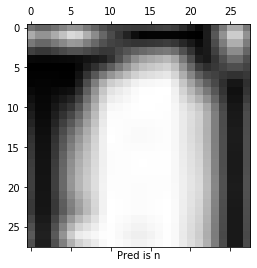

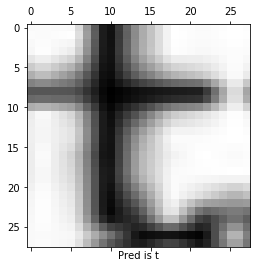

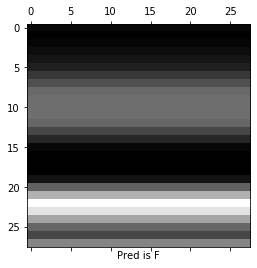

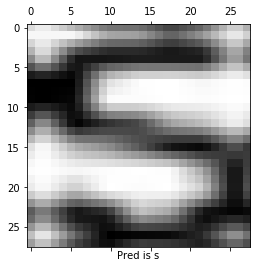

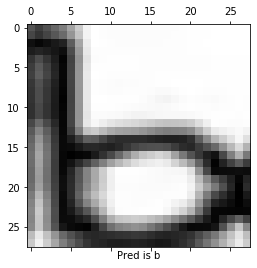

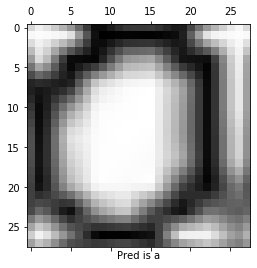

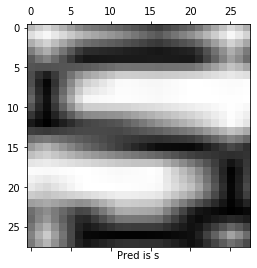

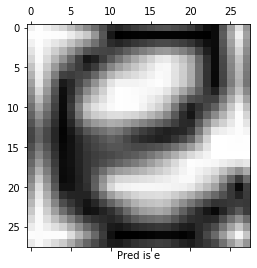

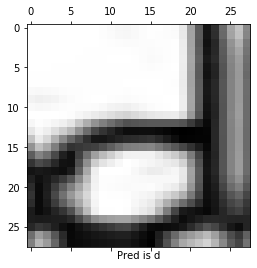

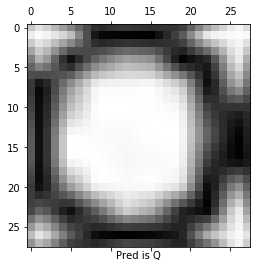

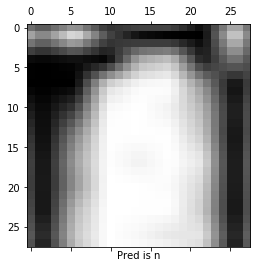

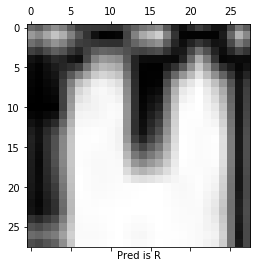

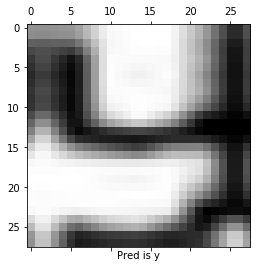

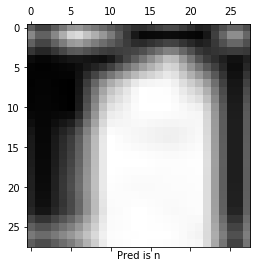

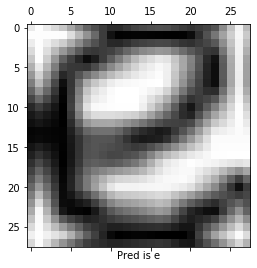

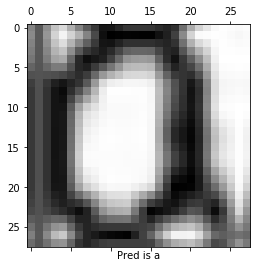

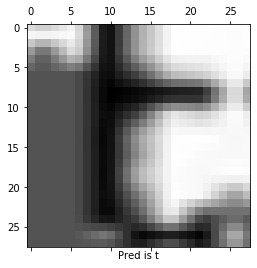

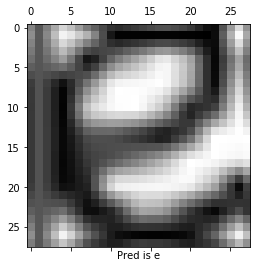

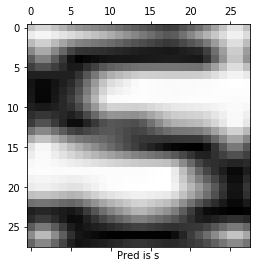

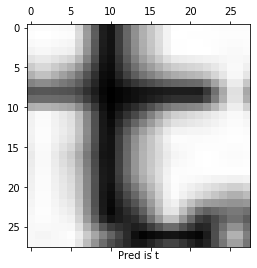

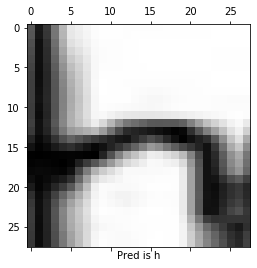

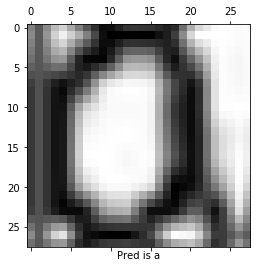

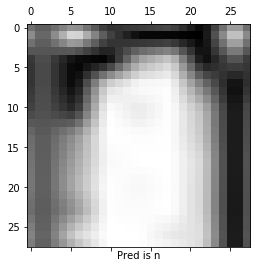

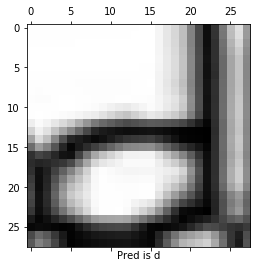

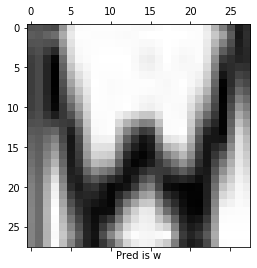

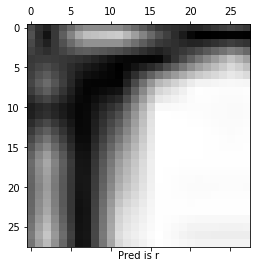

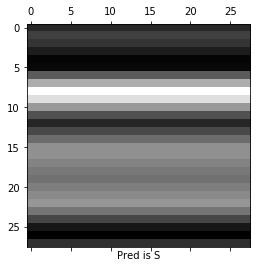

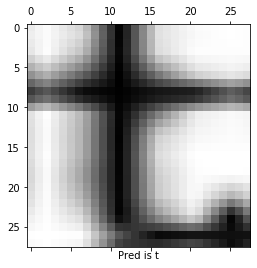

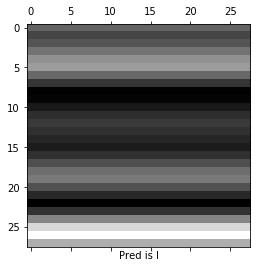

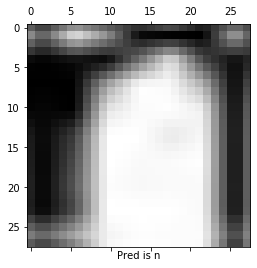

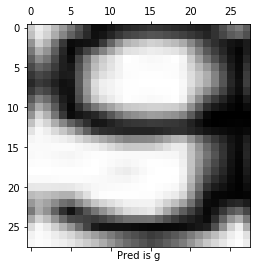

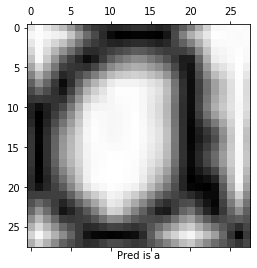

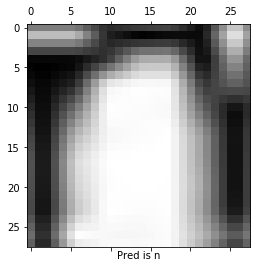

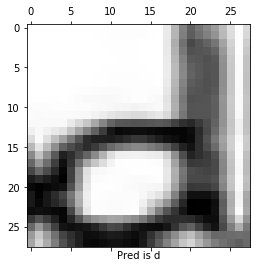

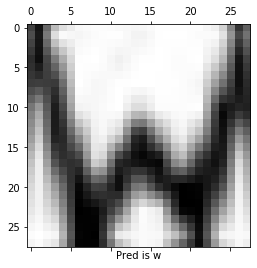

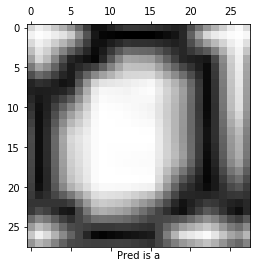

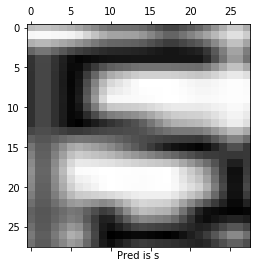

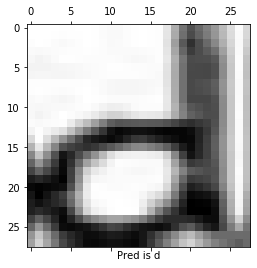

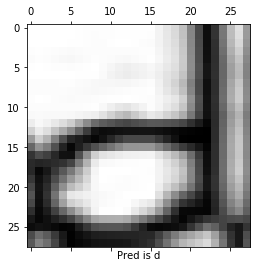

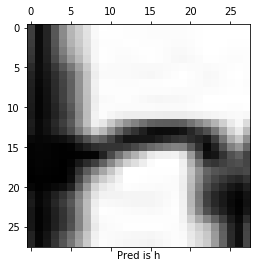

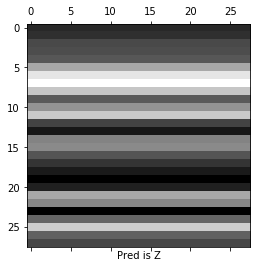

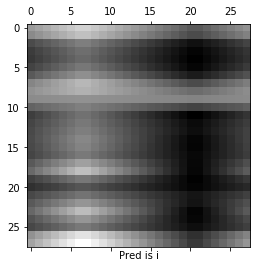

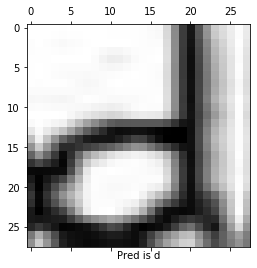

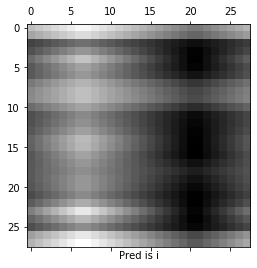

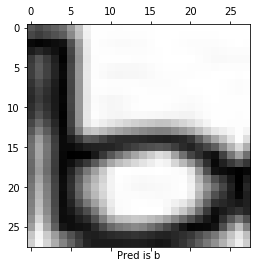

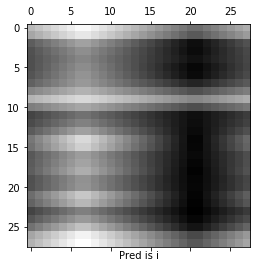

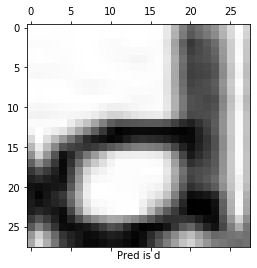

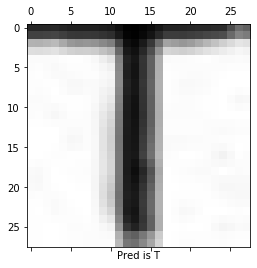

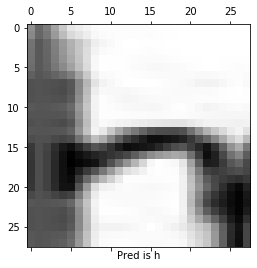

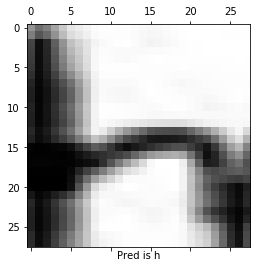

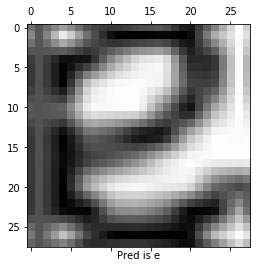

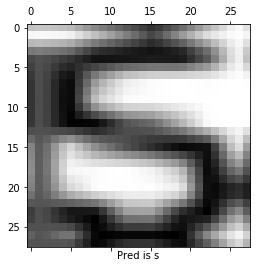

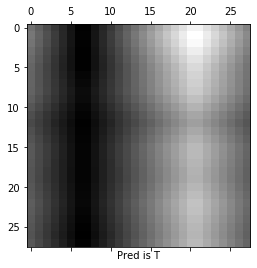

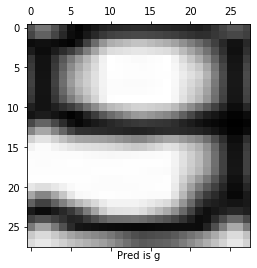

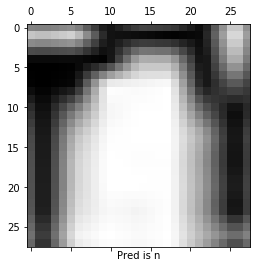

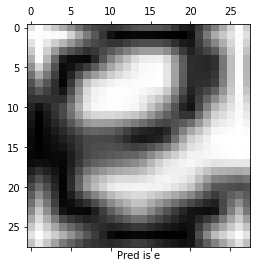

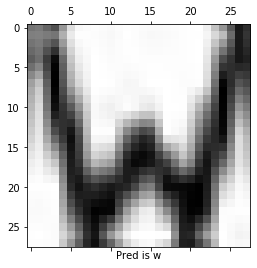

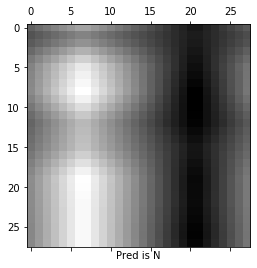

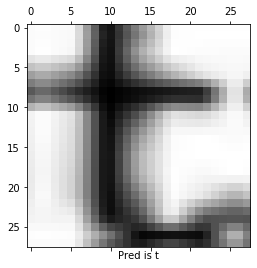

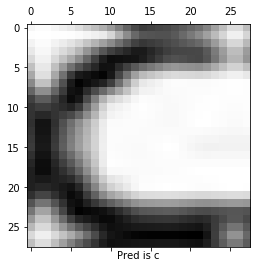

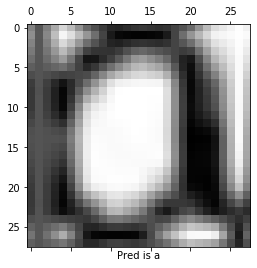

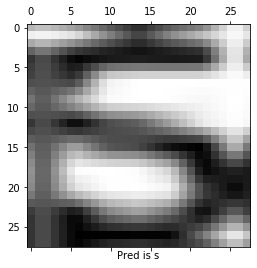

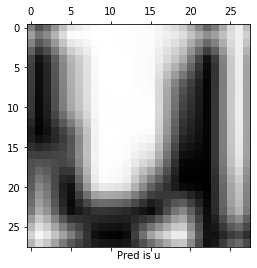

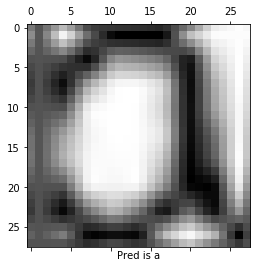

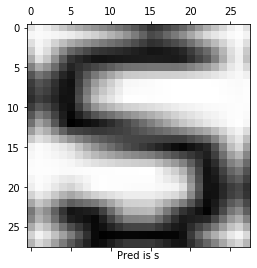

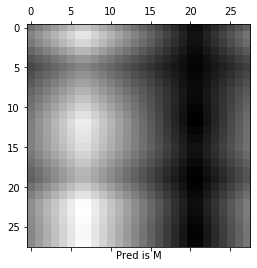

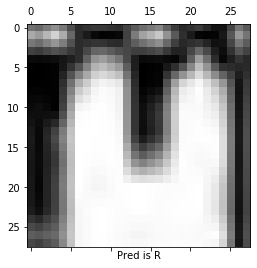

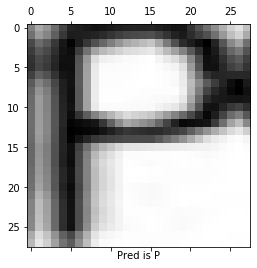

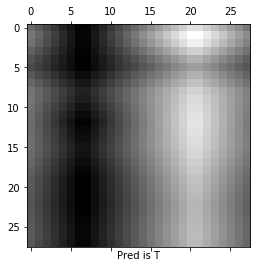

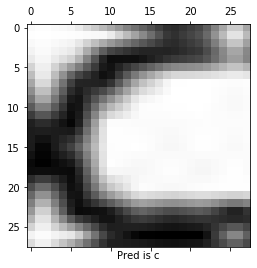

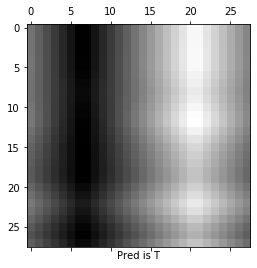

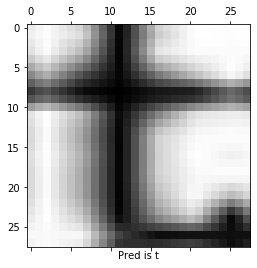

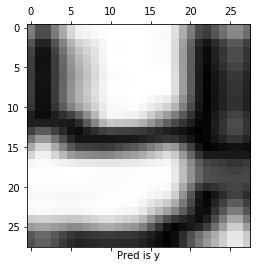

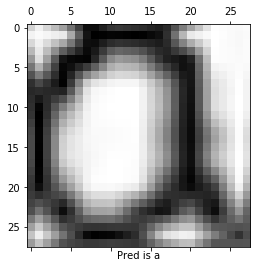

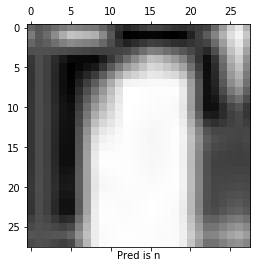

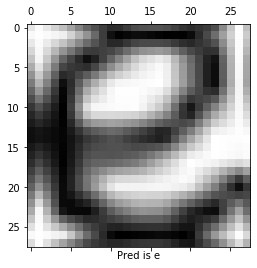

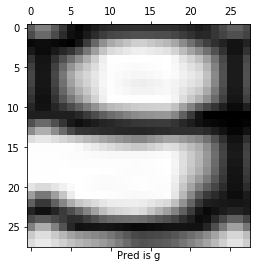

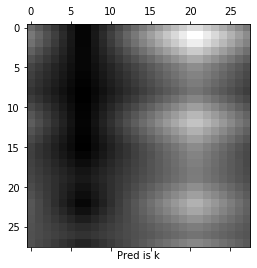

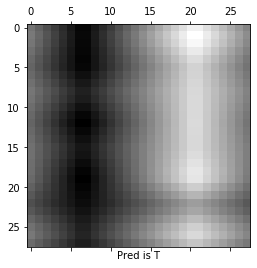

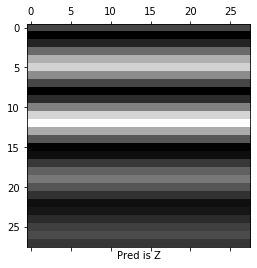

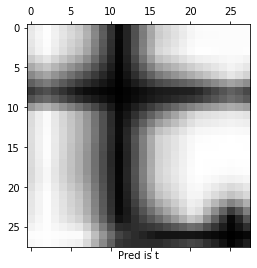

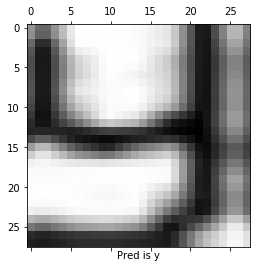

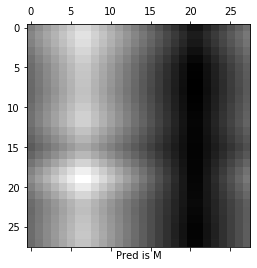

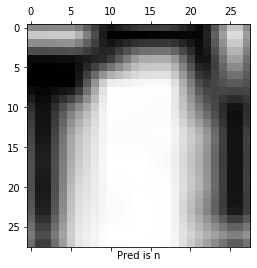

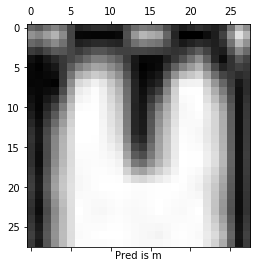

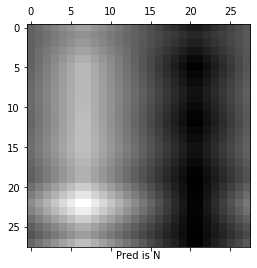

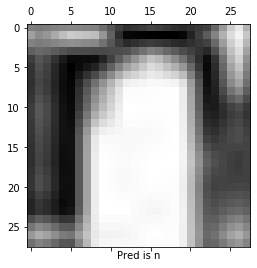

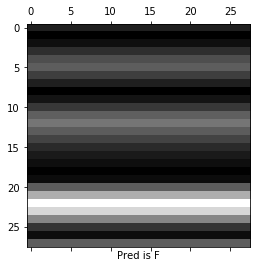

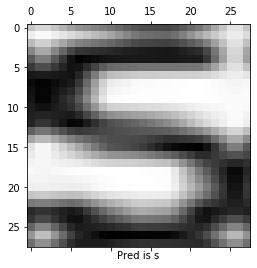

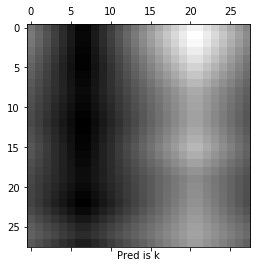

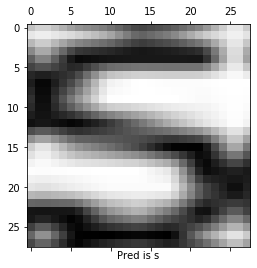

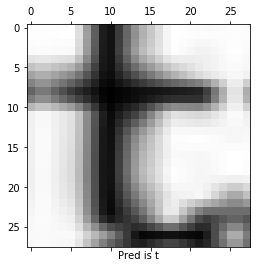

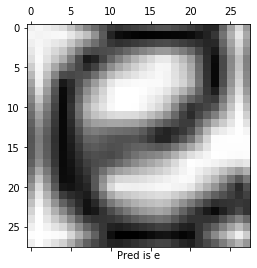

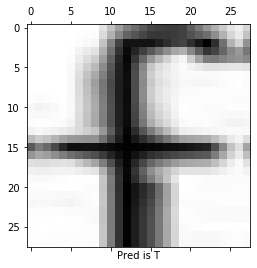

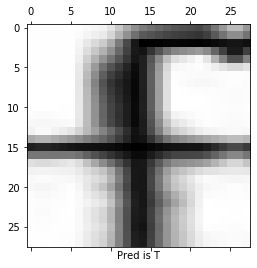

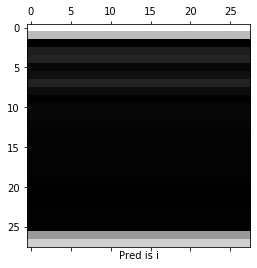

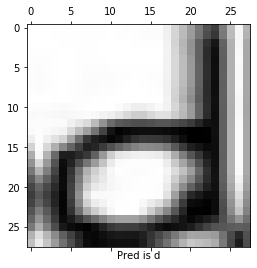

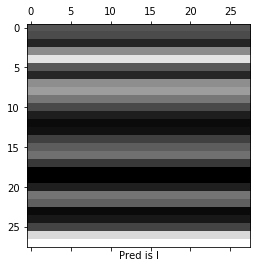

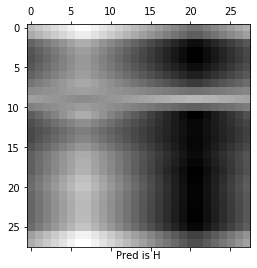

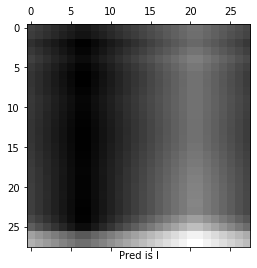

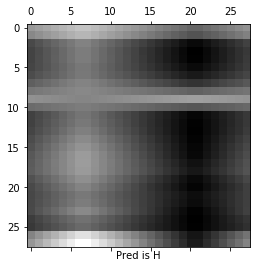

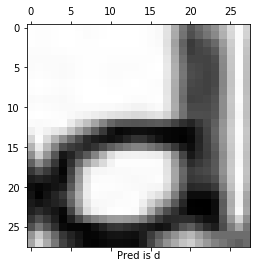

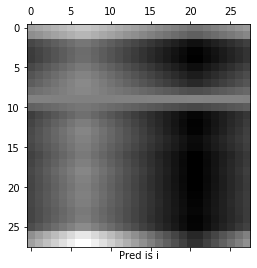

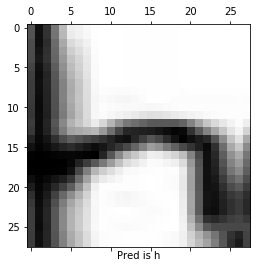

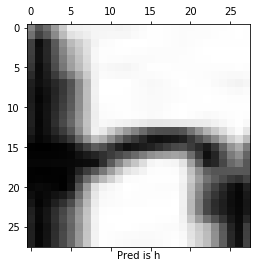

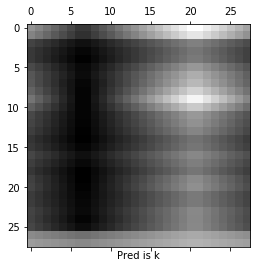

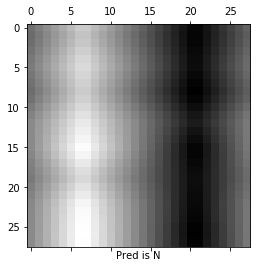

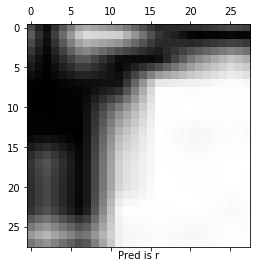

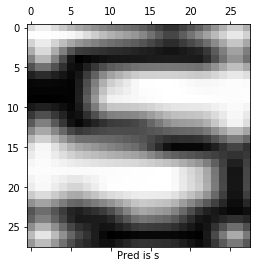

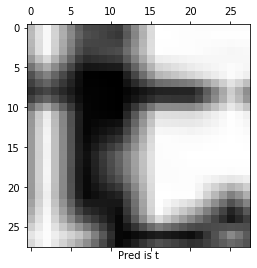

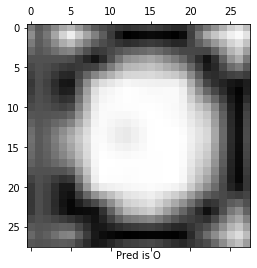

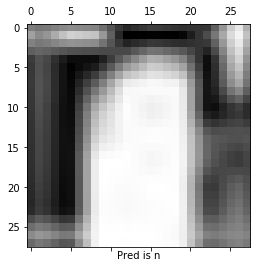

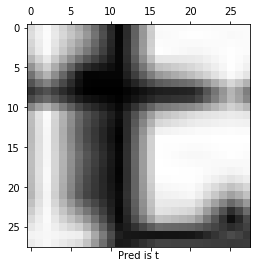

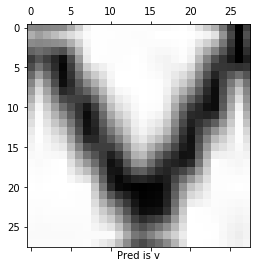

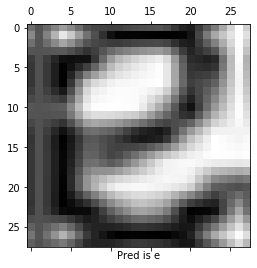

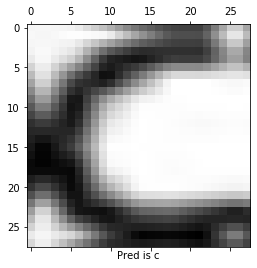

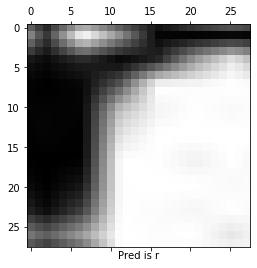

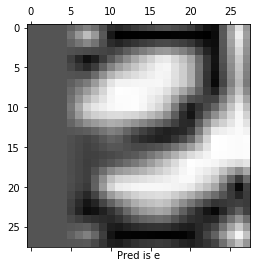

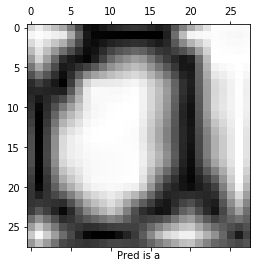

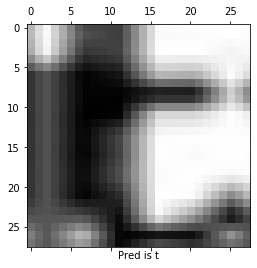

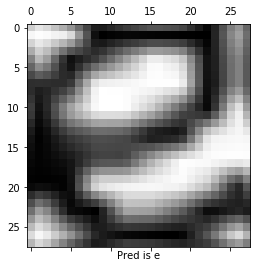

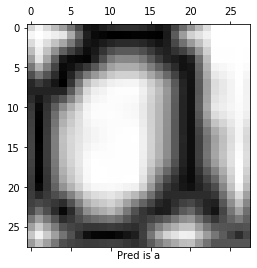

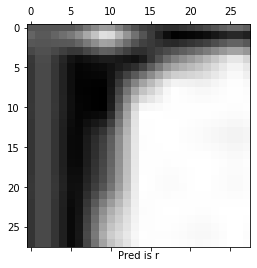

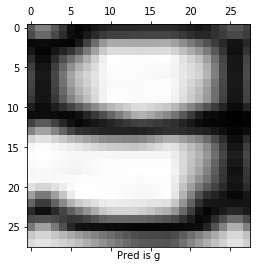

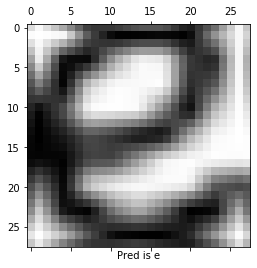

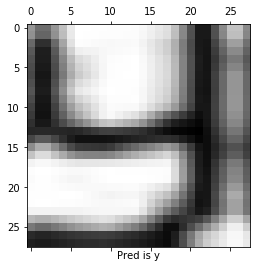

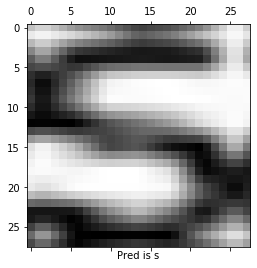

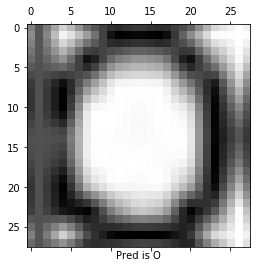

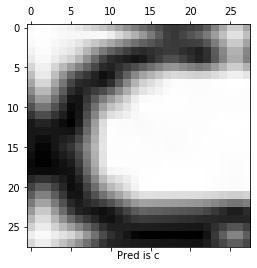

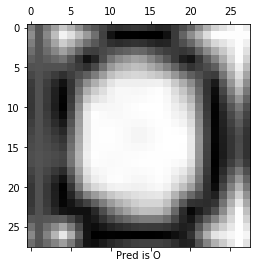

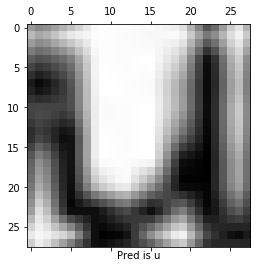

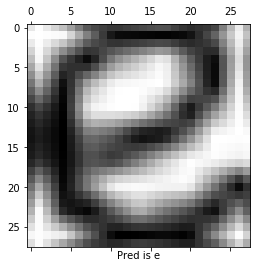

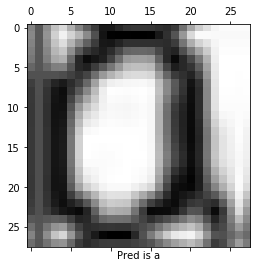

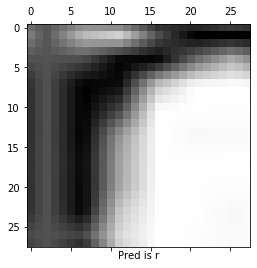

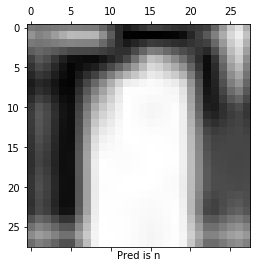

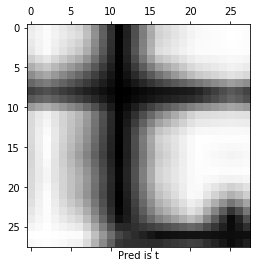

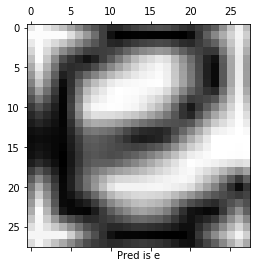

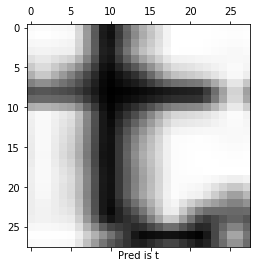

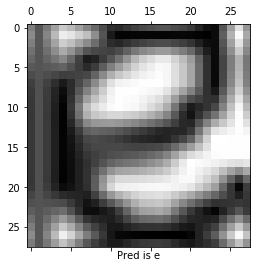

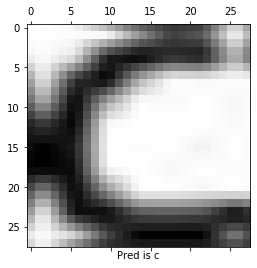

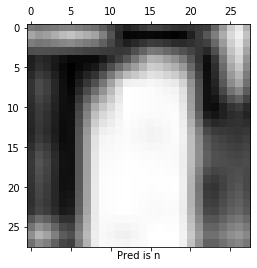

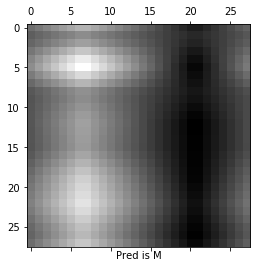

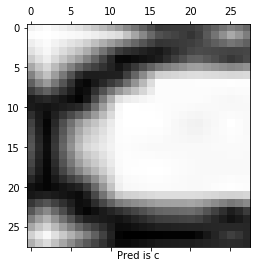

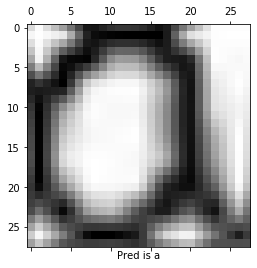

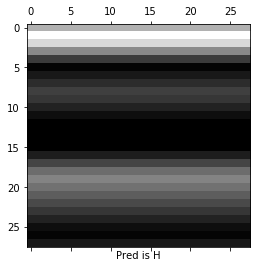

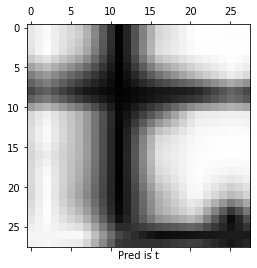

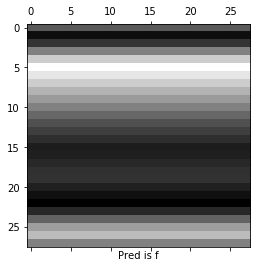

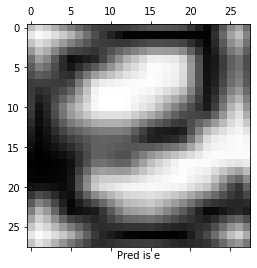

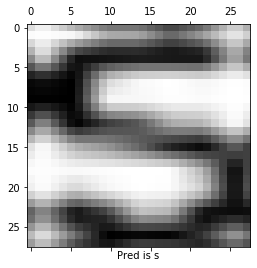

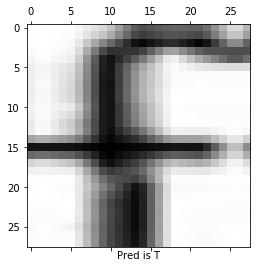

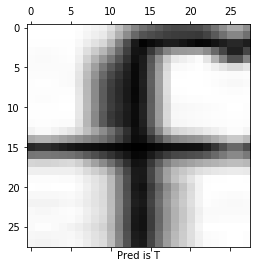

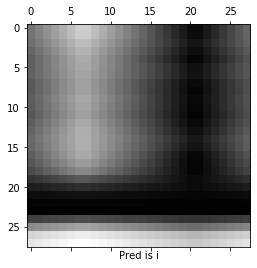

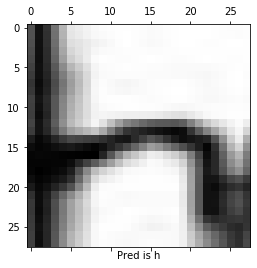

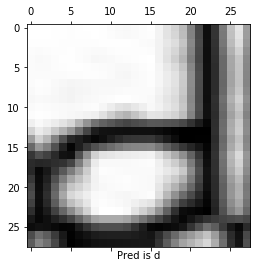

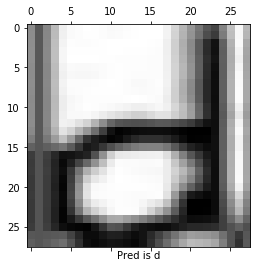

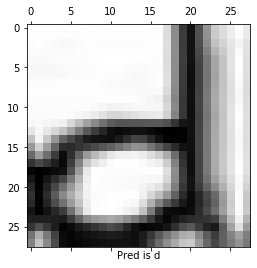

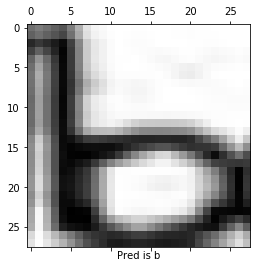

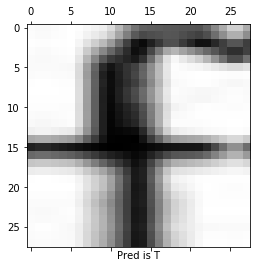

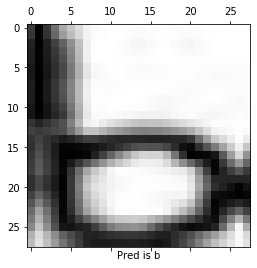

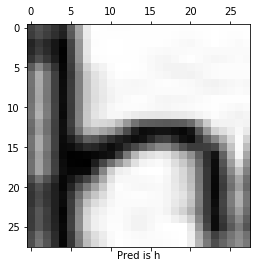

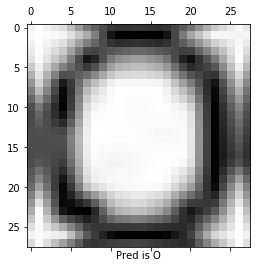

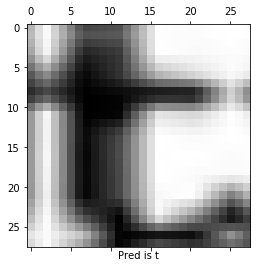

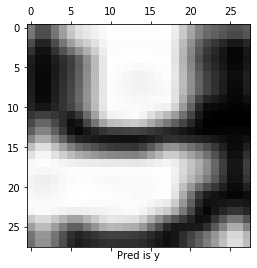

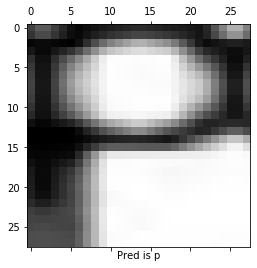

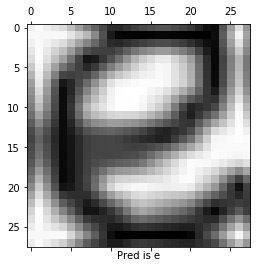

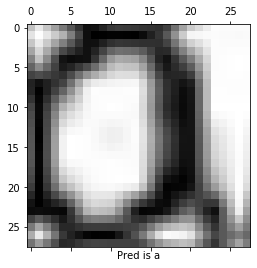

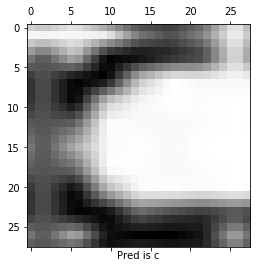

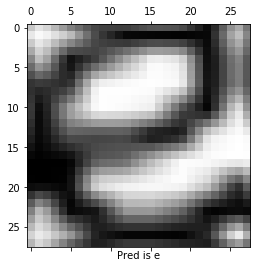

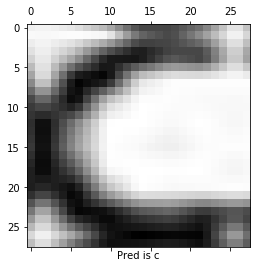

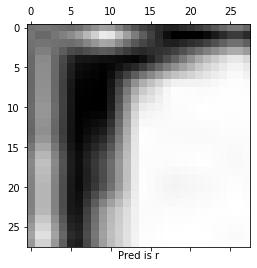

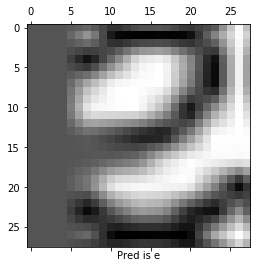

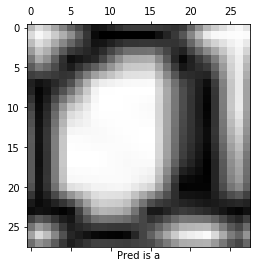

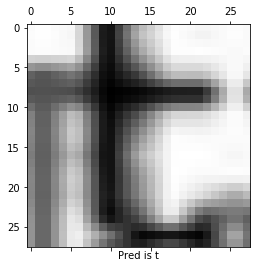

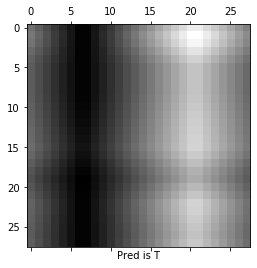

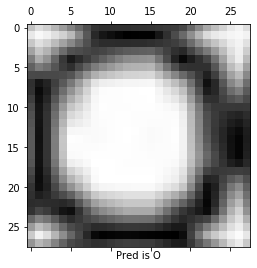

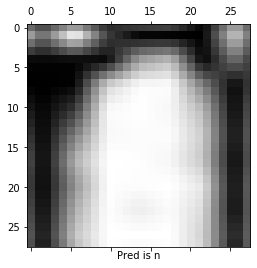

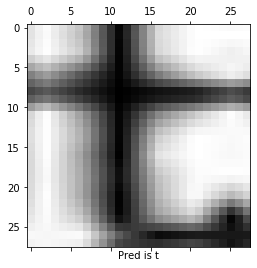

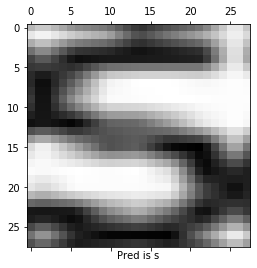

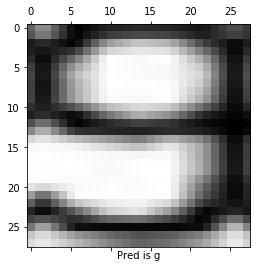

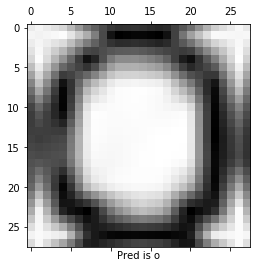

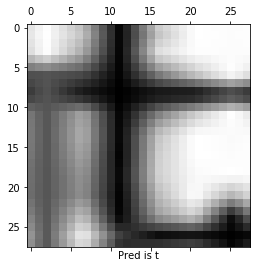

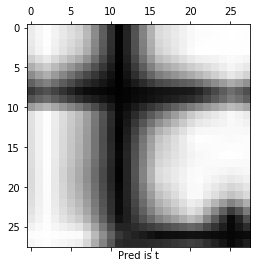

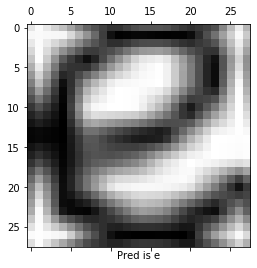

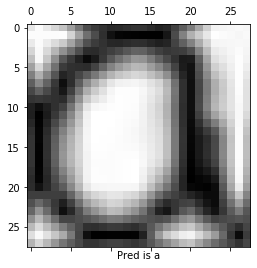

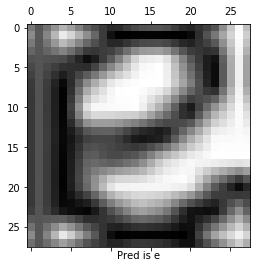

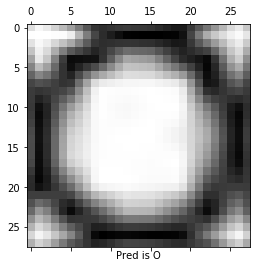

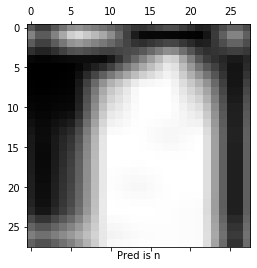

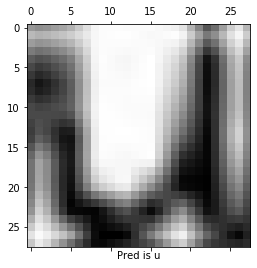

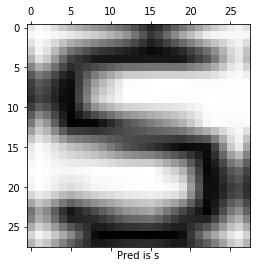

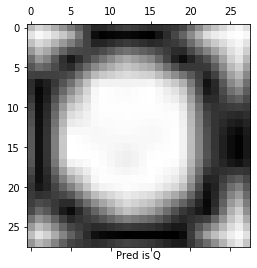

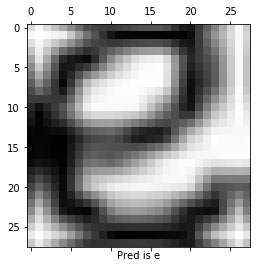

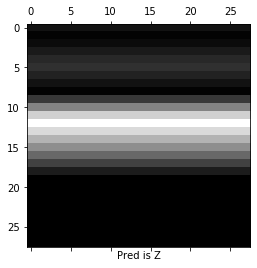

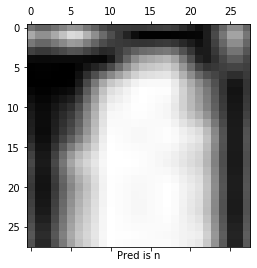

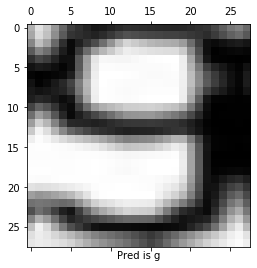

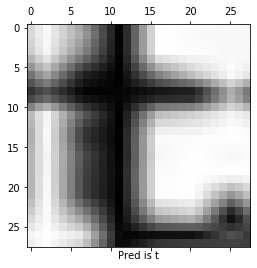

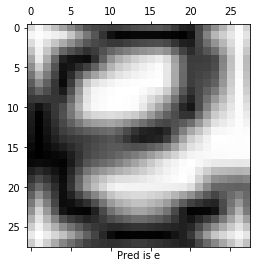

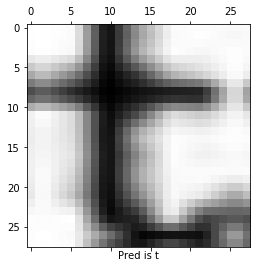

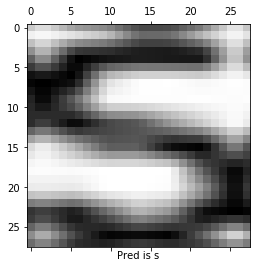

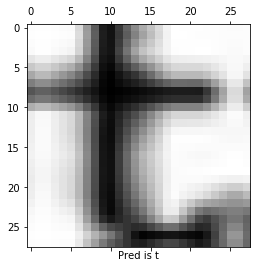

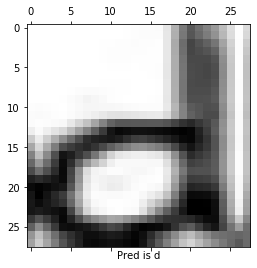

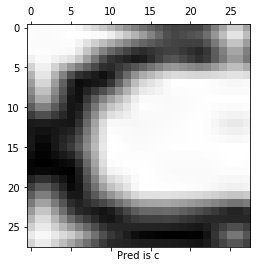

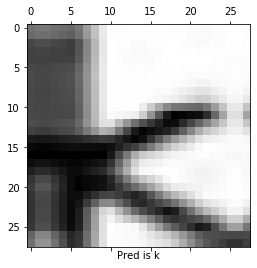

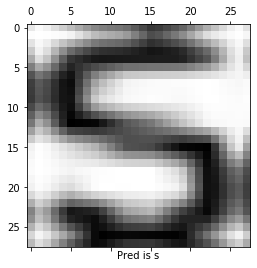

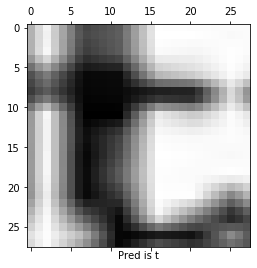

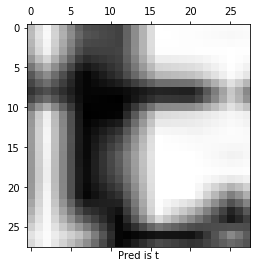

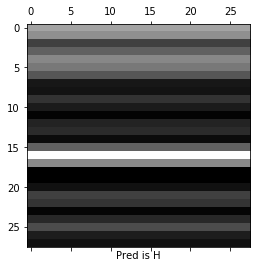

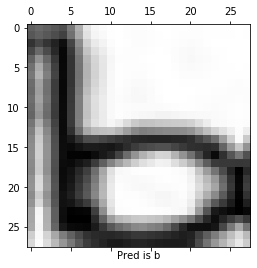

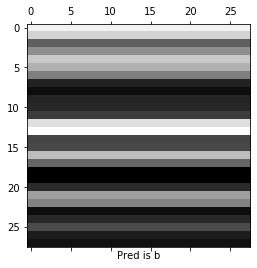

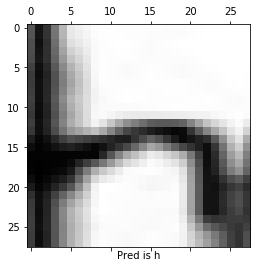

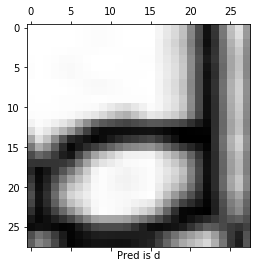

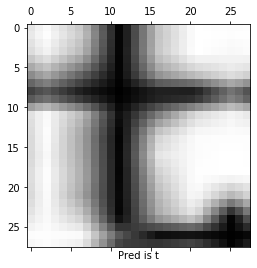

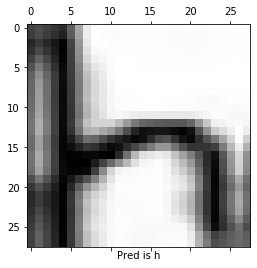

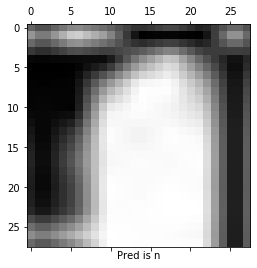

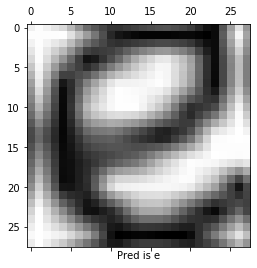

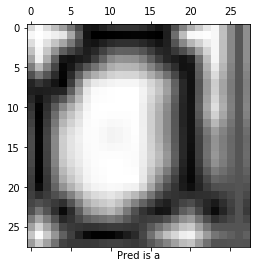

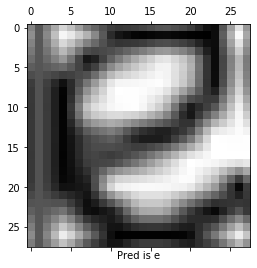

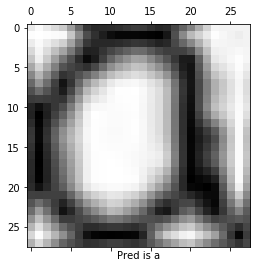

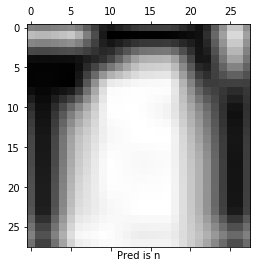

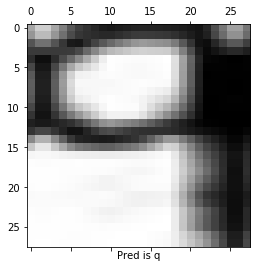

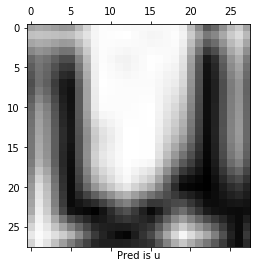

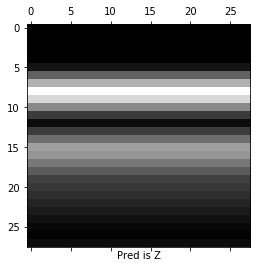

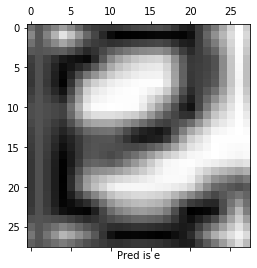

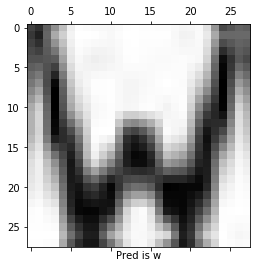

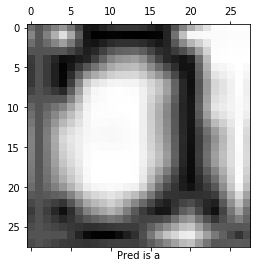

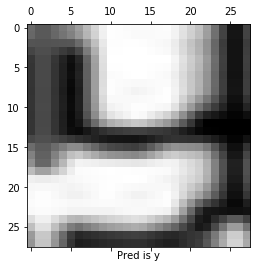

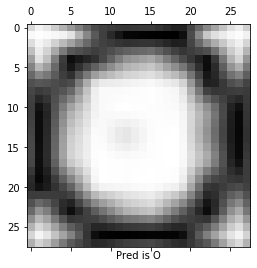

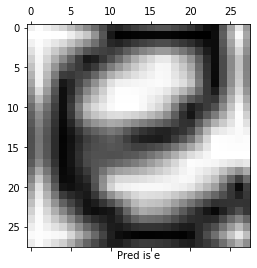

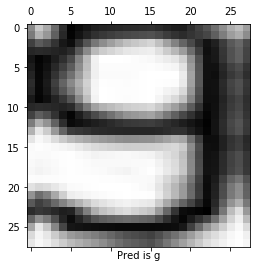

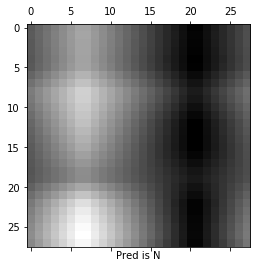

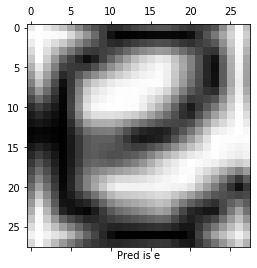

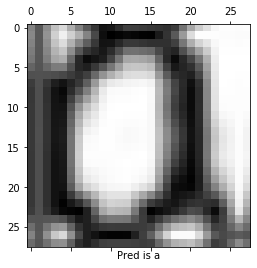

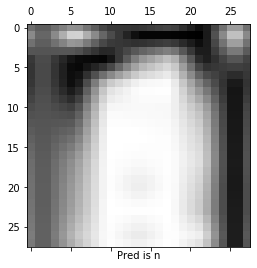

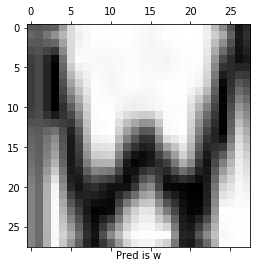

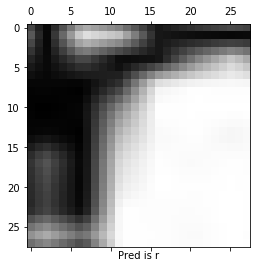

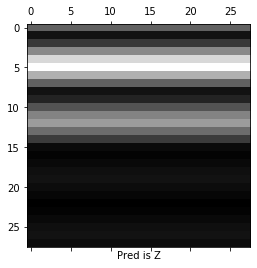

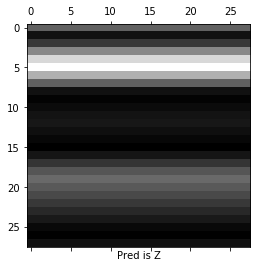

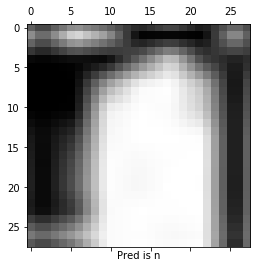

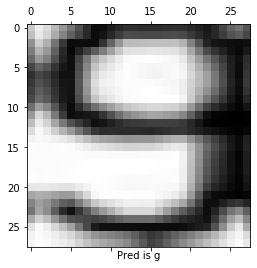

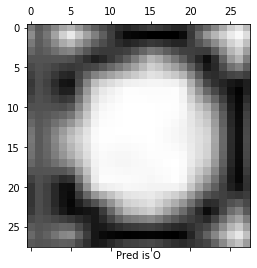

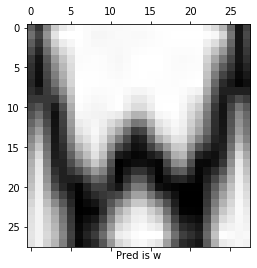

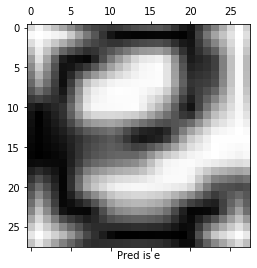

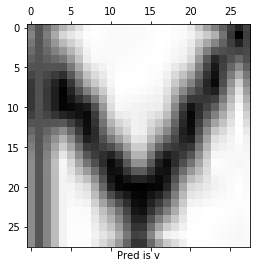

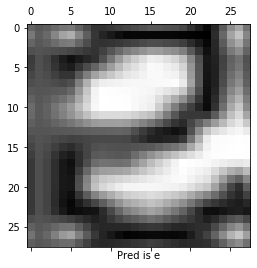

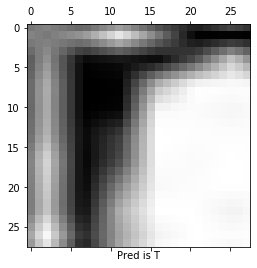

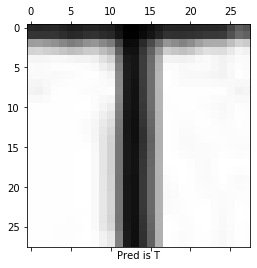

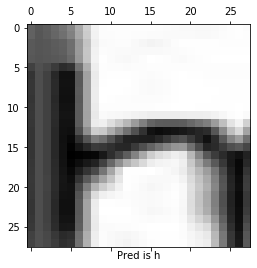

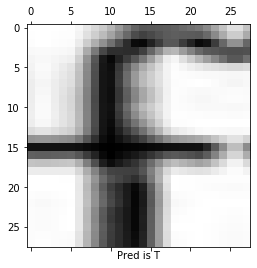

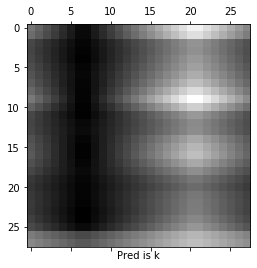

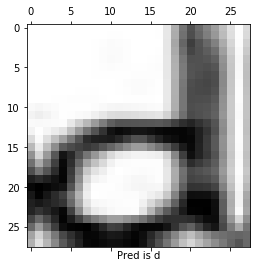

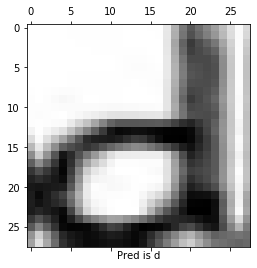

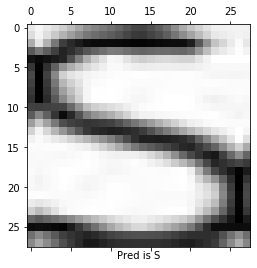

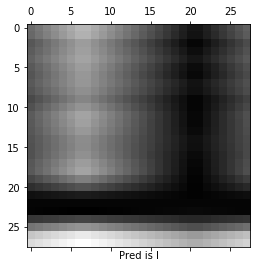

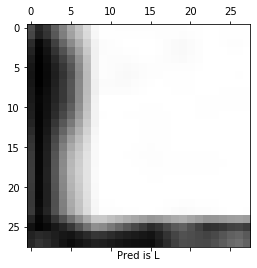

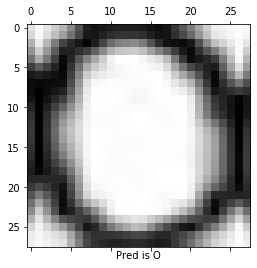

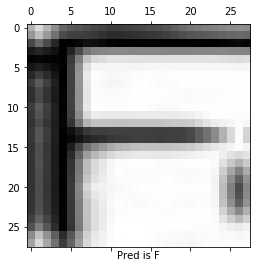

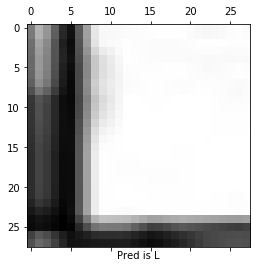

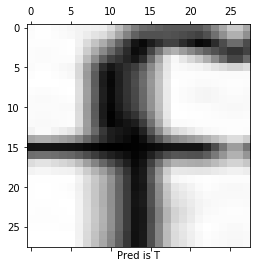

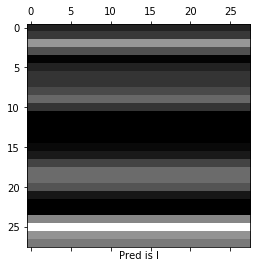

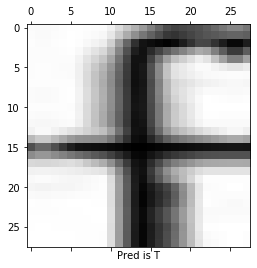

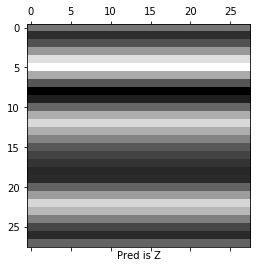

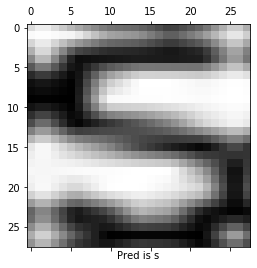

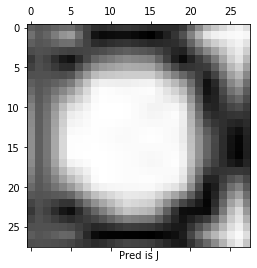

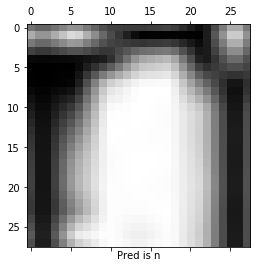

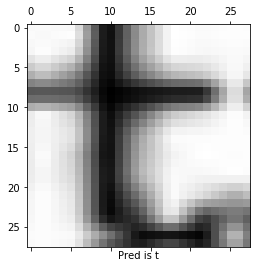

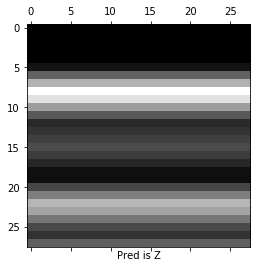

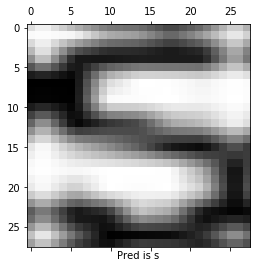

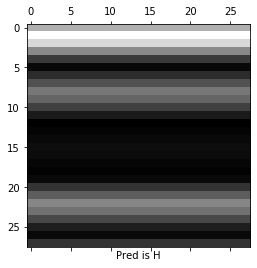

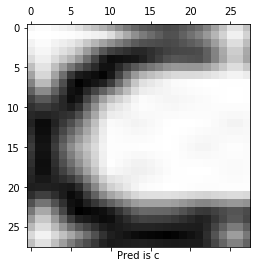

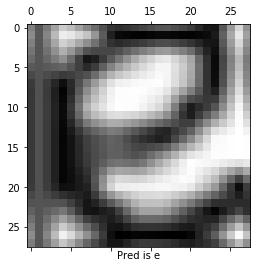

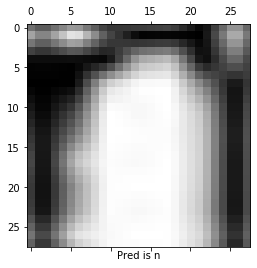

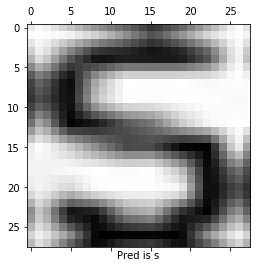

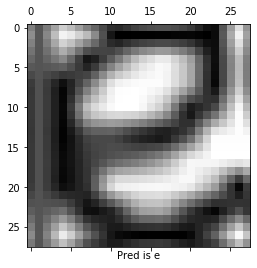

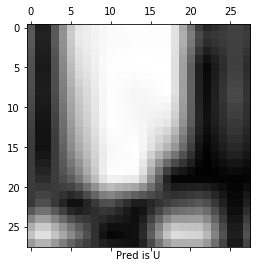

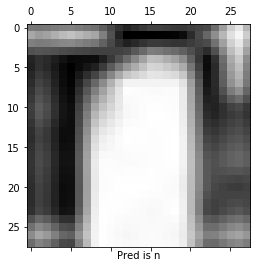

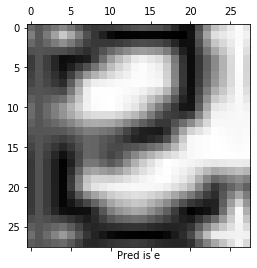

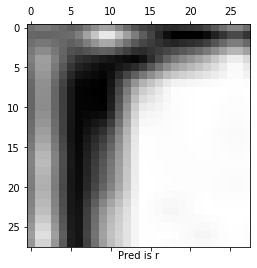

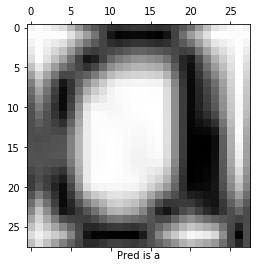

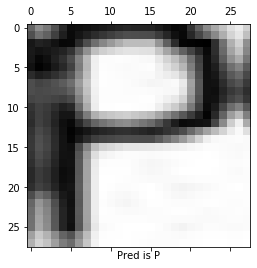

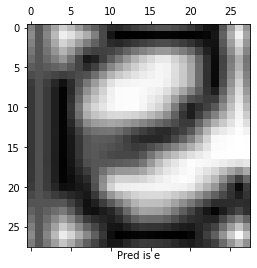

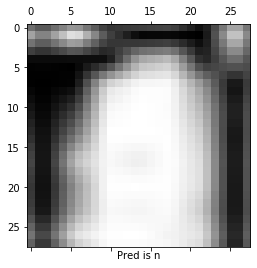

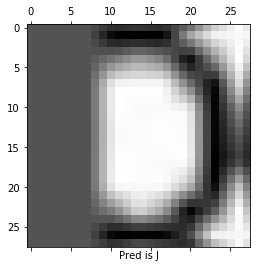

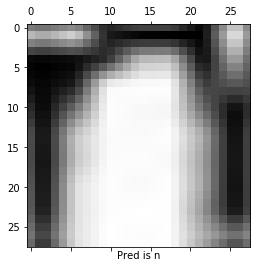

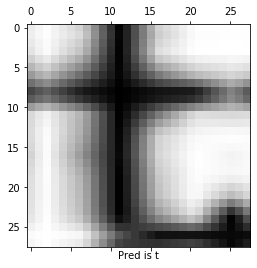

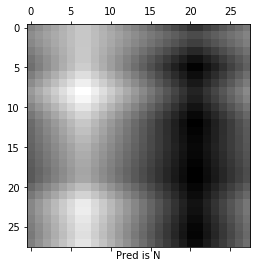

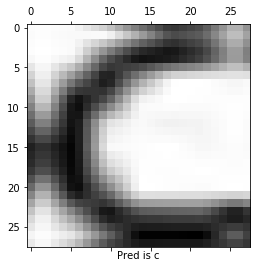

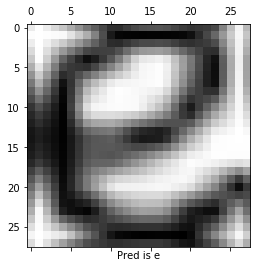

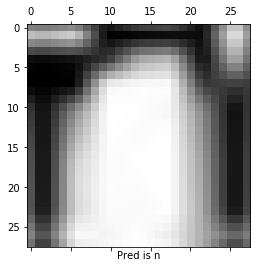

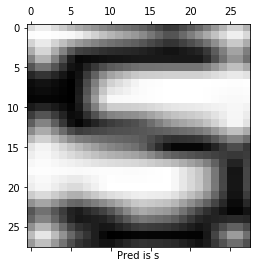

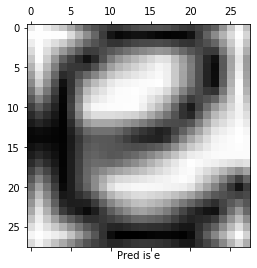

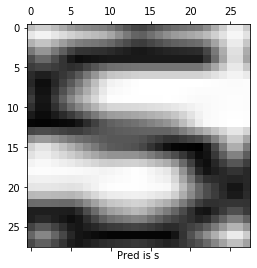

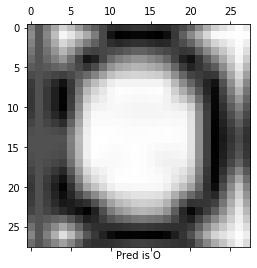

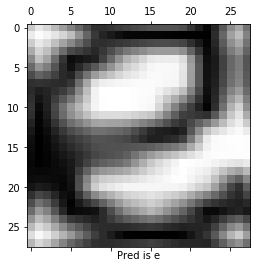

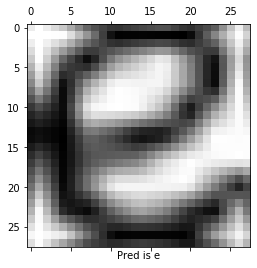

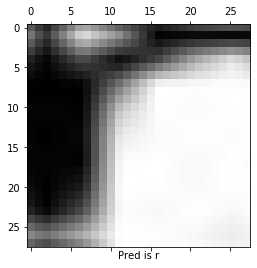

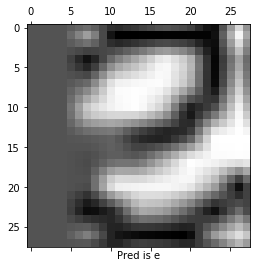

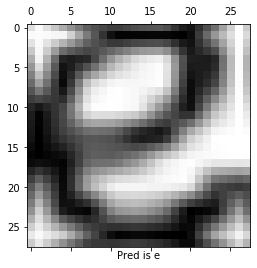

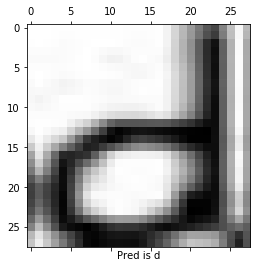

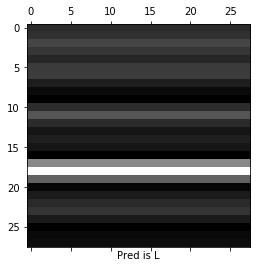

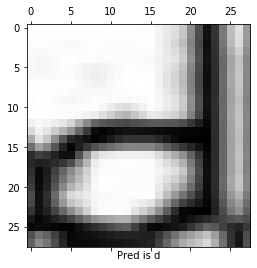

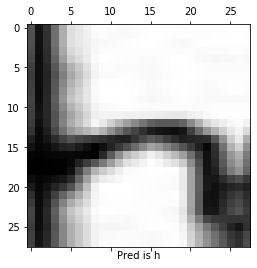

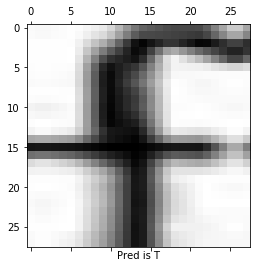

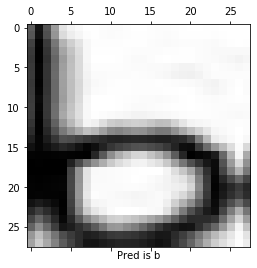

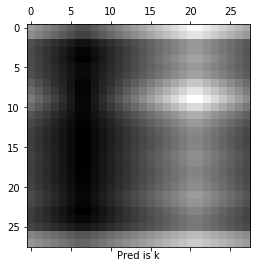

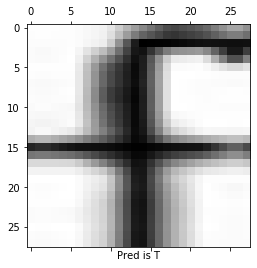

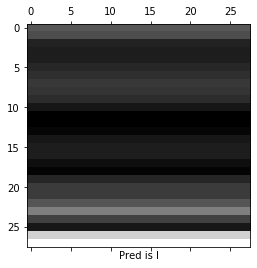

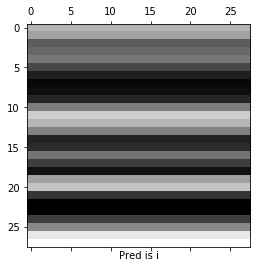

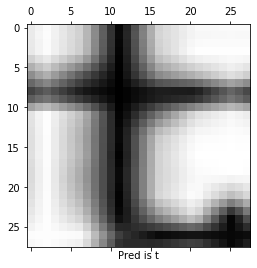

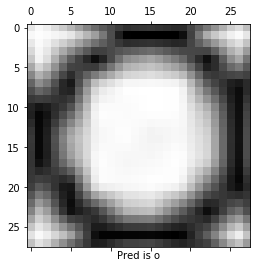

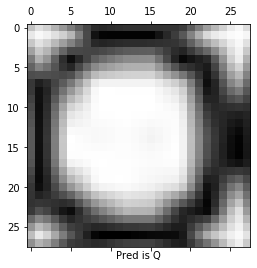

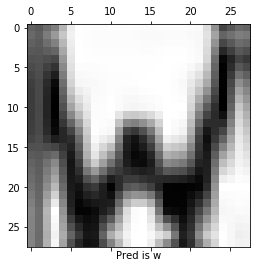

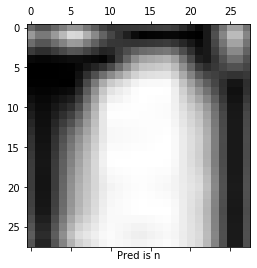

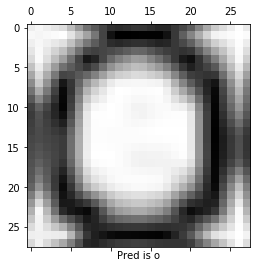

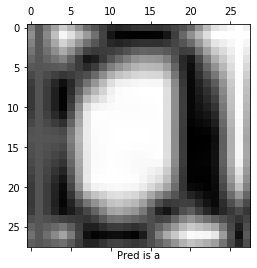

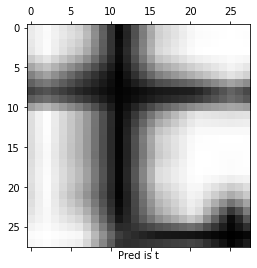

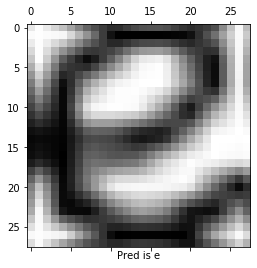

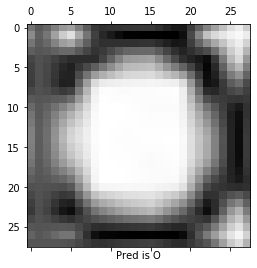

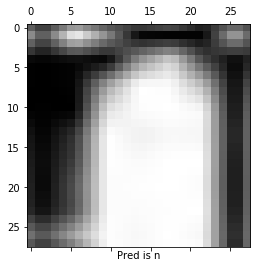

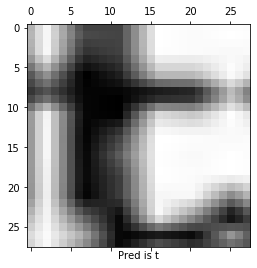

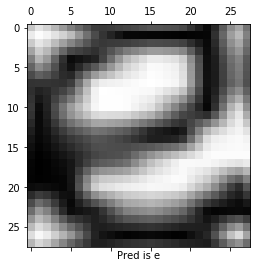

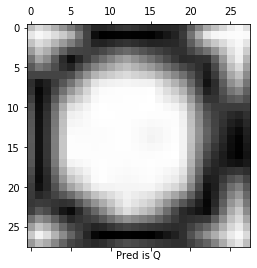

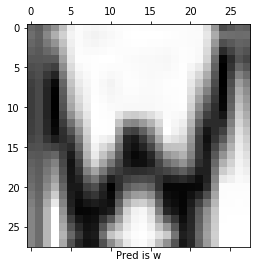

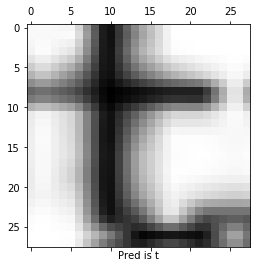

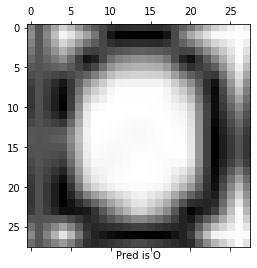

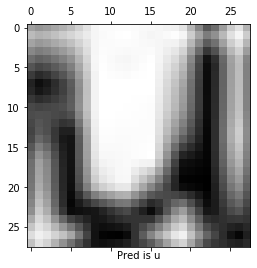

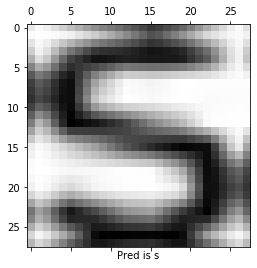

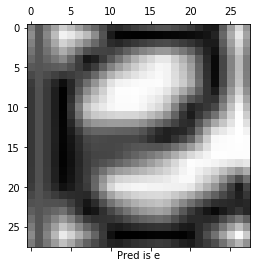

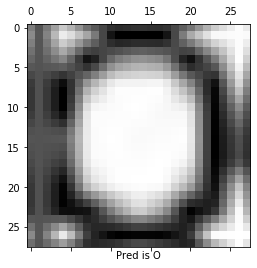

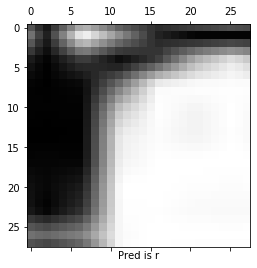

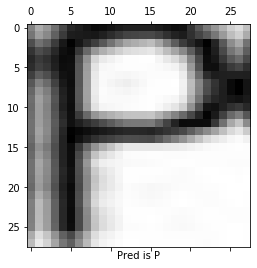

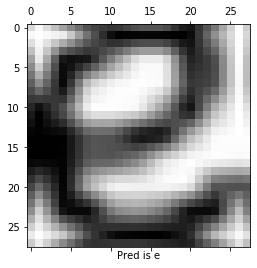

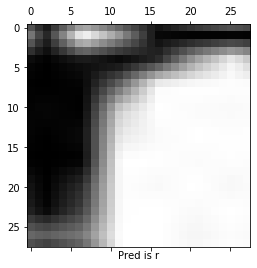

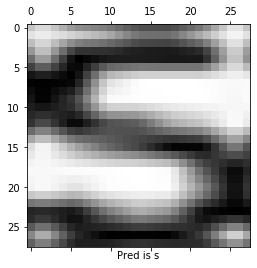

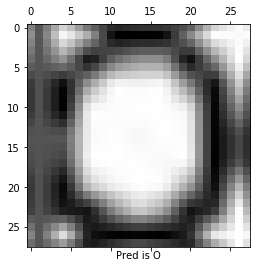

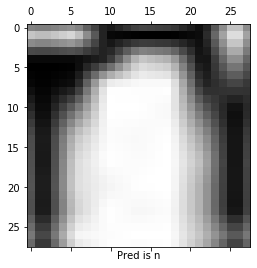

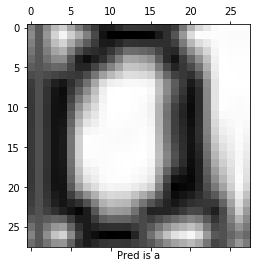

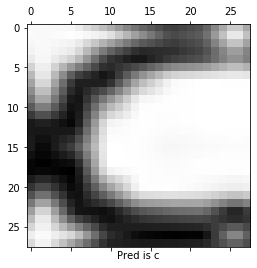

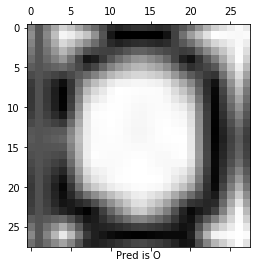

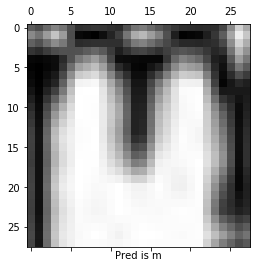

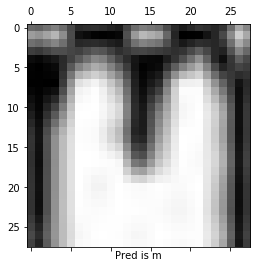

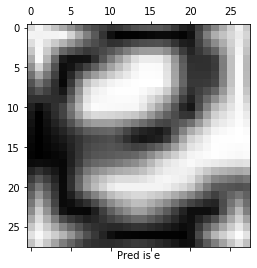

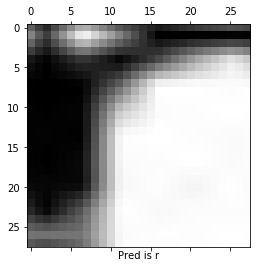

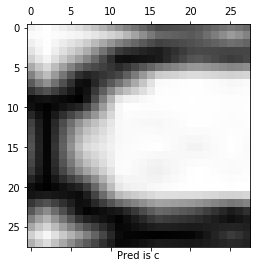

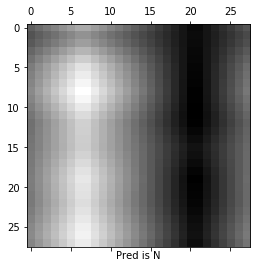

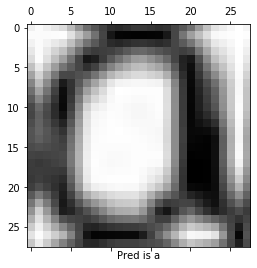

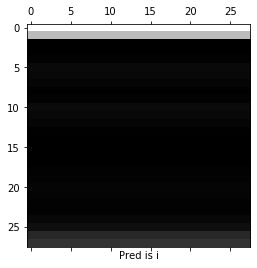

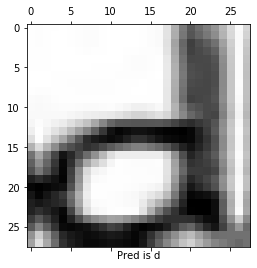

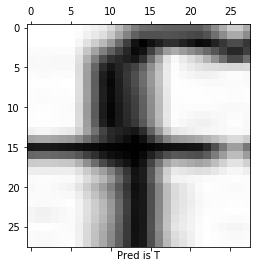

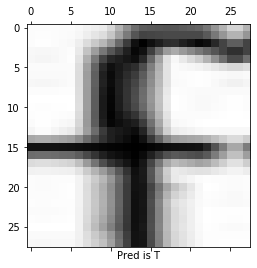

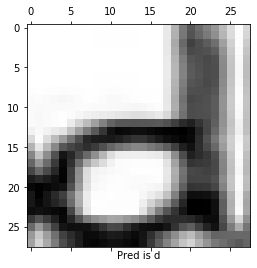

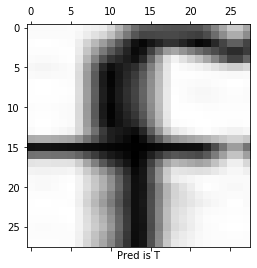

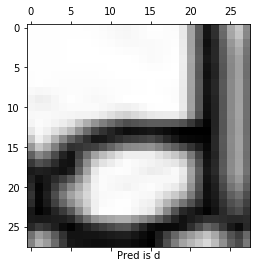

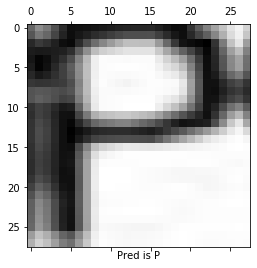

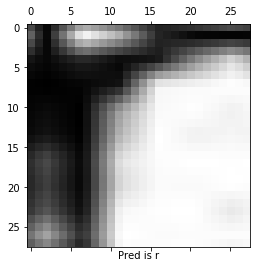

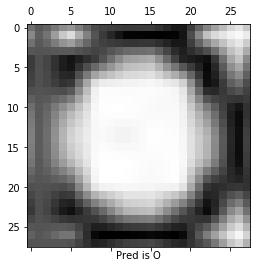

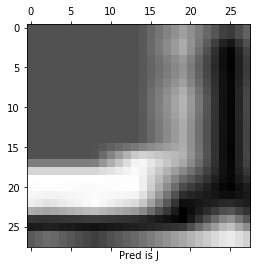

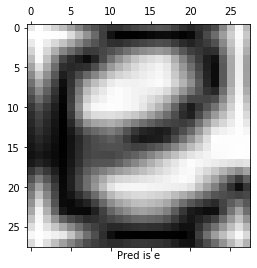

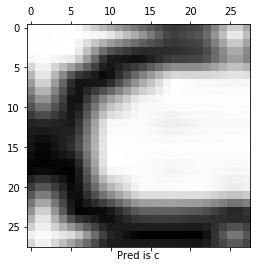

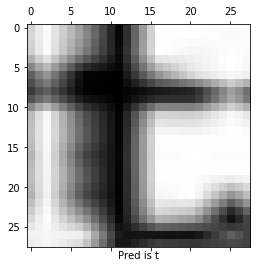

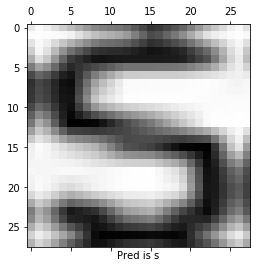

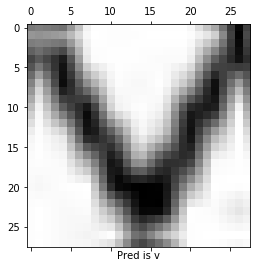

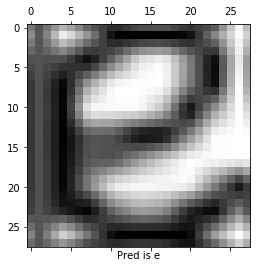

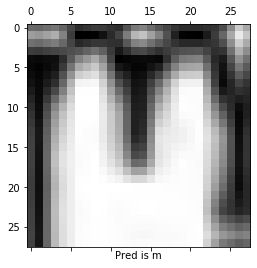

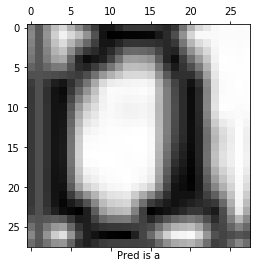

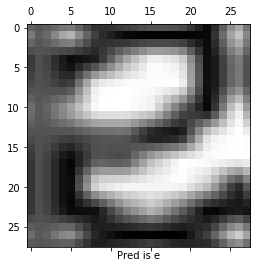

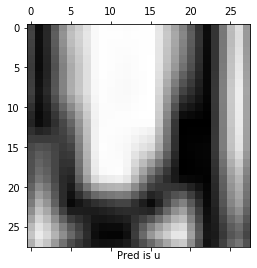

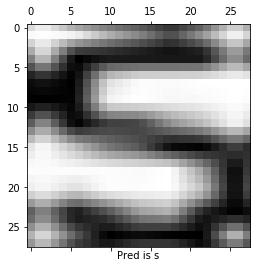

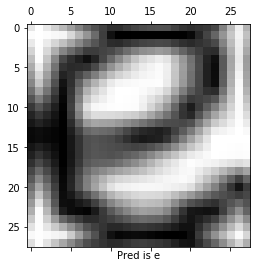

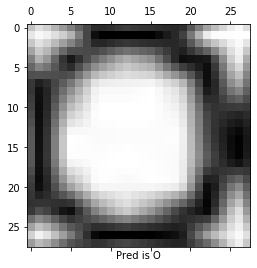

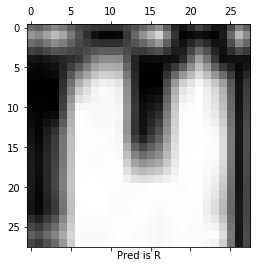

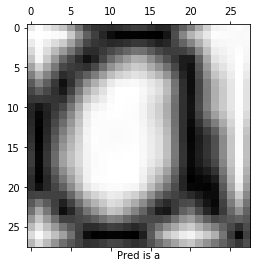

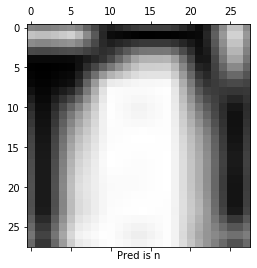

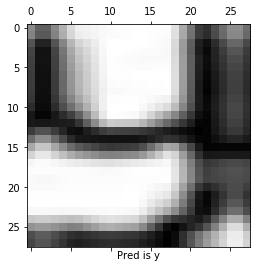

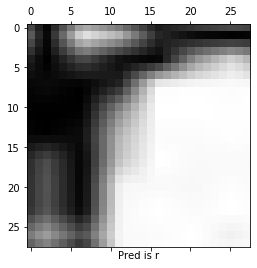

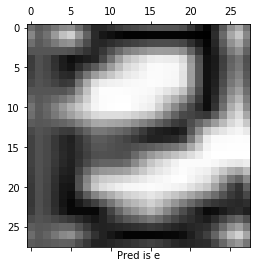

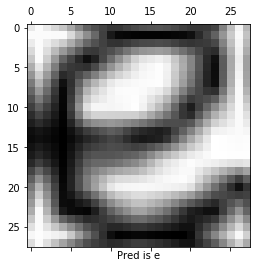

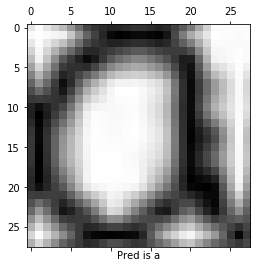

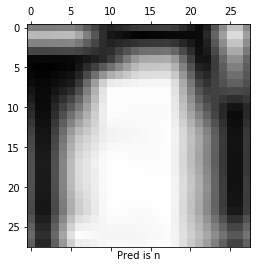

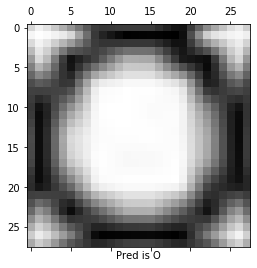

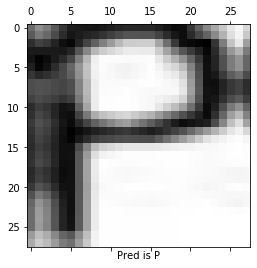

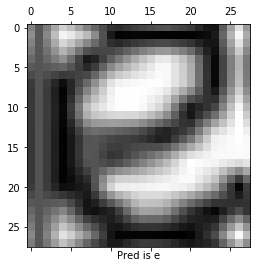

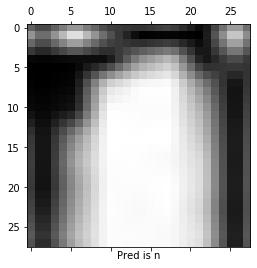

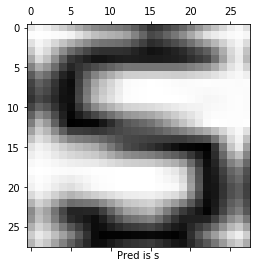

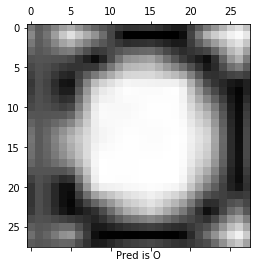

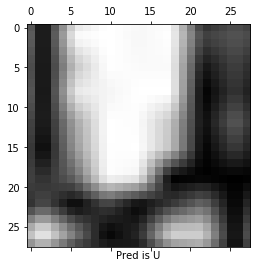

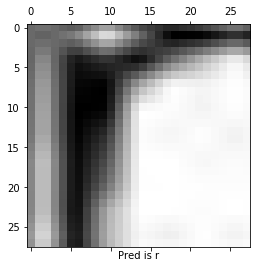

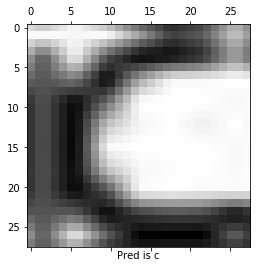

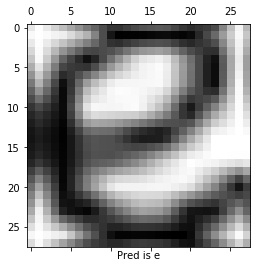

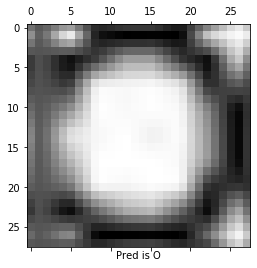

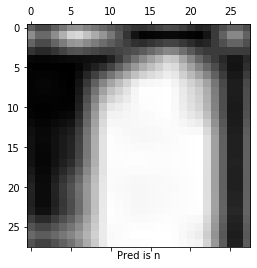

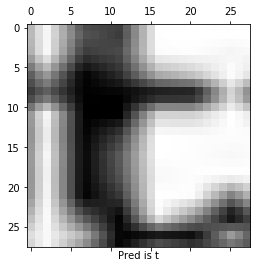

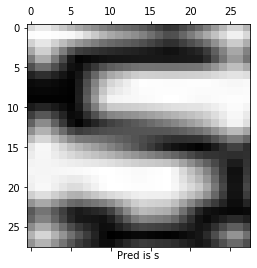

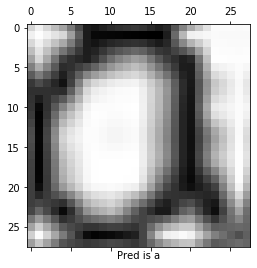

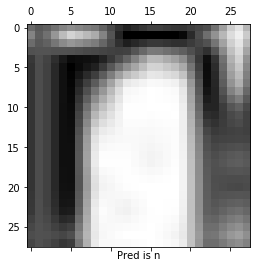

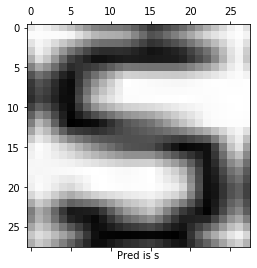

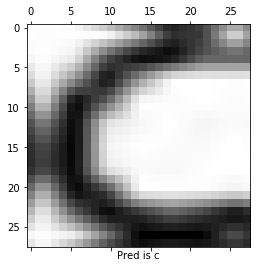

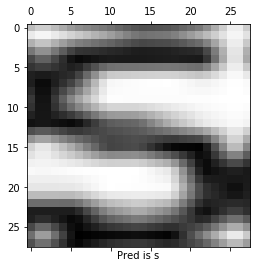

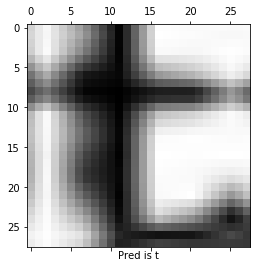

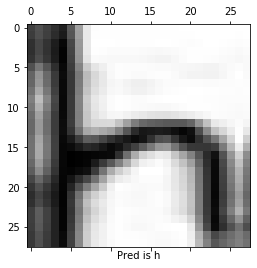

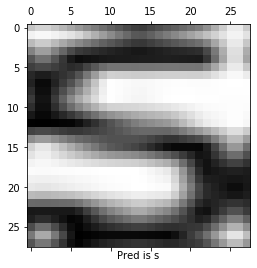

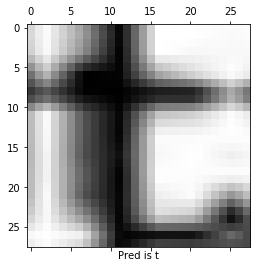

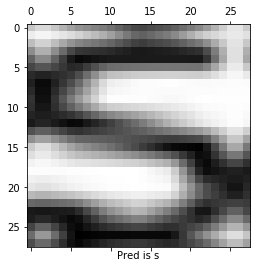

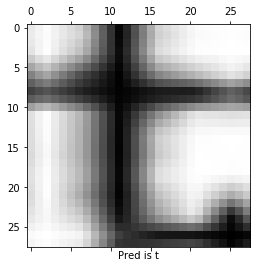

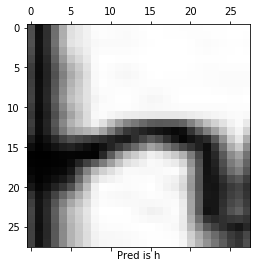

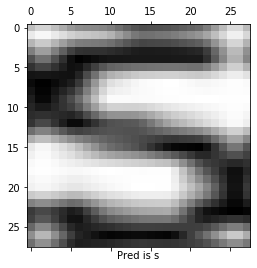

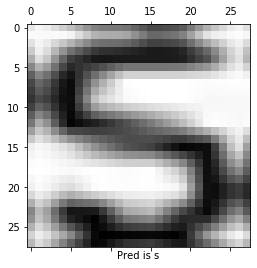

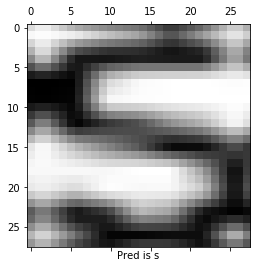

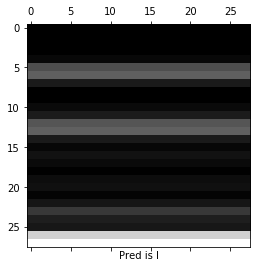

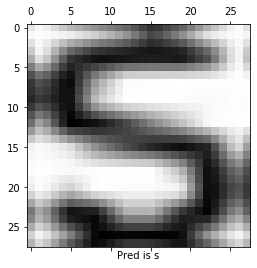

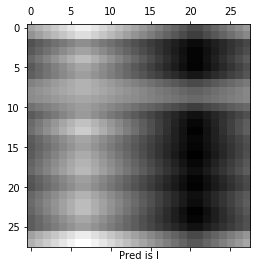

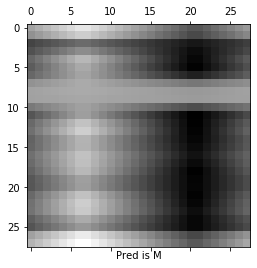

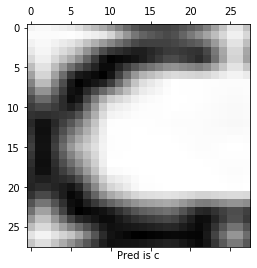

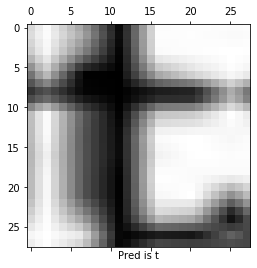

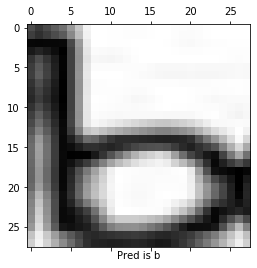

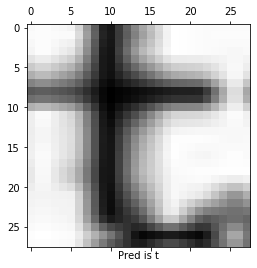

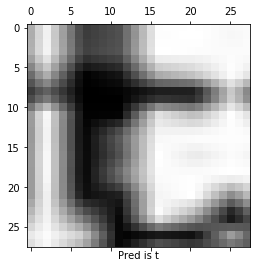

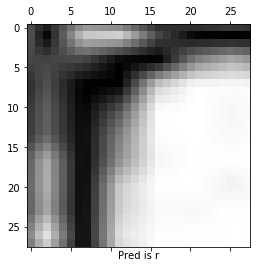

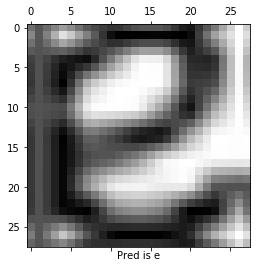

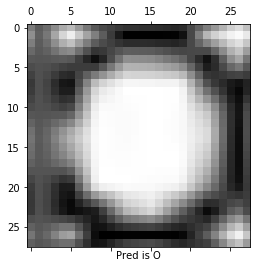

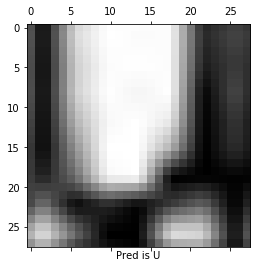

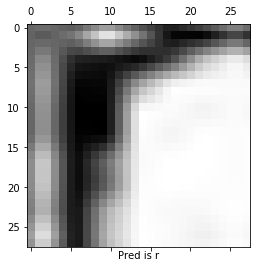

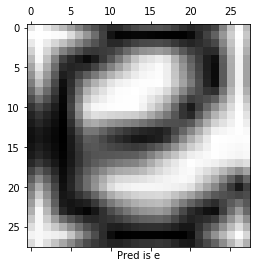

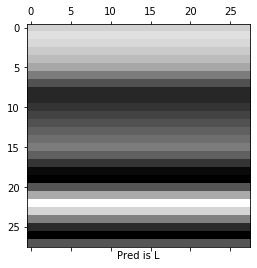

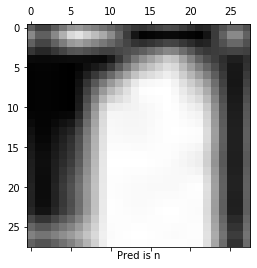

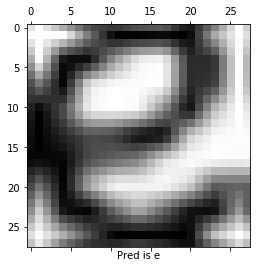

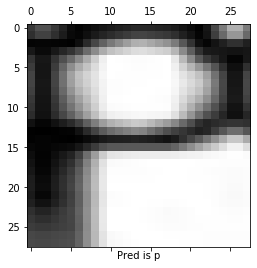

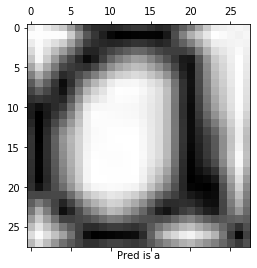

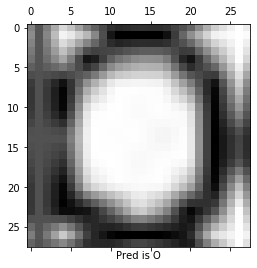

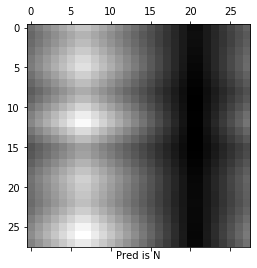

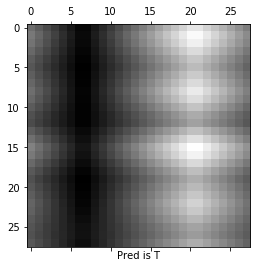

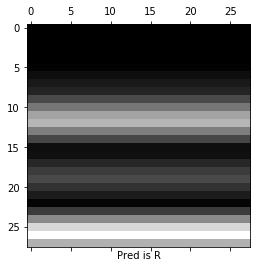

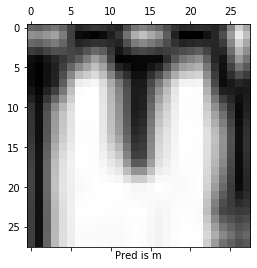

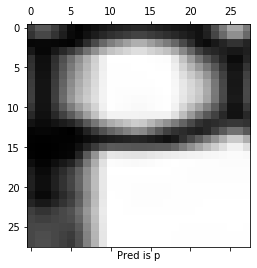

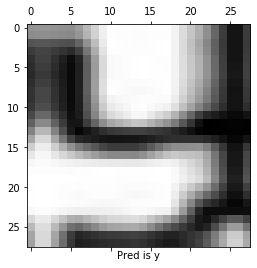

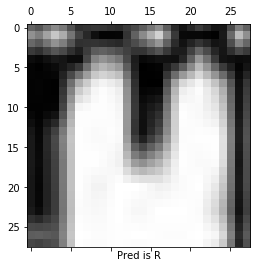

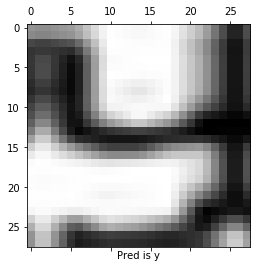

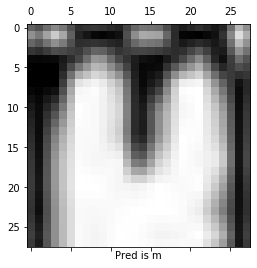

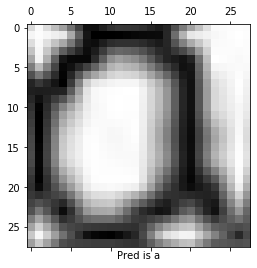

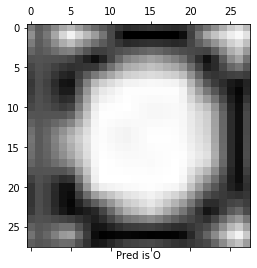

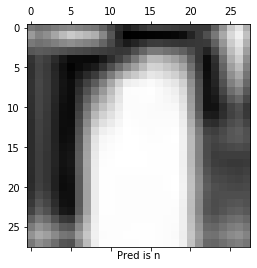

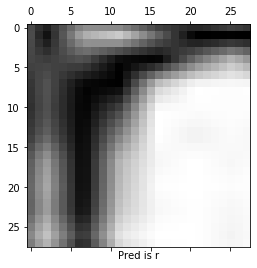

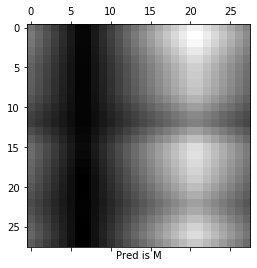

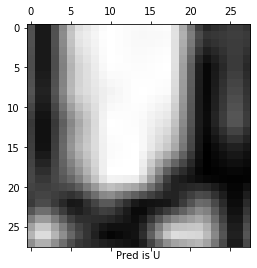

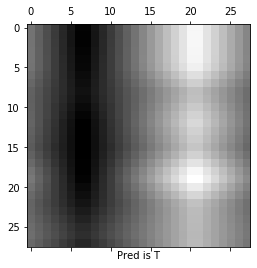

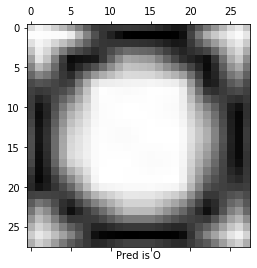

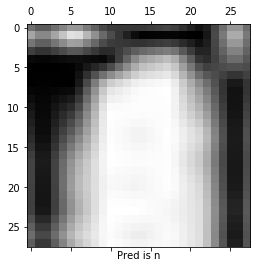

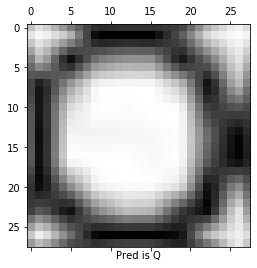

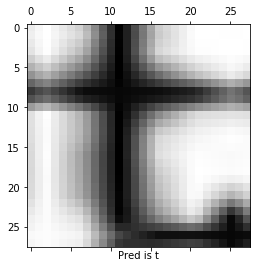

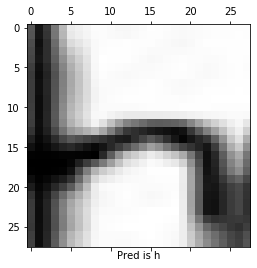

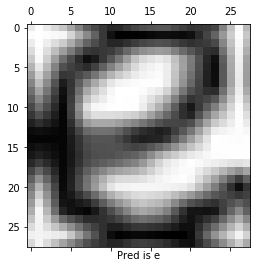

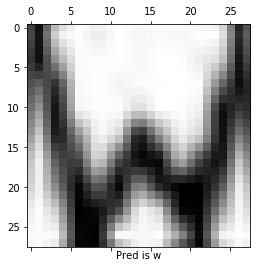

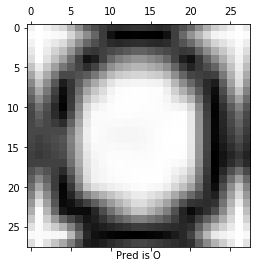

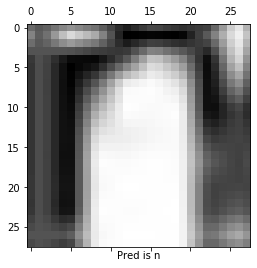

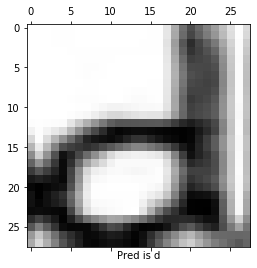

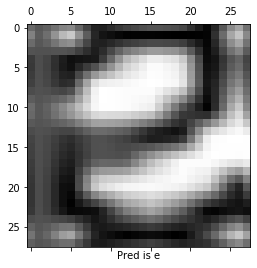

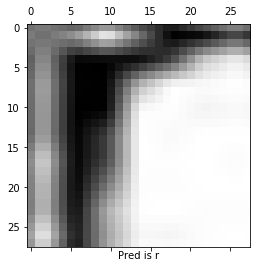

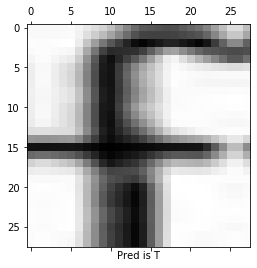

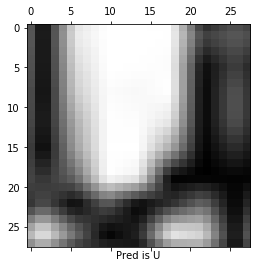

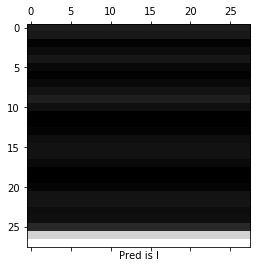

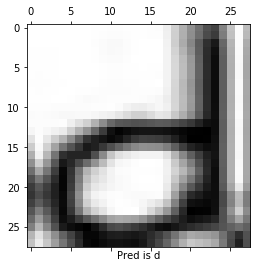

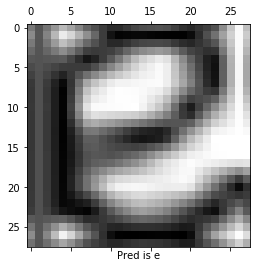

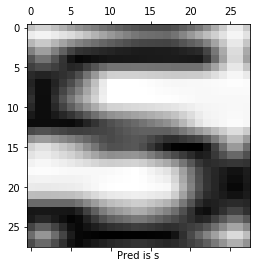

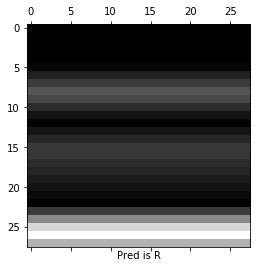

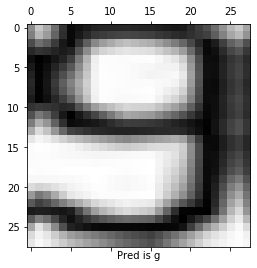

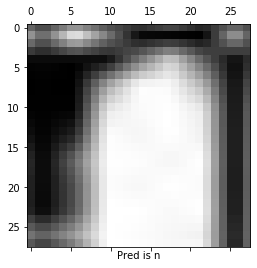

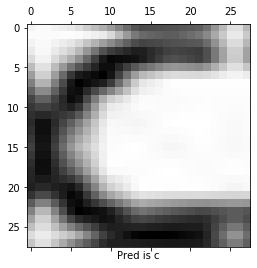

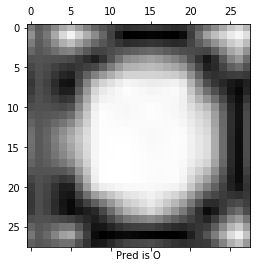

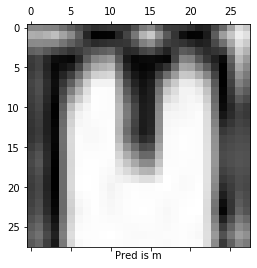

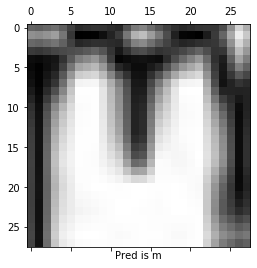

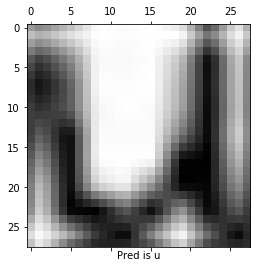

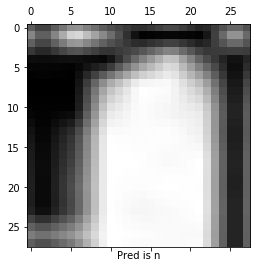

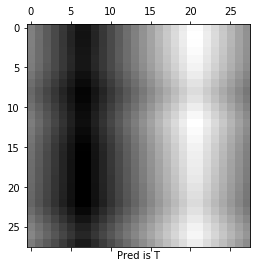

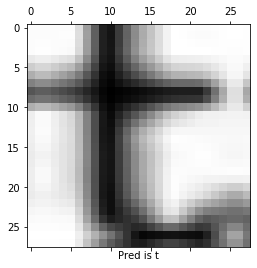

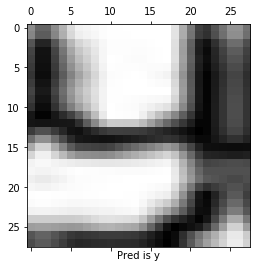

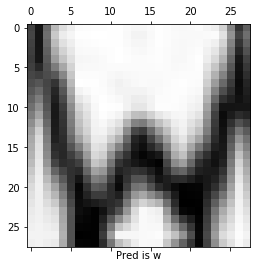

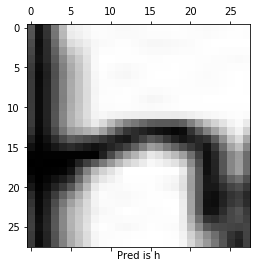

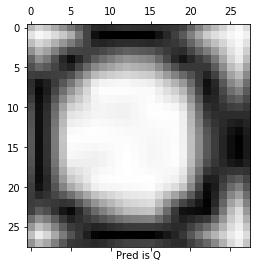

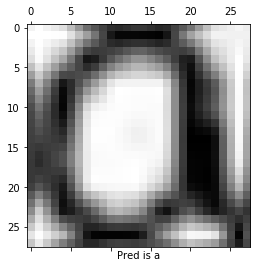

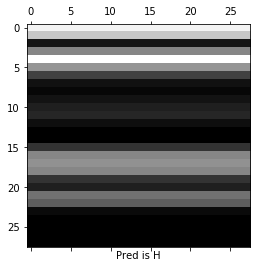

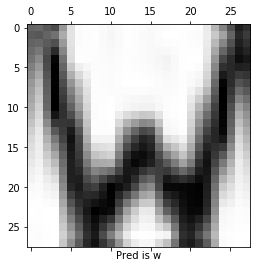

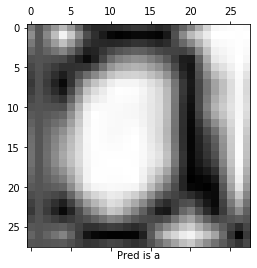

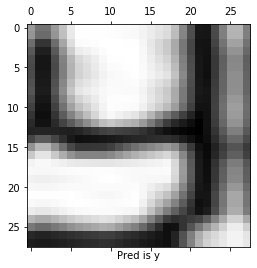

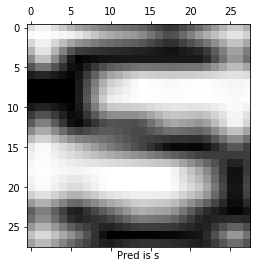

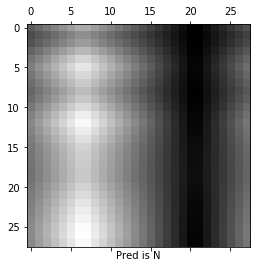

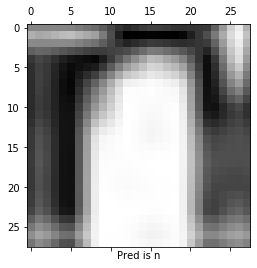

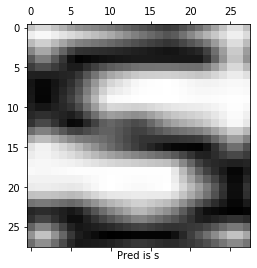

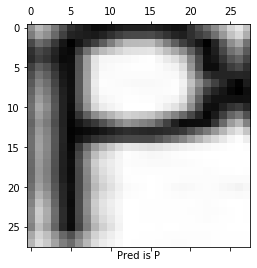

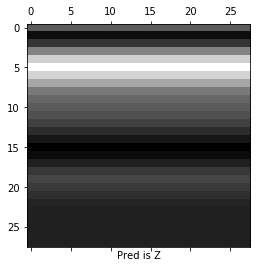

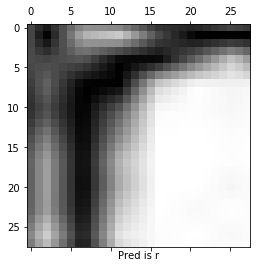

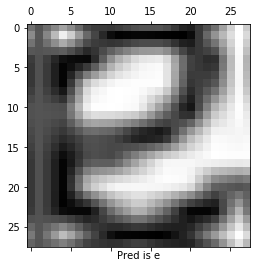

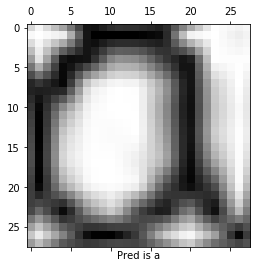

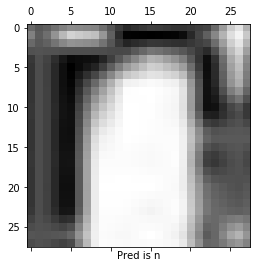

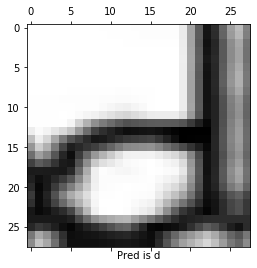

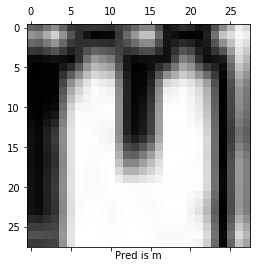

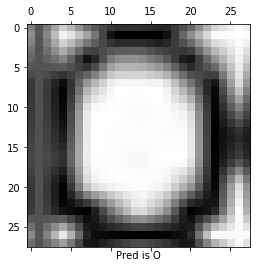

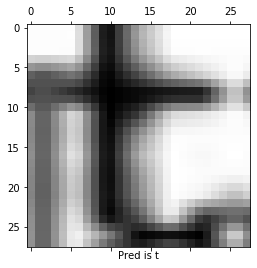

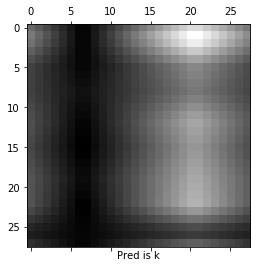

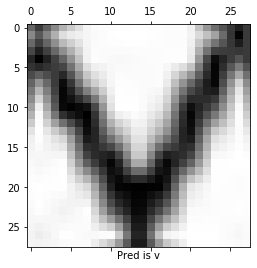

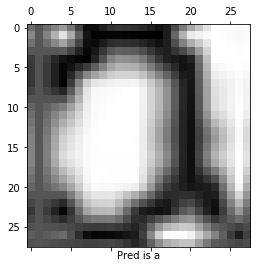

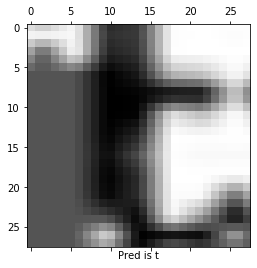

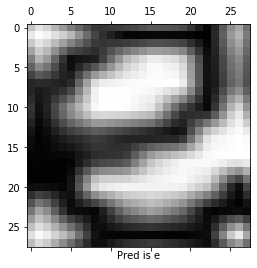

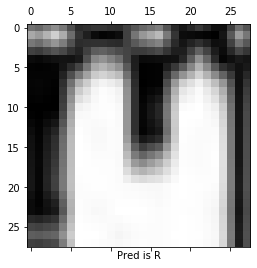

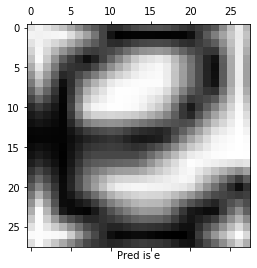

In [37]:
for i in range(0, test.shape[0]):
    plt.matshow(segments[i], cmap = 'gray')
    plt.xlabel('Pred is ' + prediction[i])

In [38]:
print(target)
print('')
print(prediction)
# Letters are out of order due to problems with sorting handwritten letters, classification accruacy can be read above as 92%

['T', 'h', 'i', 's', 'f', 'o', 'n', 't', 'i', 's', 'b', 'a', 's', 'e', 'd', 'o', 'n', 'm', 'y', 'n', 'e', 'a', 't', 'e', 's', 't', 'h', 'a', 'n', 'd', 'w', 'r', 'i', 't', 'i', 'n', 'g', 'a', 'n', 'd', 'w', 'a', 's', 'd', 'd', 'h', 'i', 'i', 'd', 'i', 'b', 'i', 'd', 'T', 'h', 'h', 'e', 's', 'I', 'g', 'n', 'e', 'w', 'I', 't', 'c', 'a', 's', 'u', 'a', 's', 'I', 'm', 'p', 'I', 'c', 'I', 't', 'y', 'a', 'n', 'e', 'g', 'I', 'I', 'i', 't', 'y', 'I', 'n', 'm', 'I', 'n', 'i', 's', 'I', 's', 't', 'e', 'f', 'f', 'I', 'd', 'i', 'i', 'i', 'i', 'd', 'I', 'h', 'h', 'I', 'I', 'r', 's', 't', 'o', 'n', 't', 'v', 'e', 'c', 'r', 'e', 'a', 't', 'e', 'a', 'r', 'g', 'e', 'y', 's', 'o', 'c', 'o', 'u', 'e', 'a', 'r', 'n', 't', 'e', 't', 'e', 'c', 'n', 'I', 'c', 'a', 'i', 't', 'i', 'e', 's', 'f', 'f', 'I', 'h', 'd', 'd', 'd', 'b', 'f', 'b', 'h', 'o', 't', 'y', 'p', 'e', 'a', 'c', 'e', 'c', 'r', 'e', 'a', 't', 'I', 'o', 'n', 't', 's', 'g', 'o', 't', 't', 'e', 'a', 'e', 'o', 'n', 'u', 's', 'o', 'e', 'i', 'n', 'g',